In [1]:
import numpy as np
import cv2
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [110]:
test_img = cv2.cvtColor(mpimg.imread('vehicles/GTI_Left/image0019.png'), cv2.COLOR_RGB2YCrCb)
test_img_not = cv2.cvtColor(mpimg.imread('non-vehicles/GTI/flip_image2.png'), cv2.COLOR_RGB2YCrCb)


def plot_images(img1, img2, title1, title2, colormap1, colormap2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    f.tight_layout()
    ax1.imshow(img1, cmap=colormap1)
    ax1.set_title(title1, fontsize=30)
    ax2.imshow(img2, cmap=colormap2)
    ax2.set_title(title2, fontsize=30)
    ax1.axis('off');
    ax2.axis('off');
    f.savefig("output_images/" + title2.replace(" ",""), bbox_inches='tight', transparent=True)

## Augment the data

#### For vehicles and non-vehicles, flip it to the other side. 


In [111]:
#augment the data
def read_path(path):
    images = glob.glob(path)
    return images

def add_flip_data():
    left_cars = read_path('vehicles/GTI_Left/*.png')
    right_cars = read_path('vehicles/GTI_Right/*.png')
    print(len(left_cars), len(right_cars))
    for i in range(len(left_cars)):
        #uncomment here for the first run
        img = cv2.imread(left_cars[i])
        cv2.imwrite('./vehicles/GTI_Right_Augmented/'+'flip_'+left_cars[i].split('\\')[-1], cv2.flip(img, 1))
    for i in range(len(right_cars)):
        #uncomment here for the first run
        img = cv2.imread(right_cars[i])
        cv2.imwrite('./vehicles/GTI_Left_Augmented/'+'flip_'+right_cars[i].split('\\')[-1], cv2.flip(img, 1))
#add_flip_data()    
    
def add_flip_data_for_middle_far():
    middle_cars = read_path('vehicles/GTI_MiddleClose/*.png')
    far_cars = read_path('vehicles/GTI_Far/*.png')
    for i in range(len(middle_cars)):
        #uncomment here for the first run
        img = cv2.imread(middle_cars[i])
        cv2.imwrite('./vehicles/GTI_MiddleClose/'+'flip_'+middle_cars[i].split('\\')[-1], cv2.flip(img, 1))
    for i in range(len(far_cars)):
        #uncomment here for the first run
        img = cv2.imread(far_cars[i])
        cv2.imwrite('./vehicles/GTI_Far/'+'flip_'+far_cars[i].split('\\')[-1], cv2.flip(img, 1))

#add_flip_data_for_middle_far()
def add_flip_data_for_not_cars():
    not_cars_GTI = read_path('./non-vehicles/GTI/*.png')
    not_cars_Extras = read_path('./non-vehicles/Extras/*.png')
    for i in range(len(not_cars_GTI)):
        #uncomment here for the first run
        img = cv2.imread(not_cars_GTI[i])
        print(img)
        cv2.imwrite('./non-vehicles/GTI/'+'flip_'+not_cars_GTI[i].split('\\')[-1], cv2.flip(img, 1))
    for i in range(len(not_cars_Extras)):
        #uncomment here for the first run
        img = cv2.imread(not_cars_Extras[i])
        cv2.imwrite('./non-vehicles/Extras/'+'flip_'+not_cars_Extras[i].split('\\')[-1], cv2.flip(img, 1))
        
        
#add_flip_data_for_not_cars()

In [112]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32

# Features

#### Hog features.


In [113]:
from skimage.feature import hog
# Define a function to return HOG features and visualization


def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

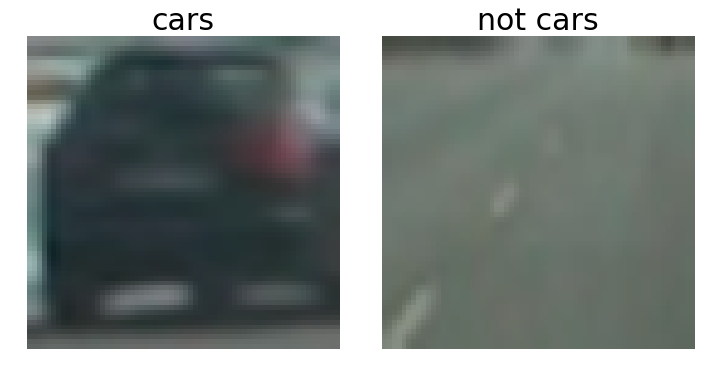

In [114]:
plot_images(mpimg.imread('vehicles/GTI_Left/image0020.png'), mpimg.imread('non-vehicles/GTI/flip_image2.png'),  'cars','not cars', 'gray', 'gray')

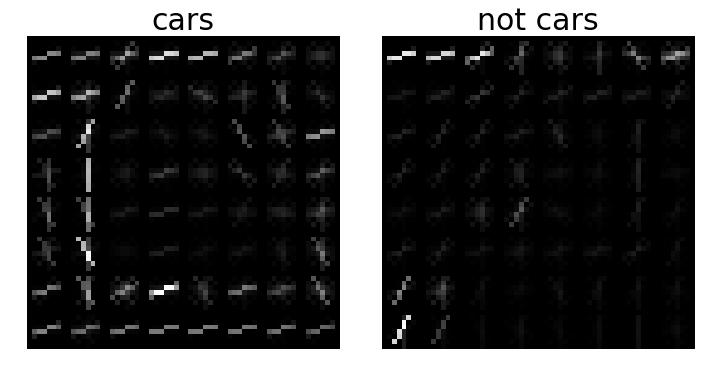

In [115]:
features, hog_img = get_hog_features(test_img[:,:,0], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
features, hog_img_0 = get_hog_features(test_img_not[:,:,0], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
plot_images(hog_img, hog_img_0,  'cars','not cars', 'gray', 'gray')

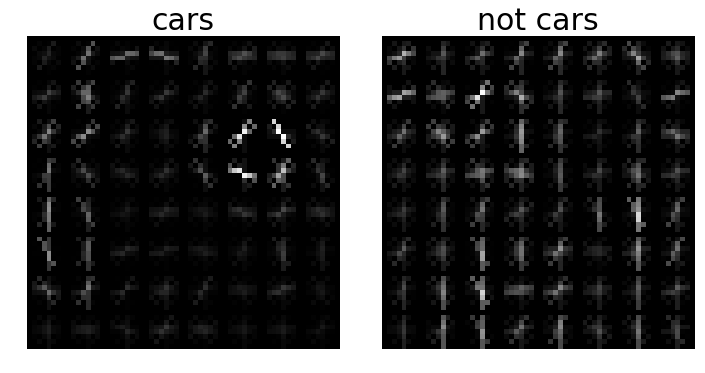

In [116]:
features, hog_img = get_hog_features(test_img[:,:,1], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
features, hog_img_0 = get_hog_features(test_img_not[:,:,1], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
plot_images(hog_img, hog_img_0,  'cars','not cars', 'gray', 'gray')

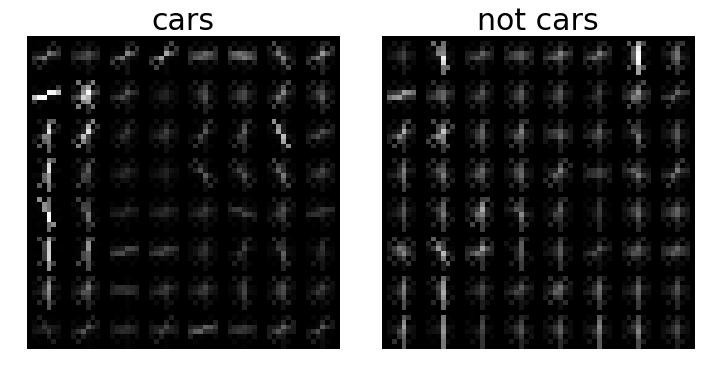

In [117]:
features, hog_img = get_hog_features(test_img[:,:,2], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
features, hog_img_0 = get_hog_features(test_img_not[:,:,2], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
plot_images(hog_img, hog_img_0,  'cars','not cars', 'gray', 'gray')



#### Color features.


In [118]:
# Define a function to compute binned color features  

def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

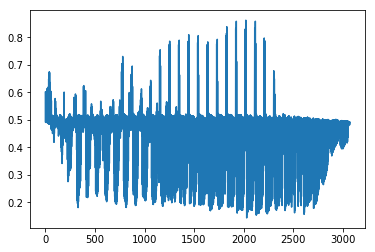

In [119]:
feature_vec = bin_spatial(test_img, size=(32, 32))
plt.plot(feature_vec)
plt.show()

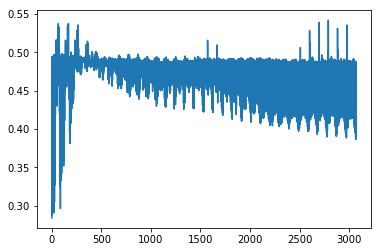

In [120]:
feature_vec = bin_spatial(test_img_not, size=(32, 32))
plt.plot(feature_vec)
plt.show()

In [126]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


(array([ 93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
         2867.2,  3276.8,  3686.4,  4096. ]),
 <a list of 10 Patch objects>)

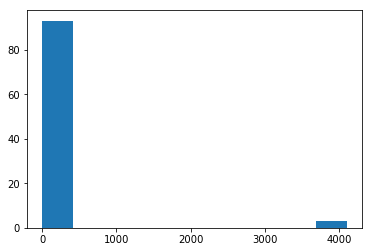

In [140]:


hist_feature = color_hist(cv2.cvtColor(mpimg.imread('vehicles/GTI_Left/image0019.png').astype(np.float32)/255, cv2.COLOR_RGB2YCrCb), nbins=32, bins_range=(0, 256))

plt.hist(hist_feature)


(array([ 93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
         2867.2,  3276.8,  3686.4,  4096. ]),
 <a list of 10 Patch objects>)

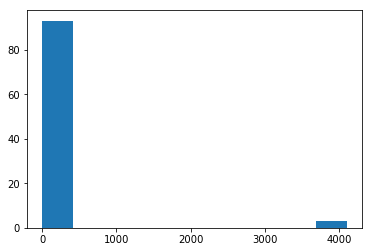

In [141]:
hist_feature_0 = color_hist(cv2.cvtColor(mpimg.imread('non-vehicles/GTI/flip_image209.png').astype(np.float32)/255, cv2.COLOR_RGB2YCrCb), nbins=32, bins_range=(0, 256))

plt.hist(hist_feature_0)

## Feature extraction




In [11]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
        print(str(file)+ "  "+ "completed")
    # Return list of feature vectors
    return features


def extract_single_feature(frame, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):

    file_features = []
    # Read in each one by one
    image = np.copy(frame)
    # apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)      

    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        file_features.append(spatial_features)
    if hist_feat == True:
        # Apply color_hist()
        hist_features = color_hist(feature_image, nbins=hist_bins)
        file_features.append(hist_features)
    if hog_feat == True:
    # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        file_features.append(hog_features)
    # Return list of feature vectors
    return np.concatenate(file_features)

    


# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


## SVM Classifiers

#### Flow: Get raw data --> Split data get train and test data --> Scaler and SVM model by train data --> Test accuracy on test data

#### I trained two classifiers, cars and not cars, left and right cars. In the first svm, because the dataset is large (10000 vs 10000 data), fitting the cars and not cars into a linear svm may cause the computer no response for 5 min. So I save all the svms and corresponding scalers by pickle. You may load it in the next chapter.

In [12]:
#train 2 classifiers, cars and not cars, left cars and right cars

from sklearn import svm, grid_search
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
def get_samples_0():
    far_cars = read_path('vehicles/GTI_Far/*.png')
    left_cars = read_path('vehicles/GTI_Left/*.png')
    right_cars = read_path('vehicles/GTI_Right/*.png')
    close_cars = read_path('vehicles/GTI_MiddleClose/*.png')
    other_cars = read_path('vehicles/KITTI_extracted/*.png')
    cars = far_cars + left_cars + right_cars + close_cars + other_cars
    not_cars = read_path('non-vehicles/GTI/*.png')+read_path('non-vehicles/Extras/*.png')
    num  = min(len(cars), len(not_cars))
    cars = random.sample(cars, num)
    not_cars = random.sample(not_cars, num)
    return cars, not_cars

In [14]:
cars_0, not_cars_0 = get_samples_0()

In [15]:
print(len(cars_0), len(not_cars_0))

10045 10045


In [16]:
def get_samples_1():
    far_cars = read_path('vehicles/GTI_Far/*.png')
    left_cars = read_path('vehicles/GTI_Left/*.png') + read_path('vehicles/GTI_Left_Augmented/*.png')
    right_cars = read_path('vehicles/GTI_Right/*.png') + read_path('vehicles/GTI_Right_Augmented/*.png')
    close_cars = read_path('vehicles/GTI_MiddleClose/*.png')
    return close_cars, far_cars, left_cars, right_cars 



In [17]:
close_cars_1, far_cars_1, left_cars_1, right_cars_1 =  get_samples_1()


In [18]:
print(len(close_cars_1), len(far_cars_1), len(left_cars_1), len(right_cars_1))

838 1668 1573 1573


In [19]:
def check_length(sample):
    for i in sample:
        print(len(i))

def generate_labels(num, img_list):
    result = []
    for i in range(len(img_list)):
        result.append(num)
    return result

def test_generate_labels():
    img_list = read_path('vehicles/GTI_MiddleClose/*.png')[:10]
    num = 10
    result = generate_labels(num, img_list)
    if result == [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]:
        print("generate_labels pass")
    else:
        print("generate_labels fail")
        
test_generate_labels()

def find_best_params_0(num = 200, parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}):
    cars_1 = random.sample(cars_0, num)
    not_cars_1 = random.sample(not_cars_0, num)
    X = extract_features(cars_1+not_cars_1, color_space='RGB', spatial_size=(32, 32),
                hist_bins=32, orient=9, 
                pix_per_cell=8, cell_per_block=2, hog_channel=0,
                spatial_feat=True, hist_feat=True, hog_feat=True)
    _, X = normalized_samples(X)
    y=[]
    for i in range(2):
        y = y + generate_labels(i, [cars_1, not_cars_1][i])
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svr = svm.SVC()
    clf = grid_search.GridSearchCV(svr, parameters)
    clf.fit(X, y)
    return clf.best_params_


def find_best_params_1(num = 200, parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}):
    a, b, c, d = get_samples_1()
    a = random.sample(a, num)
    b = random.sample(b, num)
    c = random.sample(c, num)
    d = random.sample(d, num)
    x = a+b+c+d
    X = extract_features(x, color_space='RGB', spatial_size=(32, 32),
                    hist_bins=32, orient=9, 
                    pix_per_cell=8, cell_per_block=2, hog_channel=0,
                    spatial_feat=True, hist_feat=True, hog_feat=True)
    _, X = normalized_samples(X)
    y=[]
    for i in range(4):
        y = y + generate_labels(i, [a, b, c, d][i])
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svr = svm.SVC()
    clf = grid_search.GridSearchCV(svr, parameters)
    clf.fit(X, y)
    return clf.best_params_
        
def test_find_best_params():
    result = find_best_params(200, parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]})
    print(result)
    return result

def normalized_samples(feature_list):
    feature_list = np.array(feature_list).astype(np.float64)
    X_scaler = StandardScaler().fit(feature_list)
    scaled_X = X_scaler.transform(feature_list)
    return X_scaler, scaled_X

def test_normalized_samples():
    scaled_X = normalized_samples([[0, 0, 0.1], [1, 1, 0]])
    return scaled_X

print("normalized_samples: " + str(test_normalized_samples()))


def split_samples(scaled_X, y):
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
    return  X_train, X_test, y_train, y_test


generate_labels pass
normalized_samples: (StandardScaler(copy=True, with_mean=True, with_std=True), array([[-1., -1.,  1.],
       [ 1.,  1., -1.]]))


In [142]:
#train now, svm for car vs not cars,


In [20]:
def get_accuracy(X_test, y_test, svr):
    m = 0
    for i in range(len(y_test)):
         if svr.predict(X_test[i].reshape(1 , -1))  == [[y_test[i]]]:
                m += 1
    return m/len(y_test)

In [52]:
X = extract_features(cars_0 + not_cars_0, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=True, hog_feat=True)
y=[]
for j in range(2):
    y = y + generate_labels(j, [cars_0, not_cars_0][j])
    



C:\Program Files\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


vehicles/KITTI_extracted\2666.png  completed
vehicles/KITTI_extracted\844.png  completed
vehicles/KITTI_extracted\1553.png  completed
vehicles/KITTI_extracted\2791.png  completed
vehicles/KITTI_extracted\4288.png  completed
vehicles/GTI_MiddleClose\flip_image0228.png  completed
vehicles/GTI_Left\image0421.png  completed
vehicles/KITTI_extracted\1427.png  completed
vehicles/GTI_Far\flip_image0741.png  completed
vehicles/KITTI_extracted\3749.png  completed
vehicles/GTI_Far\image0817.png  completed
vehicles/KITTI_extracted\3901.png  completed
vehicles/GTI_Left\image0705.png  completed
vehicles/GTI_Left\image0277.png  completed
vehicles/KITTI_extracted\3876.png  completed
vehicles/GTI_Right\image0041.png  completed
vehicles/GTI_Far\flip_image0781.png  completed
vehicles/KITTI_extracted\4833.png  completed
vehicles/KITTI_extracted\4112.png  completed
vehicles/GTI_Left\image0356.png  completed
vehicles/GTI_Left\image0240.png  completed
vehicles/GTI_Left\image0149.png  completed
vehicles/KITT

vehicles/KITTI_extracted\3338.png  completed
vehicles/KITTI_extracted\2900.png  completed
vehicles/KITTI_extracted\4356.png  completed
vehicles/KITTI_extracted\1467.png  completed
vehicles/KITTI_extracted\3449.png  completed
vehicles/GTI_MiddleClose\flip_image0451.png  completed
vehicles/GTI_MiddleClose\flip_image0406.png  completed
vehicles/GTI_Right\image0896.png  completed
vehicles/KITTI_extracted\4540.png  completed
vehicles/KITTI_extracted\5258.png  completed
vehicles/KITTI_extracted\4251.png  completed
vehicles/KITTI_extracted\290.png  completed
vehicles/KITTI_extracted\1621.png  completed
vehicles/KITTI_extracted\5322.png  completed
vehicles/GTI_MiddleClose\flip_image0423.png  completed
vehicles/GTI_Right\image0347.png  completed
vehicles/KITTI_extracted\2904.png  completed
vehicles/KITTI_extracted\5865.png  completed
vehicles/KITTI_extracted\3278.png  completed
vehicles/GTI_MiddleClose\flip_image0469.png  completed
vehicles/KITTI_extracted\3109.png  completed
vehicles/KITTI_ext

vehicles/KITTI_extracted\1737.png  completed
vehicles/GTI_Far\flip_image0390.png  completed
vehicles/KITTI_extracted\2248.png  completed
vehicles/GTI_Far\image0594.png  completed
vehicles/GTI_Far\flip_image0176.png  completed
vehicles/KITTI_extracted\1990.png  completed
vehicles/GTI_Right\image0442.png  completed
vehicles/GTI_MiddleClose\image0282.png  completed
vehicles/KITTI_extracted\2757.png  completed
vehicles/KITTI_extracted\3820.png  completed
vehicles/GTI_Left\image0057.png  completed
vehicles/KITTI_extracted\906.png  completed
vehicles/KITTI_extracted\3977.png  completed
vehicles/KITTI_extracted\4330.png  completed
vehicles/KITTI_extracted\1899.png  completed
vehicles/KITTI_extracted\2439.png  completed
vehicles/KITTI_extracted\1838.png  completed
vehicles/KITTI_extracted\594.png  completed
vehicles/KITTI_extracted\16.png  completed
vehicles/GTI_Right\image0676.png  completed
vehicles/GTI_Far\image0209.png  completed
vehicles/KITTI_extracted\5668.png  completed
vehicles/KITTI_

vehicles/GTI_Left\image0398.png  completed
vehicles/GTI_Far\flip_image0496.png  completed
vehicles/KITTI_extracted\2367.png  completed
vehicles/KITTI_extracted\657.png  completed
vehicles/KITTI_extracted\5048.png  completed
vehicles/KITTI_extracted\5109.png  completed
vehicles/KITTI_extracted\5712.png  completed
vehicles/KITTI_extracted\2467.png  completed
vehicles/GTI_Far\image0320.png  completed
vehicles/KITTI_extracted\4041.png  completed
vehicles/GTI_Right\image0689.png  completed
vehicles/KITTI_extracted\3222.png  completed
vehicles/KITTI_extracted\5115.png  completed
vehicles/KITTI_extracted\3593.png  completed
vehicles/KITTI_extracted\2242.png  completed
vehicles/KITTI_extracted\5595.png  completed
vehicles/GTI_Far\flip_image0110.png  completed
vehicles/KITTI_extracted\520.png  completed
vehicles/KITTI_extracted\4246.png  completed
vehicles/KITTI_extracted\5420.png  completed
vehicles/GTI_Far\image0584.png  completed
vehicles/KITTI_extracted\1229.png  completed
vehicles/KITTI_ex

vehicles/GTI_Far\flip_image0855.png  completed
vehicles/KITTI_extracted\5174.png  completed
vehicles/KITTI_extracted\2827.png  completed
vehicles/KITTI_extracted\1104.png  completed
vehicles/KITTI_extracted\549.png  completed
vehicles/KITTI_extracted\5030.png  completed
vehicles/GTI_Far\flip_image0380.png  completed
vehicles/GTI_Far\image0917.png  completed
vehicles/KITTI_extracted\5860.png  completed
vehicles/GTI_Right\image0067.png  completed
vehicles/KITTI_extracted\5733.png  completed
vehicles/KITTI_extracted\4443.png  completed
vehicles/KITTI_extracted\1677.png  completed
vehicles/GTI_Left\image0400.png  completed
vehicles/KITTI_extracted\3895.png  completed
vehicles/KITTI_extracted\2420.png  completed
vehicles/GTI_MiddleClose\flip_image0433.png  completed
vehicles/KITTI_extracted\5953.png  completed
vehicles/KITTI_extracted\2650.png  completed
vehicles/KITTI_extracted\2228.png  completed
vehicles/GTI_Left\image0904.png  completed
vehicles/GTI_Far\image0202.png  completed
vehicles

vehicles/KITTI_extracted\1808.png  completed
vehicles/GTI_Left\image0253.png  completed
vehicles/KITTI_extracted\5064.png  completed
vehicles/GTI_MiddleClose\flip_image0136.png  completed
vehicles/GTI_Left\image0325.png  completed
vehicles/KITTI_extracted\2141.png  completed
vehicles/GTI_Left\image0522.png  completed
vehicles/KITTI_extracted\4645.png  completed
vehicles/KITTI_extracted\4559.png  completed
vehicles/KITTI_extracted\3404.png  completed
vehicles/GTI_MiddleClose\image0296.png  completed
vehicles/GTI_Far\flip_image0758.png  completed
vehicles/KITTI_extracted\104.png  completed
vehicles/KITTI_extracted\798.png  completed
vehicles/KITTI_extracted\2987.png  completed
vehicles/KITTI_extracted\3608.png  completed
vehicles/GTI_Far\image0857.png  completed
vehicles/KITTI_extracted\5519.png  completed
vehicles/GTI_MiddleClose\flip_image0456.png  completed
vehicles/GTI_MiddleClose\image0131.png  completed
vehicles/KITTI_extracted\5491.png  completed
vehicles/KITTI_extracted\1628.png 

vehicles/KITTI_extracted\2131.png  completed
vehicles/KITTI_extracted\766.png  completed
vehicles/KITTI_extracted\3715.png  completed
vehicles/GTI_MiddleClose\flip_image0198.png  completed
vehicles/KITTI_extracted\5000.png  completed
vehicles/KITTI_extracted\600.png  completed
vehicles/GTI_Far\image0146.png  completed
vehicles/GTI_Right\image0367.png  completed
vehicles/GTI_Right\image0311.png  completed
vehicles/GTI_Right\image0648.png  completed
vehicles/KITTI_extracted\4501.png  completed
vehicles/KITTI_extracted\267.png  completed
vehicles/GTI_Right\image0213.png  completed
vehicles/GTI_MiddleClose\image0298.png  completed
vehicles/GTI_Right\image0871.png  completed
vehicles/GTI_Far\flip_image0640.png  completed
vehicles/GTI_Right\image0506.png  completed
vehicles/KITTI_extracted\2475.png  completed
vehicles/KITTI_extracted\5921.png  completed
vehicles/GTI_Right\image0439.png  completed
vehicles/KITTI_extracted\4530.png  completed
vehicles/KITTI_extracted\2697.png  completed
vehicl

vehicles/KITTI_extracted\3301.png  completed
vehicles/GTI_Far\image0837.png  completed
vehicles/GTI_Far\image0639.png  completed
vehicles/GTI_MiddleClose\flip_image0316.png  completed
vehicles/KITTI_extracted\1879.png  completed
vehicles/GTI_Left\image0828.png  completed
vehicles/GTI_Left\image0158.png  completed
vehicles/GTI_MiddleClose\image0192.png  completed
vehicles/GTI_Far\image0553.png  completed
vehicles/KITTI_extracted\1368.png  completed
vehicles/KITTI_extracted\5936.png  completed
vehicles/KITTI_extracted\2664.png  completed
vehicles/KITTI_extracted\5294.png  completed
vehicles/KITTI_extracted\4097.png  completed
vehicles/KITTI_extracted\2460.png  completed
vehicles/GTI_Right\image0089.png  completed
vehicles/GTI_Right\image0102.png  completed
vehicles/GTI_Left\image0718.png  completed
vehicles/GTI_MiddleClose\image0416.png  completed
vehicles/KITTI_extracted\802.png  completed
vehicles/KITTI_extracted\4792.png  completed
vehicles/GTI_Right\image0182.png  completed
vehicles/

vehicles/KITTI_extracted\3047.png  completed
vehicles/GTI_MiddleClose\image0390.png  completed
vehicles/KITTI_extracted\1829.png  completed
vehicles/GTI_Left\image0084.png  completed
vehicles/KITTI_extracted\1317.png  completed
vehicles/GTI_Right\image0324.png  completed
vehicles/KITTI_extracted\5562.png  completed
vehicles/KITTI_extracted\768.png  completed
vehicles/GTI_MiddleClose\flip_image0349.png  completed
vehicles/KITTI_extracted\5479.png  completed
vehicles/GTI_Left\image0415.png  completed
vehicles/KITTI_extracted\4619.png  completed
vehicles/KITTI_extracted\4861.png  completed
vehicles/KITTI_extracted\4105.png  completed
vehicles/GTI_Left\image0293.png  completed
vehicles/GTI_Far\image0905.png  completed
vehicles/GTI_Left\image0264.png  completed
vehicles/KITTI_extracted\2704.png  completed
vehicles/GTI_Left\image0908.png  completed
vehicles/KITTI_extracted\5608.png  completed
vehicles/GTI_MiddleClose\image0244.png  completed
vehicles/KITTI_extracted\245.png  completed
vehicl

vehicles/KITTI_extracted\195.png  completed
vehicles/KITTI_extracted\5722.png  completed
vehicles/GTI_Left\image0187.png  completed
vehicles/KITTI_extracted\5801.png  completed
vehicles/GTI_Right\image0490.png  completed
vehicles/GTI_Left\image0237.png  completed
vehicles/KITTI_extracted\849.png  completed
vehicles/GTI_MiddleClose\flip_image0404.png  completed
vehicles/GTI_Left\image0335.png  completed
vehicles/GTI_Far\flip_image0276.png  completed
vehicles/GTI_Far\flip_image0656.png  completed
vehicles/KITTI_extracted\5077.png  completed
vehicles/GTI_Far\image0672.png  completed
vehicles/GTI_Left\image0019.png  completed
vehicles/GTI_Left\image0089.png  completed
vehicles/KITTI_extracted\3661.png  completed
vehicles/GTI_Far\flip_image0899.png  completed
vehicles/KITTI_extracted\4669.png  completed
vehicles/GTI_MiddleClose\image0380.png  completed
vehicles/GTI_Right\image0153.png  completed
vehicles/GTI_Left\image0858.png  completed
vehicles/GTI_MiddleClose\image0389.png  completed
veh

vehicles/KITTI_extracted\1270.png  completed
vehicles/KITTI_extracted\1728.png  completed
vehicles/GTI_MiddleClose\image0009.png  completed
vehicles/GTI_Far\image0262.png  completed
vehicles/KITTI_extracted\1817.png  completed
vehicles/KITTI_extracted\4513.png  completed
vehicles/KITTI_extracted\2001.png  completed
vehicles/KITTI_extracted\2775.png  completed
vehicles/KITTI_extracted\3683.png  completed
vehicles/GTI_MiddleClose\image0141.png  completed
vehicles/GTI_Left\image0129.png  completed
vehicles/KITTI_extracted\4594.png  completed
vehicles/GTI_Left\image0209.png  completed
vehicles/GTI_Far\flip_image0664.png  completed
vehicles/KITTI_extracted\3615.png  completed
vehicles/GTI_Right\image0165.png  completed
vehicles/GTI_Far\flip_image0676.png  completed
vehicles/GTI_Left\image0687.png  completed
vehicles/KITTI_extracted\5731.png  completed
vehicles/KITTI_extracted\2662.png  completed
vehicles/GTI_Left\image0236.png  completed
vehicles/KITTI_extracted\5635.png  completed
vehicles

vehicles/KITTI_extracted\5441.png  completed
vehicles/KITTI_extracted\3282.png  completed
vehicles/KITTI_extracted\3411.png  completed
vehicles/KITTI_extracted\4853.png  completed
vehicles/KITTI_extracted\113.png  completed
vehicles/GTI_Left\image0373.png  completed
vehicles/GTI_Far\image0184.png  completed
vehicles/GTI_Left\image0375.png  completed
vehicles/GTI_Left\image0534.png  completed
vehicles/KITTI_extracted\4680.png  completed
vehicles/KITTI_extracted\2150.png  completed
vehicles/GTI_Right\image0266.png  completed
vehicles/GTI_Far\image0065.png  completed
vehicles/KITTI_extracted\3779.png  completed
vehicles/KITTI_extracted\896.png  completed
vehicles/KITTI_extracted\3147.png  completed
vehicles/GTI_Right\image0579.png  completed
vehicles/KITTI_extracted\1097.png  completed
vehicles/KITTI_extracted\4730.png  completed
vehicles/KITTI_extracted\1397.png  completed
vehicles/GTI_Far\flip_image0006.png  completed
vehicles/KITTI_extracted\2157.png  completed
vehicles/GTI_MiddleClose

vehicles/KITTI_extracted\3992.png  completed
vehicles/KITTI_extracted\5834.png  completed
vehicles/GTI_Left\image0797.png  completed
vehicles/GTI_Far\image0265.png  completed
vehicles/KITTI_extracted\3805.png  completed
vehicles/KITTI_extracted\4816.png  completed
vehicles/GTI_Far\flip_image0557.png  completed
vehicles/GTI_Far\image0278.png  completed
vehicles/GTI_Right\image0028.png  completed
vehicles/KITTI_extracted\4090.png  completed
vehicles/KITTI_extracted\4258.png  completed
vehicles/GTI_MiddleClose\flip_image0007.png  completed
vehicles/KITTI_extracted\479.png  completed
vehicles/GTI_Far\flip_image0310.png  completed
vehicles/GTI_Far\image0412.png  completed
vehicles/KITTI_extracted\1454.png  completed
vehicles/KITTI_extracted\3055.png  completed
vehicles/GTI_Far\image0716.png  completed
vehicles/GTI_MiddleClose\image0289.png  completed
vehicles/GTI_Left\image0903.png  completed
vehicles/GTI_MiddleClose\image0317.png  completed
vehicles/KITTI_extracted\5697.png  completed
vehi

vehicles/KITTI_extracted\451.png  completed
vehicles/KITTI_extracted\2645.png  completed
vehicles/GTI_Right\image0881.png  completed
vehicles/GTI_Left\image0601.png  completed
vehicles/KITTI_extracted\3914.png  completed
vehicles/KITTI_extracted\3204.png  completed
vehicles/KITTI_extracted\2854.png  completed
vehicles/KITTI_extracted\3563.png  completed
vehicles/KITTI_extracted\4612.png  completed
vehicles/KITTI_extracted\4878.png  completed
vehicles/KITTI_extracted\5789.png  completed
vehicles/KITTI_extracted\5967.png  completed
vehicles/KITTI_extracted\3409.png  completed
vehicles/KITTI_extracted\4772.png  completed
vehicles/KITTI_extracted\1754.png  completed
vehicles/GTI_Far\flip_image0812.png  completed
vehicles/KITTI_extracted\5307.png  completed
vehicles/KITTI_extracted\4874.png  completed
vehicles/GTI_Left\image0499.png  completed
vehicles/KITTI_extracted\4988.png  completed
vehicles/KITTI_extracted\2836.png  completed
vehicles/GTI_Right\image0754.png  completed
vehicles/GTI_Mi

vehicles/GTI_Far\image0047.png  completed
vehicles/KITTI_extracted\3355.png  completed
vehicles/KITTI_extracted\1542.png  completed
vehicles/KITTI_extracted\3504.png  completed
vehicles/KITTI_extracted\2247.png  completed
vehicles/KITTI_extracted\4600.png  completed
vehicles/KITTI_extracted\1764.png  completed
vehicles/KITTI_extracted\4334.png  completed
vehicles/KITTI_extracted\2191.png  completed
vehicles/KITTI_extracted\5002.png  completed
vehicles/KITTI_extracted\377.png  completed
vehicles/KITTI_extracted\1747.png  completed
vehicles/KITTI_extracted\5793.png  completed
vehicles/KITTI_extracted\612.png  completed
vehicles/KITTI_extracted\2906.png  completed
vehicles/KITTI_extracted\1416.png  completed
vehicles/GTI_Right\image0390.png  completed
vehicles/KITTI_extracted\5962.png  completed
vehicles/KITTI_extracted\3146.png  completed
vehicles/KITTI_extracted\672.png  completed
vehicles/KITTI_extracted\2419.png  completed
vehicles/GTI_MiddleClose\flip_image0238.png  completed
vehicle

vehicles/KITTI_extracted\5207.png  completed
vehicles/GTI_MiddleClose\flip_image0348.png  completed
vehicles/GTI_Left\image0942.png  completed
vehicles/GTI_Right\image0609.png  completed
vehicles/KITTI_extracted\2189.png  completed
vehicles/GTI_Far\image0175.png  completed
vehicles/GTI_Far\image0230.png  completed
vehicles/KITTI_extracted\689.png  completed
vehicles/GTI_Far\flip_image0399.png  completed
vehicles/GTI_MiddleClose\flip_image0410.png  completed
vehicles/KITTI_extracted\5907.png  completed
vehicles/KITTI_extracted\2504.png  completed
vehicles/KITTI_extracted\3229.png  completed
vehicles/KITTI_extracted\873.png  completed
vehicles/KITTI_extracted\936.png  completed
vehicles/KITTI_extracted\1374.png  completed
vehicles/KITTI_extracted\1348.png  completed
vehicles/GTI_Left\image0524.png  completed
vehicles/GTI_MiddleClose\flip_image0093.png  completed
vehicles/KITTI_extracted\2857.png  completed
vehicles/KITTI_extracted\4340.png  completed
vehicles/KITTI_extracted\715.png  com

vehicles/KITTI_extracted\3145.png  completed
vehicles/GTI_Far\flip_image0262.png  completed
vehicles/KITTI_extracted\2864.png  completed
vehicles/KITTI_extracted\2886.png  completed
vehicles/KITTI_extracted\5127.png  completed
vehicles/KITTI_extracted\3393.png  completed
vehicles/GTI_Far\flip_image0605.png  completed
vehicles/KITTI_extracted\5118.png  completed
vehicles/GTI_Left\image0186.png  completed
vehicles/KITTI_extracted\4164.png  completed
vehicles/KITTI_extracted\3207.png  completed
vehicles/GTI_Far\image0009.png  completed
vehicles/GTI_Far\flip_image0242.png  completed
vehicles/GTI_Left\image0914.png  completed
vehicles/KITTI_extracted\77.png  completed
vehicles/GTI_MiddleClose\flip_image0171.png  completed
vehicles/GTI_Far\image0860.png  completed
vehicles/KITTI_extracted\5080.png  completed
vehicles/KITTI_extracted\4103.png  completed
vehicles/KITTI_extracted\2175.png  completed
vehicles/KITTI_extracted\1316.png  completed
vehicles/GTI_Left\image0551.png  completed
vehicles

vehicles/KITTI_extracted\5658.png  completed
vehicles/KITTI_extracted\4009.png  completed
vehicles/KITTI_extracted\4974.png  completed
vehicles/KITTI_extracted\3054.png  completed
vehicles/KITTI_extracted\1242.png  completed
vehicles/KITTI_extracted\3262.png  completed
vehicles/GTI_Left\image0085.png  completed
vehicles/KITTI_extracted\5585.png  completed
vehicles/KITTI_extracted\5568.png  completed
vehicles/GTI_Right\image0741.png  completed
vehicles/KITTI_extracted\3026.png  completed
vehicles/KITTI_extracted\3618.png  completed
vehicles/KITTI_extracted\4842.png  completed
vehicles/KITTI_extracted\5313.png  completed
vehicles/KITTI_extracted\2749.png  completed
vehicles/GTI_MiddleClose\image0440.png  completed
vehicles/KITTI_extracted\4658.png  completed
vehicles/KITTI_extracted\1913.png  completed
vehicles/KITTI_extracted\3118.png  completed
vehicles/KITTI_extracted\1030.png  completed
vehicles/GTI_Far\flip_image0695.png  completed
vehicles/KITTI_extracted\546.png  completed
vehicle

vehicles/KITTI_extracted\2435.png  completed
vehicles/KITTI_extracted\4976.png  completed
vehicles/GTI_MiddleClose\flip_image0444.png  completed
vehicles/KITTI_extracted\4466.png  completed
vehicles/GTI_MiddleClose\image0304.png  completed
vehicles/KITTI_extracted\5445.png  completed
vehicles/KITTI_extracted\3897.png  completed
vehicles/KITTI_extracted\5295.png  completed
vehicles/KITTI_extracted\2601.png  completed
vehicles/GTI_Far\image0213.png  completed
vehicles/KITTI_extracted\5602.png  completed
vehicles/GTI_Right\image0838.png  completed
vehicles/KITTI_extracted\4231.png  completed
vehicles/GTI_Left\image0462.png  completed
vehicles/KITTI_extracted\3239.png  completed
vehicles/GTI_Left\image0033.png  completed
vehicles/GTI_Far\image0345.png  completed
vehicles/GTI_MiddleClose\flip_image0245.png  completed
vehicles/KITTI_extracted\4384.png  completed
vehicles/KITTI_extracted\2040.png  completed
vehicles/KITTI_extracted\83.png  completed
vehicles/GTI_Right\image0141.png  completed

vehicles/KITTI_extracted\5539.png  completed
vehicles/GTI_Far\image0293.png  completed
vehicles/KITTI_extracted\2695.png  completed
vehicles/GTI_Far\image0255.png  completed
vehicles/GTI_MiddleClose\image0121.png  completed
vehicles/KITTI_extracted\4269.png  completed
vehicles/GTI_Far\flip_image0727.png  completed
vehicles/GTI_MiddleClose\flip_image0374.png  completed
vehicles/KITTI_extracted\2683.png  completed
vehicles/GTI_Far\image0692.png  completed
vehicles/KITTI_extracted\3624.png  completed
vehicles/GTI_MiddleClose\flip_image0141.png  completed
vehicles/KITTI_extracted\4425.png  completed
vehicles/GTI_MiddleClose\image0189.png  completed
vehicles/KITTI_extracted\628.png  completed
vehicles/KITTI_extracted\15.png  completed
vehicles/GTI_Right\image0172.png  completed
vehicles/KITTI_extracted\2916.png  completed
vehicles/KITTI_extracted\4587.png  completed
vehicles/GTI_Far\flip_image0959.png  completed
vehicles/KITTI_extracted\5461.png  completed
vehicles/KITTI_extracted\4900.png 

vehicles/GTI_Far\flip_image0610.png  completed
vehicles/GTI_Left\image0131.png  completed
vehicles/GTI_Far\flip_image0914.png  completed
vehicles/KITTI_extracted\3863.png  completed
vehicles/GTI_MiddleClose\flip_image0105.png  completed
vehicles/KITTI_extracted\814.png  completed
vehicles/GTI_Right\image0925.png  completed
vehicles/KITTI_extracted\582.png  completed
vehicles/KITTI_extracted\1902.png  completed
vehicles/KITTI_extracted\3099.png  completed
vehicles/KITTI_extracted\5038.png  completed
vehicles/KITTI_extracted\4939.png  completed
vehicles/KITTI_extracted\1025.png  completed
vehicles/KITTI_extracted\149.png  completed
vehicles/KITTI_extracted\5411.png  completed
vehicles/KITTI_extracted\2533.png  completed
vehicles/KITTI_extracted\187.png  completed
vehicles/KITTI_extracted\870.png  completed
vehicles/KITTI_extracted\5640.png  completed
vehicles/GTI_Left\image0517.png  completed
vehicles/GTI_MiddleClose\flip_image0003.png  completed
vehicles/KITTI_extracted\1656.png  comple

vehicles/GTI_MiddleClose\flip_image0346.png  completed
vehicles/GTI_Left\image0321.png  completed
vehicles/KITTI_extracted\817.png  completed
vehicles/KITTI_extracted\1092.png  completed
vehicles/GTI_Left\image0535.png  completed
vehicles/GTI_Left\image0371.png  completed
vehicles/GTI_Far\flip_image0962.png  completed
vehicles/GTI_Left\image0145.png  completed
vehicles/KITTI_extracted\2949.png  completed
vehicles/GTI_Far\image0836.png  completed
vehicles/KITTI_extracted\3431.png  completed
vehicles/KITTI_extracted\5041.png  completed
vehicles/KITTI_extracted\2183.png  completed
vehicles/GTI_Left\image0750.png  completed
vehicles/KITTI_extracted\2041.png  completed
vehicles/GTI_Left\image0437.png  completed
vehicles/GTI_Far\image0524.png  completed
vehicles/KITTI_extracted\4278.png  completed
vehicles/KITTI_extracted\977.png  completed
vehicles/GTI_Right\image0499.png  completed
vehicles/GTI_MiddleClose\flip_image0156.png  completed
vehicles/KITTI_extracted\5338.png  completed
vehicles/

vehicles/KITTI_extracted\3276.png  completed
vehicles/KITTI_extracted\4591.png  completed
vehicles/GTI_MiddleClose\image0341.png  completed
vehicles/GTI_Far\image0871.png  completed
vehicles/GTI_MiddleClose\flip_image0083.png  completed
vehicles/KITTI_extracted\4390.png  completed
vehicles/KITTI_extracted\3082.png  completed
vehicles/GTI_MiddleClose\flip_image0237.png  completed
vehicles/KITTI_extracted\2926.png  completed
vehicles/GTI_Far\flip_image0712.png  completed
vehicles/GTI_Right\image0373.png  completed
vehicles/GTI_Far\image0367.png  completed
vehicles/GTI_Far\image0956.png  completed
vehicles/KITTI_extracted\4704.png  completed
vehicles/GTI_Far\flip_image0392.png  completed
vehicles/KITTI_extracted\1506.png  completed
vehicles/KITTI_extracted\4589.png  completed
vehicles/KITTI_extracted\2985.png  completed
vehicles/GTI_Left\image0413.png  completed
vehicles/KITTI_extracted\5913.png  completed
vehicles/GTI_MiddleClose\flip_image0468.png  completed
vehicles/GTI_Far\flip_image0

vehicles/KITTI_extracted\3364.png  completed
vehicles/GTI_Far\image0491.png  completed
vehicles/KITTI_extracted\3752.png  completed
vehicles/KITTI_extracted\4249.png  completed
vehicles/KITTI_extracted\5364.png  completed
vehicles/KITTI_extracted\4913.png  completed
vehicles/GTI_Far\flip_image0430.png  completed
vehicles/GTI_Far\image0612.png  completed
vehicles/KITTI_extracted\5912.png  completed
vehicles/GTI_MiddleClose\image0334.png  completed
vehicles/KITTI_extracted\3315.png  completed
vehicles/KITTI_extracted\2408.png  completed
vehicles/GTI_Far\flip_image0804.png  completed
vehicles/KITTI_extracted\5769.png  completed
vehicles/KITTI_extracted\668.png  completed
vehicles/GTI_MiddleClose\image0055.png  completed
vehicles/GTI_MiddleClose\image0422.png  completed
vehicles/KITTI_extracted\2122.png  completed
vehicles/KITTI_extracted\1075.png  completed
vehicles/KITTI_extracted\3798.png  completed
vehicles/KITTI_extracted\3104.png  completed
vehicles/KITTI_extracted\5142.png  complete

vehicles/GTI_MiddleClose\image0371.png  completed
vehicles/GTI_Far\image0235.png  completed
vehicles/KITTI_extracted\2179.png  completed
vehicles/GTI_Right\image0737.png  completed
vehicles/KITTI_extracted\4698.png  completed
vehicles/KITTI_extracted\1306.png  completed
vehicles/KITTI_extracted\4298.png  completed
vehicles/KITTI_extracted\2382.png  completed
vehicles/KITTI_extracted\3959.png  completed
vehicles/GTI_Far\flip_image0460.png  completed
vehicles/GTI_Right\image0149.png  completed
vehicles/KITTI_extracted\467.png  completed
vehicles/GTI_Right\image0444.png  completed
vehicles/KITTI_extracted\4880.png  completed
vehicles/GTI_Far\flip_image0003.png  completed
vehicles/GTI_Right\image0330.png  completed
vehicles/KITTI_extracted\640.png  completed
vehicles/GTI_Right\image0696.png  completed
vehicles/GTI_Far\image0024.png  completed
vehicles/KITTI_extracted\3786.png  completed
vehicles/GTI_Far\image0077.png  completed
vehicles/KITTI_extracted\1652.png  completed
vehicles/GTI_Far\

vehicles/KITTI_extracted\4161.png  completed
vehicles/KITTI_extracted\850.png  completed
vehicles/KITTI_extracted\4467.png  completed
vehicles/GTI_Far\flip_image0344.png  completed
vehicles/GTI_Far\flip_image0590.png  completed
vehicles/GTI_Right\image0946.png  completed
vehicles/KITTI_extracted\1539.png  completed
vehicles/KITTI_extracted\2940.png  completed
vehicles/GTI_Left\image0279.png  completed
vehicles/GTI_MiddleClose\image0074.png  completed
vehicles/GTI_Left\image0489.png  completed
vehicles/KITTI_extracted\2544.png  completed
vehicles/KITTI_extracted\2309.png  completed
vehicles/GTI_Far\image0066.png  completed
vehicles/KITTI_extracted\5172.png  completed
vehicles/GTI_Left\image0794.png  completed
vehicles/GTI_MiddleClose\flip_image0315.png  completed
vehicles/KITTI_extracted\4008.png  completed
vehicles/GTI_Left\image0150.png  completed
vehicles/KITTI_extracted\2258.png  completed
vehicles/KITTI_extracted\2555.png  completed
vehicles/GTI_MiddleClose\flip_image0307.png  comp

vehicles/KITTI_extracted\3205.png  completed
vehicles/GTI_Left\image0324.png  completed
vehicles/KITTI_extracted\4360.png  completed
vehicles/GTI_Left\image0804.png  completed
vehicles/KITTI_extracted\2796.png  completed
vehicles/KITTI_extracted\4039.png  completed
vehicles/GTI_Far\flip_image0902.png  completed
vehicles/GTI_Left\image0786.png  completed
vehicles/KITTI_extracted\4484.png  completed
vehicles/GTI_Right\image0772.png  completed
vehicles/KITTI_extracted\2425.png  completed
vehicles/KITTI_extracted\2782.png  completed
vehicles/GTI_Right\image0759.png  completed
vehicles/GTI_Far\image0896.png  completed
vehicles/KITTI_extracted\1071.png  completed
vehicles/GTI_Right\image0026.png  completed
vehicles/KITTI_extracted\1370.png  completed
vehicles/GTI_MiddleClose\flip_image0078.png  completed
vehicles/KITTI_extracted\2525.png  completed
vehicles/KITTI_extracted\4538.png  completed
vehicles/KITTI_extracted\3243.png  completed
vehicles/GTI_Right\image0214.png  completed
vehicles/KI

vehicles/GTI_Far\image0630.png  completed
vehicles/GTI_Right\image0197.png  completed
vehicles/KITTI_extracted\5805.png  completed
vehicles/GTI_Left\image0614.png  completed
vehicles/KITTI_extracted\5182.png  completed
vehicles/KITTI_extracted\3183.png  completed
vehicles/KITTI_extracted\3430.png  completed
vehicles/GTI_MiddleClose\image0053.png  completed
vehicles/GTI_MiddleClose\flip_image0082.png  completed
vehicles/KITTI_extracted\4807.png  completed
vehicles/KITTI_extracted\5365.png  completed
vehicles/KITTI_extracted\1332.png  completed
vehicles/GTI_Left\image0690.png  completed
vehicles/KITTI_extracted\2515.png  completed
vehicles/KITTI_extracted\3946.png  completed
vehicles/KITTI_extracted\1672.png  completed
vehicles/GTI_Right\image0668.png  completed
vehicles/GTI_Left\image0636.png  completed
vehicles/GTI_Far\flip_image0418.png  completed
vehicles/KITTI_extracted\3490.png  completed
vehicles/KITTI_extracted\2838.png  completed
vehicles/GTI_Right\image0354.png  completed
vehic

vehicles/KITTI_extracted\1463.png  completed
vehicles/KITTI_extracted\613.png  completed
vehicles/GTI_Far\image0019.png  completed
vehicles/GTI_MiddleClose\flip_image0131.png  completed
vehicles/GTI_Far\flip_image0801.png  completed
vehicles/KITTI_extracted\1164.png  completed
vehicles/KITTI_extracted\5227.png  completed
vehicles/KITTI_extracted\953.png  completed
vehicles/KITTI_extracted\2446.png  completed
vehicles/KITTI_extracted\3854.png  completed
vehicles/GTI_Far\image0155.png  completed
vehicles/KITTI_extracted\92.png  completed
vehicles/KITTI_extracted\4691.png  completed
vehicles/KITTI_extracted\5910.png  completed
vehicles/KITTI_extracted\3590.png  completed
vehicles/KITTI_extracted\5333.png  completed
vehicles/GTI_Left\image0841.png  completed
vehicles/GTI_Left\image0799.png  completed
vehicles/KITTI_extracted\3105.png  completed
vehicles/KITTI_extracted\2680.png  completed
vehicles/KITTI_extracted\5001.png  completed
vehicles/KITTI_extracted\2320.png  completed
vehicles/KIT

vehicles/GTI_MiddleClose\flip_image0376.png  completed
vehicles/KITTI_extracted\3336.png  completed
vehicles/KITTI_extracted\3148.png  completed
vehicles/KITTI_extracted\2618.png  completed
vehicles/KITTI_extracted\1237.png  completed
vehicles/GTI_Far\flip_image0564.png  completed
vehicles/KITTI_extracted\3809.png  completed
vehicles/KITTI_extracted\1357.png  completed
vehicles/KITTI_extracted\161.png  completed
vehicles/KITTI_extracted\4649.png  completed
vehicles/KITTI_extracted\1072.png  completed
vehicles/KITTI_extracted\4069.png  completed
vehicles/GTI_Far\flip_image0872.png  completed
vehicles/KITTI_extracted\3788.png  completed
vehicles/KITTI_extracted\3877.png  completed
vehicles/KITTI_extracted\3433.png  completed
vehicles/KITTI_extracted\753.png  completed
vehicles/KITTI_extracted\2473.png  completed
vehicles/KITTI_extracted\3446.png  completed
vehicles/GTI_Right\image0928.png  completed
vehicles/GTI_Far\flip_image0440.png  completed
vehicles/KITTI_extracted\4568.png  complet

vehicles/GTI_MiddleClose\image0401.png  completed
vehicles/GTI_Left\image0372.png  completed
vehicles/KITTI_extracted\2874.png  completed
vehicles/KITTI_extracted\1662.png  completed
vehicles/KITTI_extracted\5268.png  completed
vehicles/KITTI_extracted\3277.png  completed
vehicles/KITTI_extracted\1944.png  completed
vehicles/GTI_Left\image0761.png  completed
vehicles/KITTI_extracted\1922.png  completed
vehicles/KITTI_extracted\5729.png  completed
vehicles/KITTI_extracted\701.png  completed
vehicles/GTI_Far\flip_image0931.png  completed
vehicles/KITTI_extracted\2962.png  completed
vehicles/GTI_Far\image0443.png  completed
vehicles/KITTI_extracted\665.png  completed
vehicles/KITTI_extracted\4047.png  completed
vehicles/KITTI_extracted\1855.png  completed
vehicles/GTI_MiddleClose\flip_image0331.png  completed
vehicles/KITTI_extracted\454.png  completed
vehicles/KITTI_extracted\2336.png  completed
vehicles/GTI_Left\image0586.png  completed
vehicles/KITTI_extracted\2566.png  completed
vehic

vehicles/KITTI_extracted\3450.png  completed
vehicles/KITTI_extracted\1207.png  completed
vehicles/GTI_Far\image0599.png  completed
vehicles/KITTI_extracted\1585.png  completed
vehicles/GTI_Far\flip_image0813.png  completed
vehicles/KITTI_extracted\1215.png  completed
vehicles/GTI_Far\flip_image0803.png  completed
vehicles/KITTI_extracted\3208.png  completed
vehicles/KITTI_extracted\1347.png  completed
vehicles/KITTI_extracted\2826.png  completed
vehicles/KITTI_extracted\5672.png  completed
vehicles/GTI_MiddleClose\image0002.png  completed
vehicles/KITTI_extracted\2622.png  completed
vehicles/GTI_MiddleClose\image0308.png  completed
vehicles/GTI_Far\flip_image0619.png  completed
vehicles/GTI_Right\image0636.png  completed
vehicles/GTI_Far\flip_image0923.png  completed
vehicles/KITTI_extracted\5909.png  completed
vehicles/KITTI_extracted\5184.png  completed
vehicles/GTI_Far\image0686.png  completed
vehicles/KITTI_extracted\3872.png  completed
vehicles/KITTI_extracted\224.png  completed


vehicles/KITTI_extracted\5393.png  completed
vehicles/GTI_MiddleClose\image0474.png  completed
vehicles/KITTI_extracted\4259.png  completed
vehicles/GTI_Far\image0016.png  completed
vehicles/KITTI_extracted\4108.png  completed
vehicles/KITTI_extracted\117.png  completed
vehicles/KITTI_extracted\5796.png  completed
vehicles/KITTI_extracted\744.png  completed
vehicles/KITTI_extracted\625.png  completed
vehicles/KITTI_extracted\5906.png  completed
vehicles/KITTI_extracted\5661.png  completed
vehicles/GTI_MiddleClose\flip_image0004.png  completed
vehicles/KITTI_extracted\3251.png  completed
vehicles/KITTI_extracted\5809.png  completed
vehicles/KITTI_extracted\1863.png  completed
vehicles/GTI_Left\image0393.png  completed
vehicles/GTI_Far\flip_image0661.png  completed
vehicles/KITTI_extracted\598.png  completed
vehicles/GTI_Right\image0748.png  completed
vehicles/KITTI_extracted\2578.png  completed
vehicles/KITTI_extracted\4240.png  completed
vehicles/KITTI_extracted\1991.png  completed
veh

vehicles/GTI_MiddleClose\image0343.png  completed
vehicles/GTI_Right\image0219.png  completed
vehicles/GTI_Far\flip_image0637.png  completed
vehicles/GTI_Right\image0001.png  completed
vehicles/GTI_Right\image0678.png  completed
vehicles/KITTI_extracted\3454.png  completed
vehicles/KITTI_extracted\2424.png  completed
vehicles/KITTI_extracted\555.png  completed
vehicles/GTI_MiddleClose\flip_image0192.png  completed
vehicles/KITTI_extracted\5735.png  completed
vehicles/KITTI_extracted\1190.png  completed
vehicles/KITTI_extracted\3746.png  completed
vehicles/KITTI_extracted\2556.png  completed
vehicles/GTI_Far\image0575.png  completed
vehicles/GTI_MiddleClose\flip_image0471.png  completed
vehicles/KITTI_extracted\3910.png  completed
vehicles/GTI_Far\image0909.png  completed
vehicles/KITTI_extracted\4615.png  completed
vehicles/KITTI_extracted\3514.png  completed
vehicles/GTI_MiddleClose\flip_image0052.png  completed
vehicles/KITTI_extracted\1249.png  completed
vehicles/KITTI_extracted\427

vehicles/KITTI_extracted\5855.png  completed
vehicles/KITTI_extracted\4835.png  completed
vehicles/KITTI_extracted\4869.png  completed
vehicles/KITTI_extracted\743.png  completed
vehicles/KITTI_extracted\4968.png  completed
vehicles/KITTI_extracted\760.png  completed
vehicles/KITTI_extracted\3083.png  completed
vehicles/KITTI_extracted\2961.png  completed
vehicles/KITTI_extracted\3884.png  completed
vehicles/KITTI_extracted\5515.png  completed
vehicles/GTI_Left\image0751.png  completed
vehicles/GTI_Left\image0076.png  completed
vehicles/GTI_Far\image0816.png  completed
vehicles/GTI_Far\flip_image0919.png  completed
vehicles/KITTI_extracted\1663.png  completed
vehicles/KITTI_extracted\5119.png  completed
vehicles/KITTI_extracted\5513.png  completed
vehicles/GTI_MiddleClose\flip_image0409.png  completed
vehicles/GTI_Far\flip_image0316.png  completed
vehicles/KITTI_extracted\3679.png  completed
vehicles/GTI_Far\image0242.png  completed
vehicles/KITTI_extracted\4984.png  completed
vehicles

vehicles/KITTI_extracted\5895.png  completed
vehicles/KITTI_extracted\5260.png  completed
vehicles/KITTI_extracted\5786.png  completed
vehicles/KITTI_extracted\763.png  completed
vehicles/KITTI_extracted\5394.png  completed
vehicles/GTI_Right\image0501.png  completed
vehicles/KITTI_extracted\170.png  completed
vehicles/KITTI_extracted\1861.png  completed
vehicles/GTI_Far\flip_image0939.png  completed
vehicles/GTI_Right\image0920.png  completed
vehicles/KITTI_extracted\1280.png  completed
vehicles/KITTI_extracted\5329.png  completed
vehicles/GTI_Left\image0445.png  completed
vehicles/GTI_Right\image0198.png  completed
vehicles/KITTI_extracted\4989.png  completed
vehicles/KITTI_extracted\1401.png  completed
vehicles/GTI_Far\flip_image0933.png  completed
vehicles/KITTI_extracted\1702.png  completed
vehicles/GTI_MiddleClose\flip_image0134.png  completed
vehicles/KITTI_extracted\5254.png  completed
vehicles/GTI_Far\image0344.png  completed
vehicles/KITTI_extracted\2492.png  completed
vehicl

vehicles/GTI_Far\flip_image0236.png  completed
vehicles/KITTI_extracted\5617.png  completed
vehicles/GTI_MiddleClose\flip_image0387.png  completed
vehicles/KITTI_extracted\4745.png  completed
vehicles/GTI_Far\flip_image0937.png  completed
vehicles/KITTI_extracted\4858.png  completed
vehicles/GTI_Far\flip_image0952.png  completed
vehicles/GTI_Left\image0498.png  completed
vehicles/KITTI_extracted\1136.png  completed
vehicles/KITTI_extracted\1277.png  completed
vehicles/KITTI_extracted\3240.png  completed
vehicles/GTI_Left\image0020.png  completed
vehicles/KITTI_extracted\1643.png  completed
vehicles/KITTI_extracted\1473.png  completed
vehicles/KITTI_extracted\2159.png  completed
vehicles/GTI_Right\image0118.png  completed
vehicles/KITTI_extracted\5245.png  completed
vehicles/KITTI_extracted\396.png  completed
vehicles/KITTI_extracted\177.png  completed
vehicles/GTI_Right\image0345.png  completed
vehicles/KITTI_extracted\63.png  completed
vehicles/KITTI_extracted\675.png  completed
vehic

vehicles/KITTI_extracted\3503.png  completed
vehicles/GTI_MiddleClose\flip_image0069.png  completed
vehicles/KITTI_extracted\893.png  completed
vehicles/GTI_Far\image0556.png  completed
vehicles/KITTI_extracted\4718.png  completed
vehicles/KITTI_extracted\1315.png  completed
vehicles/GTI_Left\image0492.png  completed
vehicles/KITTI_extracted\3988.png  completed
vehicles/GTI_Right\image0072.png  completed
vehicles/KITTI_extracted\1031.png  completed
vehicles/KITTI_extracted\440.png  completed
vehicles/KITTI_extracted\5198.png  completed
vehicles/KITTI_extracted\3888.png  completed
vehicles/GTI_Right\image0114.png  completed
vehicles/KITTI_extracted\1632.png  completed
vehicles/KITTI_extracted\2585.png  completed
vehicles/GTI_Far\image0876.png  completed
vehicles/KITTI_extracted\274.png  completed
vehicles/KITTI_extracted\3701.png  completed
vehicles/KITTI_extracted\1241.png  completed
vehicles/KITTI_extracted\338.png  completed
vehicles/GTI_Far\flip_image0356.png  completed
vehicles/KIT

vehicles/KITTI_extracted\5632.png  completed
vehicles/KITTI_extracted\4479.png  completed
vehicles/KITTI_extracted\5556.png  completed
vehicles/KITTI_extracted\8.png  completed
vehicles/GTI_Far\flip_image0045.png  completed
vehicles/KITTI_extracted\2973.png  completed
vehicles/GTI_Far\image0416.png  completed
vehicles/KITTI_extracted\769.png  completed
vehicles/GTI_MiddleClose\flip_image0288.png  completed
vehicles/GTI_Left\image0646.png  completed
vehicles/KITTI_extracted\34.png  completed
vehicles/KITTI_extracted\5032.png  completed
vehicles/KITTI_extracted\3523.png  completed
vehicles/KITTI_extracted\3644.png  completed
vehicles/GTI_Left\image0488.png  completed
vehicles/GTI_Far\image0770.png  completed
vehicles/KITTI_extracted\1627.png  completed
vehicles/KITTI_extracted\3412.png  completed
vehicles/KITTI_extracted\2028.png  completed
vehicles/GTI_Far\flip_image0795.png  completed
vehicles/KITTI_extracted\4534.png  completed
vehicles/KITTI_extracted\3274.png  completed
vehicles/GTI

vehicles/KITTI_extracted\5810.png  completed
vehicles/KITTI_extracted\2440.png  completed
vehicles/KITTI_extracted\4351.png  completed
vehicles/KITTI_extracted\5437.png  completed
vehicles/KITTI_extracted\3705.png  completed
vehicles/GTI_Far\flip_image0918.png  completed
vehicles/KITTI_extracted\2579.png  completed
vehicles/KITTI_extracted\5889.png  completed
vehicles/GTI_Far\image0160.png  completed
vehicles/KITTI_extracted\1639.png  completed
vehicles/KITTI_extracted\1794.png  completed
vehicles/GTI_Right\image0553.png  completed
vehicles/KITTI_extracted\3576.png  completed
vehicles/KITTI_extracted\1309.png  completed
vehicles/KITTI_extracted\3294.png  completed
vehicles/GTI_Far\image0159.png  completed
vehicles/GTI_Far\image0275.png  completed
vehicles/KITTI_extracted\803.png  completed
vehicles/GTI_Far\image0531.png  completed
vehicles/KITTI_extracted\2151.png  completed
vehicles/KITTI_extracted\1977.png  completed
vehicles/GTI_Right\image0972.png  completed
vehicles/KITTI_extracte

vehicles/KITTI_extracted\4339.png  completed
vehicles/KITTI_extracted\5554.png  completed
vehicles/KITTI_extracted\1400.png  completed
vehicles/GTI_Right\image0125.png  completed
vehicles/KITTI_extracted\5424.png  completed
vehicles/KITTI_extracted\5892.png  completed
vehicles/KITTI_extracted\5101.png  completed
vehicles/GTI_Far\flip_image0208.png  completed
vehicles/KITTI_extracted\4282.png  completed
vehicles/KITTI_extracted\1117.png  completed
vehicles/KITTI_extracted\2991.png  completed
vehicles/KITTI_extracted\5510.png  completed
vehicles/GTI_Far\image0717.png  completed
vehicles/KITTI_extracted\4253.png  completed
vehicles/KITTI_extracted\1159.png  completed
vehicles/KITTI_extracted\1187.png  completed
vehicles/KITTI_extracted\2285.png  completed
vehicles/GTI_MiddleClose\flip_image0201.png  completed
vehicles/KITTI_extracted\4726.png  completed
vehicles/KITTI_extracted\1012.png  completed
vehicles/KITTI_extracted\4409.png  completed
vehicles/KITTI_extracted\2107.png  completed
ve

vehicles/GTI_Far\image0471.png  completed
vehicles/KITTI_extracted\2766.png  completed
vehicles/KITTI_extracted\1778.png  completed
vehicles/KITTI_extracted\3999.png  completed
vehicles/KITTI_extracted\1209.png  completed
vehicles/GTI_Far\flip_image0672.png  completed
vehicles/KITTI_extracted\1111.png  completed
vehicles/KITTI_extracted\822.png  completed
vehicles/KITTI_extracted\694.png  completed
vehicles/KITTI_extracted\2944.png  completed
vehicles/GTI_MiddleClose\image0094.png  completed
vehicles/KITTI_extracted\2907.png  completed
vehicles/GTI_Left\image0384.png  completed
vehicles/GTI_Far\flip_image0592.png  completed
vehicles/KITTI_extracted\974.png  completed
vehicles/KITTI_extracted\2237.png  completed
vehicles/GTI_Far\image0148.png  completed
vehicles/KITTI_extracted\3922.png  completed
vehicles/KITTI_extracted\829.png  completed
vehicles/KITTI_extracted\3253.png  completed
vehicles/KITTI_extracted\4888.png  completed
vehicles/GTI_Left\image0364.png  completed
vehicles/GTI_Fa

vehicles/GTI_Far\image0662.png  completed
vehicles/KITTI_extracted\4945.png  completed
vehicles/GTI_Right\image0158.png  completed
vehicles/KITTI_extracted\1698.png  completed
vehicles/KITTI_extracted\809.png  completed
vehicles/KITTI_extracted\3723.png  completed
vehicles/GTI_Far\flip_image0834.png  completed
vehicles/KITTI_extracted\2132.png  completed
vehicles/KITTI_extracted\4903.png  completed
vehicles/KITTI_extracted\2976.png  completed
vehicles/GTI_Far\image0549.png  completed
vehicles/KITTI_extracted\70.png  completed
vehicles/KITTI_extracted\1130.png  completed
vehicles/GTI_Far\flip_image0777.png  completed
vehicles/GTI_Right\image0293.png  completed
vehicles/KITTI_extracted\2140.png  completed
vehicles/KITTI_extracted\1989.png  completed
vehicles/KITTI_extracted\143.png  completed
vehicles/GTI_Far\image0622.png  completed
vehicles/GTI_Left\image0777.png  completed
vehicles/KITTI_extracted\526.png  completed
vehicles/KITTI_extracted\5107.png  completed
vehicles/GTI_MiddleClose

vehicles/KITTI_extracted\5868.png  completed
vehicles/GTI_Far\flip_image0568.png  completed
vehicles/KITTI_extracted\1199.png  completed
vehicles/KITTI_extracted\5958.png  completed
vehicles/KITTI_extracted\1247.png  completed
vehicles/KITTI_extracted\4476.png  completed
vehicles/GTI_Far\flip_image0799.png  completed
vehicles/GTI_Right\image0627.png  completed
vehicles/GTI_Left\image0641.png  completed
vehicles/KITTI_extracted\2888.png  completed
vehicles/KITTI_extracted\1518.png  completed
vehicles/KITTI_extracted\3767.png  completed
vehicles/KITTI_extracted\4355.png  completed
vehicles/KITTI_extracted\3042.png  completed
vehicles/KITTI_extracted\4958.png  completed
vehicles/GTI_Far\flip_image0117.png  completed
vehicles/KITTI_extracted\388.png  completed
vehicles/GTI_Far\image0195.png  completed
vehicles/KITTI_extracted\4067.png  completed
vehicles/KITTI_extracted\2996.png  completed
vehicles/KITTI_extracted\1955.png  completed
vehicles/GTI_Left\image0388.png  completed
vehicles/GTI_

vehicles/KITTI_extracted\1095.png  completed
vehicles/KITTI_extracted\2688.png  completed
vehicles/KITTI_extracted\5594.png  completed
vehicles/KITTI_extracted\1645.png  completed
vehicles/KITTI_extracted\1900.png  completed
vehicles/GTI_Far\flip_image0320.png  completed
vehicles/KITTI_extracted\4324.png  completed
vehicles/KITTI_extracted\5006.png  completed
vehicles/KITTI_extracted\5738.png  completed
vehicles/GTI_Far\flip_image0790.png  completed
vehicles/KITTI_extracted\5902.png  completed
vehicles/GTI_Far\flip_image0150.png  completed
vehicles/KITTI_extracted\2216.png  completed
vehicles/GTI_MiddleClose\flip_image0256.png  completed
vehicles/KITTI_extracted\1612.png  completed
vehicles/KITTI_extracted\3350.png  completed
vehicles/GTI_Far\image0769.png  completed
vehicles/GTI_Left\image0095.png  completed
vehicles/KITTI_extracted\2939.png  completed
vehicles/KITTI_extracted\2052.png  completed
vehicles/KITTI_extracted\2776.png  completed
vehicles/KITTI_extracted\3821.png  completed

vehicles/KITTI_extracted\2815.png  completed
vehicles/KITTI_extracted\3197.png  completed
vehicles/GTI_Far\image0818.png  completed
vehicles/KITTI_extracted\4033.png  completed
vehicles/KITTI_extracted\5339.png  completed
vehicles/GTI_Left\image0480.png  completed
vehicles/KITTI_extracted\3934.png  completed
vehicles/GTI_Left\image0327.png  completed
vehicles/KITTI_extracted\4389.png  completed
vehicles/KITTI_extracted\4212.png  completed
vehicles/GTI_Far\flip_image0613.png  completed
vehicles/GTI_Far\image0784.png  completed
vehicles/KITTI_extracted\1651.png  completed
vehicles/GTI_Far\flip_image0073.png  completed
vehicles/KITTI_extracted\2603.png  completed
vehicles/KITTI_extracted\2621.png  completed
vehicles/GTI_Right\image0747.png  completed
vehicles/GTI_Right\image0854.png  completed
vehicles/GTI_Left\image0677.png  completed
vehicles/KITTI_extracted\631.png  completed
vehicles/KITTI_extracted\5354.png  completed
vehicles/KITTI_extracted\885.png  completed
vehicles/KITTI_extract

vehicles/KITTI_extracted\602.png  completed
vehicles/GTI_Right\image0232.png  completed
vehicles/KITTI_extracted\1577.png  completed
vehicles/GTI_MiddleClose\flip_image0446.png  completed
vehicles/KITTI_extracted\1918.png  completed
vehicles/KITTI_extracted\2592.png  completed
vehicles/GTI_Far\flip_image0456.png  completed
vehicles/GTI_MiddleClose\flip_image0448.png  completed
vehicles/KITTI_extracted\2207.png  completed
vehicles/KITTI_extracted\5573.png  completed
vehicles/GTI_Far\image0185.png  completed
vehicles/GTI_Right\image0101.png  completed
vehicles/KITTI_extracted\3697.png  completed
vehicles/KITTI_extracted\5237.png  completed
vehicles/KITTI_extracted\5304.png  completed
vehicles/KITTI_extracted\1179.png  completed
vehicles/GTI_MiddleClose\image0036.png  completed
vehicles/GTI_Right\image0290.png  completed
vehicles/KITTI_extracted\5103.png  completed
vehicles/KITTI_extracted\4918.png  completed
vehicles/KITTI_extracted\4911.png  completed
vehicles/KITTI_extracted\4436.png  

vehicles/KITTI_extracted\5143.png  completed
vehicles/GTI_Right\image0757.png  completed
vehicles/KITTI_extracted\4020.png  completed
vehicles/KITTI_extracted\5436.png  completed
vehicles/GTI_MiddleClose\image0102.png  completed
vehicles/KITTI_extracted\1862.png  completed
vehicles/KITTI_extracted\5331.png  completed
vehicles/GTI_Far\image0781.png  completed
vehicles/KITTI_extracted\685.png  completed
vehicles/KITTI_extracted\4713.png  completed
vehicles/KITTI_extracted\2133.png  completed
vehicles/GTI_Far\flip_image0173.png  completed
vehicles/GTI_MiddleClose\flip_image0476.png  completed
vehicles/GTI_Left\image0468.png  completed
vehicles/GTI_Far\flip_image0707.png  completed
vehicles/KITTI_extracted\1484.png  completed
vehicles/KITTI_extracted\2227.png  completed
vehicles/GTI_MiddleClose\image0427.png  completed
vehicles/GTI_Right\image0162.png  completed
vehicles/KITTI_extracted\3904.png  completed
vehicles/GTI_Left\image0532.png  completed
vehicles/GTI_Right\image0821.png  complet

vehicles/KITTI_extracted\2528.png  completed
vehicles/KITTI_extracted\4686.png  completed
vehicles/KITTI_extracted\1810.png  completed
vehicles/KITTI_extracted\3700.png  completed
vehicles/KITTI_extracted\2048.png  completed
vehicles/GTI_MiddleClose\image0077.png  completed
vehicles/KITTI_extracted\3668.png  completed
vehicles/GTI_Far\flip_image0711.png  completed
vehicles/KITTI_extracted\2483.png  completed
vehicles/KITTI_extracted\3044.png  completed
vehicles/GTI_Far\image0318.png  completed
vehicles/KITTI_extracted\3140.png  completed
vehicles/GTI_Left\image0119.png  completed
vehicles/GTI_MiddleClose\image0134.png  completed
vehicles/GTI_MiddleClose\flip_image0224.png  completed
vehicles/KITTI_extracted\4296.png  completed
vehicles/GTI_Far\flip_image0911.png  completed
vehicles/KITTI_extracted\3329.png  completed
vehicles/KITTI_extracted\2663.png  completed
vehicles/KITTI_extracted\159.png  completed
vehicles/GTI_MiddleClose\image0249.png  completed
vehicles/KITTI_extracted\516.png

vehicles/KITTI_extracted\4365.png  completed
vehicles/KITTI_extracted\4430.png  completed
vehicles/KITTI_extracted\5719.png  completed
vehicles/GTI_Far\image0303.png  completed
vehicles/GTI_Left\image0964.png  completed
vehicles/KITTI_extracted\1727.png  completed
vehicles/KITTI_extracted\2686.png  completed
vehicles/KITTI_extracted\5904.png  completed
vehicles/GTI_Right\image0942.png  completed
vehicles/KITTI_extracted\101.png  completed
vehicles/KITTI_extracted\2436.png  completed
vehicles/KITTI_extracted\5140.png  completed
vehicles/GTI_Far\flip_image0163.png  completed
vehicles/GTI_Far\image0593.png  completed
vehicles/GTI_Left\image0842.png  completed
vehicles/GTI_Far\image0498.png  completed
vehicles/GTI_Left\image0789.png  completed
vehicles/KITTI_extracted\2810.png  completed
vehicles/GTI_Left\image0516.png  completed
vehicles/KITTI_extracted\4678.png  completed
vehicles/GTI_Far\flip_image0584.png  completed
vehicles/KITTI_extracted\2569.png  completed
vehicles/KITTI_extracted\

vehicles/GTI_Far\image0629.png  completed
vehicles/KITTI_extracted\4221.png  completed
vehicles/GTI_Left\image0740.png  completed
vehicles/GTI_MiddleClose\flip_image0295.png  completed
vehicles/KITTI_extracted\3380.png  completed
vehicles/GTI_Far\flip_image0494.png  completed
vehicles/KITTI_extracted\5696.png  completed
vehicles/GTI_Far\image0247.png  completed
vehicles/KITTI_extracted\1453.png  completed
vehicles/KITTI_extracted\2503.png  completed
vehicles/KITTI_extracted\4234.png  completed
vehicles/KITTI_extracted\5749.png  completed
vehicles/GTI_MiddleClose\image0439.png  completed
vehicles/KITTI_extracted\1703.png  completed
vehicles/KITTI_extracted\4190.png  completed
vehicles/KITTI_extracted\5192.png  completed
vehicles/KITTI_extracted\2359.png  completed
vehicles/KITTI_extracted\5134.png  completed
vehicles/KITTI_extracted\1865.png  completed
vehicles/KITTI_extracted\4104.png  completed
vehicles/KITTI_extracted\2731.png  completed
vehicles/GTI_MiddleClose\flip_image0070.png  c

vehicles/GTI_Far\flip_image0682.png  completed
vehicles/GTI_Far\image0953.png  completed
vehicles/GTI_Right\image0711.png  completed
vehicles/KITTI_extracted\2552.png  completed
vehicles/KITTI_extracted\4667.png  completed
vehicles/GTI_Left\image0238.png  completed
vehicles/GTI_Right\image0771.png  completed
vehicles/KITTI_extracted\2718.png  completed
vehicles/GTI_MiddleClose\image0376.png  completed
vehicles/KITTI_extracted\2429.png  completed
vehicles/KITTI_extracted\1576.png  completed
vehicles/GTI_Left\image0871.png  completed
vehicles/KITTI_extracted\1567.png  completed
vehicles/GTI_Left\image0465.png  completed
vehicles/GTI_Far\flip_image0674.png  completed
vehicles/KITTI_extracted\5621.png  completed
vehicles/GTI_MiddleClose\flip_image0229.png  completed
vehicles/KITTI_extracted\5454.png  completed
vehicles/KITTI_extracted\4640.png  completed
vehicles/KITTI_extracted\4380.png  completed
vehicles/KITTI_extracted\3703.png  completed
vehicles/GTI_Right\image0199.png  completed
veh

vehicles/GTI_Far\flip_image0887.png  completed
vehicles/KITTI_extracted\5359.png  completed
vehicles/KITTI_extracted\3467.png  completed
vehicles/KITTI_extracted\419.png  completed
vehicles/KITTI_extracted\119.png  completed
vehicles/KITTI_extracted\5771.png  completed
vehicles/GTI_Left\image0647.png  completed
vehicles/KITTI_extracted\2752.png  completed
vehicles/GTI_Far\flip_image0243.png  completed
vehicles/KITTI_extracted\265.png  completed
vehicles/GTI_Left\image0198.png  completed
vehicles/GTI_Far\flip_image0751.png  completed
vehicles/KITTI_extracted\2210.png  completed
vehicles/KITTI_extracted\115.png  completed
vehicles/KITTI_extracted\5745.png  completed
vehicles/GTI_MiddleClose\image0052.png  completed
vehicles/KITTI_extracted\4316.png  completed
vehicles/KITTI_extracted\2482.png  completed
vehicles/KITTI_extracted\3775.png  completed
vehicles/GTI_MiddleClose\image0000.png  completed
vehicles/GTI_MiddleClose\image0098.png  completed
vehicles/KITTI_extracted\4819.png  complet

vehicles/KITTI_extracted\3289.png  completed
vehicles/KITTI_extracted\1376.png  completed
vehicles/KITTI_extracted\5530.png  completed
vehicles/GTI_Far\flip_image0359.png  completed
vehicles/KITTI_extracted\918.png  completed
vehicles/KITTI_extracted\30.png  completed
vehicles/GTI_Left\image0769.png  completed
vehicles/GTI_Far\image0039.png  completed
vehicles/GTI_Right\image0349.png  completed
vehicles/KITTI_extracted\2652.png  completed
vehicles/GTI_Right\image0104.png  completed
vehicles/KITTI_extracted\1833.png  completed
vehicles/GTI_Far\image0727.png  completed
vehicles/KITTI_extracted\3287.png  completed
non-vehicles/GTI\image3821.png  completed
non-vehicles/Extras\extra88.png  completed
non-vehicles/GTI\flip_image2126.png  completed
non-vehicles/Extras\extra481.png  completed
non-vehicles/Extras\extra1767.png  completed
non-vehicles/Extras\extra330.png  completed
non-vehicles/Extras\extra5610.png  completed
non-vehicles/Extras\flip_extra2231.png  completed
non-vehicles/Extras\f

non-vehicles/Extras\extra5313.png  completed
non-vehicles/GTI\flip_image3050.png  completed
non-vehicles/GTI\image3327.png  completed
non-vehicles/Extras\extra2817.png  completed
non-vehicles/GTI\image2889.png  completed
non-vehicles/GTI\image1605.png  completed
non-vehicles/Extras\flip_extra213.png  completed
non-vehicles/GTI\flip_image824.png  completed
non-vehicles/GTI\image1104.png  completed
non-vehicles/GTI\image1113.png  completed
non-vehicles/Extras\extra3634.png  completed
non-vehicles/Extras\extra2663.png  completed
non-vehicles/Extras\flip_extra2523.png  completed
non-vehicles/Extras\extra5272.png  completed
non-vehicles/Extras\flip_extra2057.png  completed
non-vehicles/Extras\flip_extra3604.png  completed
non-vehicles/GTI\image381.png  completed
non-vehicles/GTI\flip_image2640.png  completed
non-vehicles/GTI\image2487.png  completed
non-vehicles/GTI\image1203.png  completed
non-vehicles/GTI\flip_image2518.png  completed
non-vehicles/GTI\flip_image234.png  completed
non-vehi

non-vehicles/Extras\extra4705.png  completed
non-vehicles/GTI\image1770.png  completed
non-vehicles/Extras\flip_extra3649.png  completed
non-vehicles/GTI\image3771.png  completed
non-vehicles/Extras\flip_extra2732.png  completed
non-vehicles/GTI\image232.png  completed
non-vehicles/GTI\image2802.png  completed
non-vehicles/Extras\extra2878.png  completed
non-vehicles/GTI\flip_image1632.png  completed
non-vehicles/Extras\flip_extra4365.png  completed
non-vehicles/Extras\extra5421.png  completed
non-vehicles/Extras\extra1939.png  completed
non-vehicles/GTI\image3437.png  completed
non-vehicles/Extras\flip_extra5575.png  completed
non-vehicles/Extras\extra700.png  completed
non-vehicles/Extras\extra3981.png  completed
non-vehicles/GTI\flip_image1785.png  completed
non-vehicles/GTI\flip_image3174.png  completed
non-vehicles/Extras\flip_extra4475.png  completed
non-vehicles/GTI\image3888.png  completed
non-vehicles/GTI\flip_image1302.png  completed
non-vehicles/Extras\flip_extra4928.png  co

non-vehicles/Extras\extra1517.png  completed
non-vehicles/GTI\image2693.png  completed
non-vehicles/Extras\extra3172.png  completed
non-vehicles/GTI\flip_image3645.png  completed
non-vehicles/GTI\flip_image1096.png  completed
non-vehicles/GTI\flip_image3789.png  completed
non-vehicles/GTI\flip_image2254.png  completed
non-vehicles/Extras\extra4922.png  completed
non-vehicles/Extras\flip_extra2843.png  completed
non-vehicles/GTI\flip_image3774.png  completed
non-vehicles/GTI\flip_image3128.png  completed
non-vehicles/Extras\extra5162.png  completed
non-vehicles/GTI\image3180.png  completed
non-vehicles/GTI\flip_image3540.png  completed
non-vehicles/GTI\image2694.png  completed
non-vehicles/Extras\flip_extra3526.png  completed
non-vehicles/GTI\image332.png  completed
non-vehicles/Extras\flip_extra4033.png  completed
non-vehicles/Extras\flip_extra3645.png  completed
non-vehicles/Extras\extra835.png  completed
non-vehicles/GTI\flip_image1967.png  completed
non-vehicles/GTI\image2676.png  c

non-vehicles/GTI\flip_image1490.png  completed
non-vehicles/GTI\image545.png  completed
non-vehicles/Extras\extra5744.png  completed
non-vehicles/Extras\flip_extra272.png  completed
non-vehicles/Extras\extra307.png  completed
non-vehicles/Extras\flip_extra2325.png  completed
non-vehicles/Extras\flip_extra2322.png  completed
non-vehicles/GTI\image107.png  completed
non-vehicles/GTI\image630.png  completed
non-vehicles/Extras\flip_extra2945.png  completed
non-vehicles/GTI\flip_image2444.png  completed
non-vehicles/Extras\extra4461.png  completed
non-vehicles/Extras\flip_extra3170.png  completed
non-vehicles/GTI\image3343.png  completed
non-vehicles/Extras\extra1599.png  completed
non-vehicles/Extras\extra190.png  completed
non-vehicles/GTI\flip_image711.png  completed
non-vehicles/Extras\flip_extra1177.png  completed
non-vehicles/Extras\flip_extra2104.png  completed
non-vehicles/Extras\extra1952.png  completed
non-vehicles/GTI\image2117.png  completed
non-vehicles/GTI\flip_image3547.png 

non-vehicles/GTI\image522.png  completed
non-vehicles/Extras\flip_extra3820.png  completed
non-vehicles/Extras\flip_extra5407.png  completed
non-vehicles/GTI\image2368.png  completed
non-vehicles/Extras\flip_extra4092.png  completed
non-vehicles/Extras\flip_extra677.png  completed
non-vehicles/GTI\image379.png  completed
non-vehicles/GTI\image3578.png  completed
non-vehicles/Extras\flip_extra2850.png  completed
non-vehicles/GTI\image1497.png  completed
non-vehicles/Extras\flip_extra246.png  completed
non-vehicles/Extras\flip_extra4452.png  completed
non-vehicles/Extras\extra3536.png  completed
non-vehicles/GTI\image487.png  completed
non-vehicles/Extras\extra2375.png  completed
non-vehicles/Extras\extra4212.png  completed
non-vehicles/Extras\extra1408.png  completed
non-vehicles/Extras\extra5723.png  completed
non-vehicles/GTI\image3394.png  completed
non-vehicles/GTI\flip_image159.png  completed
non-vehicles/Extras\extra237.png  completed
non-vehicles/Extras\extra842.png  completed
no

non-vehicles/Extras\flip_extra5415.png  completed
non-vehicles/Extras\flip_extra5760.png  completed
non-vehicles/GTI\image1852.png  completed
non-vehicles/Extras\flip_extra4798.png  completed
non-vehicles/Extras\flip_extra3275.png  completed
non-vehicles/Extras\extra2841.png  completed
non-vehicles/GTI\image1958.png  completed
non-vehicles/GTI\flip_image2051.png  completed
non-vehicles/Extras\extra5590.png  completed
non-vehicles/Extras\extra1214.png  completed
non-vehicles/GTI\image1158.png  completed
non-vehicles/GTI\image2680.png  completed
non-vehicles/Extras\flip_extra2505.png  completed
non-vehicles/Extras\flip_extra1281.png  completed
non-vehicles/Extras\extra3124.png  completed
non-vehicles/Extras\flip_extra387.png  completed
non-vehicles/Extras\extra781.png  completed
non-vehicles/GTI\image1692.png  completed
non-vehicles/Extras\flip_extra311.png  completed
non-vehicles/Extras\extra5135.png  completed
non-vehicles/GTI\flip_image657.png  completed
non-vehicles/Extras\flip_extra

non-vehicles/GTI\image2358.png  completed
non-vehicles/GTI\image2525.png  completed
non-vehicles/GTI\flip_image2641.png  completed
non-vehicles/Extras\flip_extra657.png  completed
non-vehicles/Extras\extra1592.png  completed
non-vehicles/GTI\image2641.png  completed
non-vehicles/Extras\flip_extra957.png  completed
non-vehicles/GTI\image2734.png  completed
non-vehicles/Extras\extra2191.png  completed
non-vehicles/Extras\extra5155.png  completed
non-vehicles/Extras\extra1065.png  completed
non-vehicles/GTI\image314.png  completed
non-vehicles/Extras\flip_extra4598.png  completed
non-vehicles/Extras\extra1297.png  completed
non-vehicles/GTI\image766.png  completed
non-vehicles/Extras\flip_extra4681.png  completed
non-vehicles/GTI\image540.png  completed
non-vehicles/GTI\flip_image1728.png  completed
non-vehicles/Extras\flip_extra3227.png  completed
non-vehicles/Extras\extra4726.png  completed
non-vehicles/Extras\extra5516.png  completed
non-vehicles/GTI\flip_image2750.png  completed
non-v

non-vehicles/Extras\flip_extra4815.png  completed
non-vehicles/GTI\flip_image2377.png  completed
non-vehicles/GTI\flip_image3297.png  completed
non-vehicles/GTI\image443.png  completed
non-vehicles/GTI\image1731.png  completed
non-vehicles/Extras\flip_extra4552.png  completed
non-vehicles/Extras\extra3669.png  completed
non-vehicles/GTI\flip_image2337.png  completed
non-vehicles/GTI\image914.png  completed
non-vehicles/Extras\flip_extra1164.png  completed
non-vehicles/GTI\image1671.png  completed
non-vehicles/Extras\extra861.png  completed
non-vehicles/Extras\flip_extra1153.png  completed
non-vehicles/GTI\image144.png  completed
non-vehicles/Extras\extra1052.png  completed
non-vehicles/Extras\flip_extra5492.png  completed
non-vehicles/GTI\flip_image2057.png  completed
non-vehicles/GTI\image1758.png  completed
non-vehicles/GTI\flip_image3191.png  completed
non-vehicles/GTI\image1388.png  completed
non-vehicles/GTI\image889.png  completed
non-vehicles/Extras\flip_extra4139.png  completed

non-vehicles/Extras\flip_extra1931.png  completed
non-vehicles/GTI\image10.png  completed
non-vehicles/Extras\extra2571.png  completed
non-vehicles/GTI\flip_image1123.png  completed
non-vehicles/GTI\flip_image805.png  completed
non-vehicles/Extras\flip_extra3102.png  completed
non-vehicles/Extras\flip_extra2758.png  completed
non-vehicles/Extras\flip_extra1315.png  completed
non-vehicles/Extras\flip_extra4564.png  completed
non-vehicles/Extras\extra3859.png  completed
non-vehicles/Extras\flip_extra1263.png  completed
non-vehicles/Extras\flip_extra3334.png  completed
non-vehicles/Extras\extra4385.png  completed
non-vehicles/Extras\extra4605.png  completed
non-vehicles/Extras\extra5403.png  completed
non-vehicles/Extras\extra323.png  completed
non-vehicles/Extras\flip_extra4349.png  completed
non-vehicles/Extras\extra234.png  completed
non-vehicles/GTI\image2214.png  completed
non-vehicles/Extras\extra44.png  completed
non-vehicles/Extras\flip_extra3507.png  completed
non-vehicles/Extras

non-vehicles/Extras\flip_extra3590.png  completed
non-vehicles/GTI\image731.png  completed
non-vehicles/GTI\flip_image3795.png  completed
non-vehicles/Extras\extra4145.png  completed
non-vehicles/GTI\image2644.png  completed
non-vehicles/Extras\extra1791.png  completed
non-vehicles/Extras\extra4563.png  completed
non-vehicles/Extras\flip_extra5582.png  completed
non-vehicles/GTI\flip_image1890.png  completed
non-vehicles/GTI\image3536.png  completed
non-vehicles/Extras\flip_extra3914.png  completed
non-vehicles/Extras\flip_extra4021.png  completed
non-vehicles/Extras\extra3831.png  completed
non-vehicles/GTI\image410.png  completed
non-vehicles/Extras\flip_extra1333.png  completed
non-vehicles/Extras\extra598.png  completed
non-vehicles/Extras\flip_extra79.png  completed
non-vehicles/Extras\extra1222.png  completed
non-vehicles/GTI\flip_image720.png  completed
non-vehicles/Extras\extra184.png  completed
non-vehicles/GTI\image3717.png  completed
non-vehicles/GTI\image2442.png  completed

non-vehicles/GTI\flip_image3435.png  completed
non-vehicles/Extras\flip_extra2564.png  completed
non-vehicles/Extras\extra2799.png  completed
non-vehicles/GTI\image3084.png  completed
non-vehicles/Extras\extra5527.png  completed
non-vehicles/Extras\flip_extra2361.png  completed
non-vehicles/GTI\image1927.png  completed
non-vehicles/GTI\image2475.png  completed
non-vehicles/GTI\flip_image3571.png  completed
non-vehicles/Extras\flip_extra3635.png  completed
non-vehicles/Extras\flip_extra1514.png  completed
non-vehicles/GTI\flip_image2847.png  completed
non-vehicles/Extras\flip_extra5713.png  completed
non-vehicles/GTI\image3074.png  completed
non-vehicles/Extras\flip_extra4878.png  completed
non-vehicles/Extras\extra2142.png  completed
non-vehicles/Extras\extra5759.png  completed
non-vehicles/GTI\flip_image2177.png  completed
non-vehicles/Extras\flip_extra4215.png  completed
non-vehicles/GTI\image189.png  completed
non-vehicles/GTI\flip_image2908.png  completed
non-vehicles/GTI\flip_imag

non-vehicles/GTI\flip_image2146.png  completed
non-vehicles/GTI\flip_image3278.png  completed
non-vehicles/GTI\flip_image142.png  completed
non-vehicles/GTI\flip_image950.png  completed
non-vehicles/Extras\flip_extra5012.png  completed
non-vehicles/GTI\flip_image1340.png  completed
non-vehicles/Extras\flip_extra4913.png  completed
non-vehicles/Extras\flip_extra4525.png  completed
non-vehicles/Extras\extra1844.png  completed
non-vehicles/GTI\image2198.png  completed
non-vehicles/Extras\extra2048.png  completed
non-vehicles/GTI\image2978.png  completed
non-vehicles/GTI\flip_image3131.png  completed
non-vehicles/GTI\image114.png  completed
non-vehicles/GTI\flip_image1305.png  completed
non-vehicles/GTI\image474.png  completed
non-vehicles/Extras\extra1286.png  completed
non-vehicles/Extras\flip_extra3690.png  completed
non-vehicles/Extras\extra3240.png  completed
non-vehicles/GTI\image3804.png  completed
non-vehicles/Extras\flip_extra2460.png  completed
non-vehicles/Extras\extra2039.png  

non-vehicles/GTI\flip_image3798.png  completed
non-vehicles/Extras\extra3335.png  completed
non-vehicles/Extras\extra1992.png  completed
non-vehicles/GTI\image399.png  completed
non-vehicles/GTI\flip_image1455.png  completed
non-vehicles/Extras\extra179.png  completed
non-vehicles/GTI\image22.png  completed
non-vehicles/Extras\flip_extra3986.png  completed
non-vehicles/Extras\extra3266.png  completed
non-vehicles/Extras\extra3068.png  completed
non-vehicles/GTI\image1075.png  completed
non-vehicles/Extras\flip_extra3957.png  completed
non-vehicles/GTI\flip_image1333.png  completed
non-vehicles/GTI\image941.png  completed
non-vehicles/Extras\flip_extra2825.png  completed
non-vehicles/Extras\flip_extra2345.png  completed
non-vehicles/Extras\extra1460.png  completed
non-vehicles/Extras\flip_extra2333.png  completed
non-vehicles/GTI\image113.png  completed
non-vehicles/Extras\flip_extra2848.png  completed
non-vehicles/GTI\flip_image2056.png  completed
non-vehicles/Extras\extra3948.png  com

non-vehicles/GTI\image1749.png  completed
non-vehicles/GTI\flip_image1840.png  completed
non-vehicles/Extras\extra4438.png  completed
non-vehicles/Extras\flip_extra2837.png  completed
non-vehicles/GTI\flip_image515.png  completed
non-vehicles/Extras\extra5414.png  completed
non-vehicles/GTI\image1803.png  completed
non-vehicles/GTI\image2725.png  completed
non-vehicles/Extras\flip_extra2818.png  completed
non-vehicles/GTI\flip_image2138.png  completed
non-vehicles/GTI\flip_image2151.png  completed
non-vehicles/Extras\flip_extra349.png  completed
non-vehicles/GTI\flip_image3448.png  completed
non-vehicles/Extras\extra5032.png  completed
non-vehicles/Extras\extra3573.png  completed
non-vehicles/Extras\extra652.png  completed
non-vehicles/Extras\extra1954.png  completed
non-vehicles/GTI\flip_image3344.png  completed
non-vehicles/GTI\image1676.png  completed
non-vehicles/Extras\extra4070.png  completed
non-vehicles/GTI\flip_image3184.png  completed
non-vehicles/Extras\flip_extra873.png  co

non-vehicles/GTI\flip_image3427.png  completed
non-vehicles/GTI\flip_image3688.png  completed
non-vehicles/Extras\extra3982.png  completed
non-vehicles/Extras\extra2435.png  completed
non-vehicles/Extras\extra1680.png  completed
non-vehicles/Extras\extra1295.png  completed
non-vehicles/Extras\flip_extra3480.png  completed
non-vehicles/Extras\extra4505.png  completed
non-vehicles/Extras\flip_extra2933.png  completed
non-vehicles/Extras\flip_extra953.png  completed
non-vehicles/GTI\flip_image3886.png  completed
non-vehicles/GTI\image559.png  completed
non-vehicles/Extras\extra4076.png  completed
non-vehicles/Extras\extra3796.png  completed
non-vehicles/Extras\flip_extra696.png  completed
non-vehicles/Extras\flip_extra3995.png  completed
non-vehicles/Extras\flip_extra2631.png  completed
non-vehicles/Extras\extra1917.png  completed
non-vehicles/Extras\extra4.png  completed
non-vehicles/Extras\extra2536.png  completed
non-vehicles/Extras\extra5178.png  completed
non-vehicles/GTI\image2448.p

non-vehicles/Extras\flip_extra5507.png  completed
non-vehicles/Extras\extra881.png  completed
non-vehicles/Extras\flip_extra1234.png  completed
non-vehicles/Extras\flip_extra4676.png  completed
non-vehicles/GTI\image130.png  completed
non-vehicles/Extras\flip_extra4408.png  completed
non-vehicles/Extras\extra16.png  completed
non-vehicles/GTI\flip_image580.png  completed
non-vehicles/Extras\extra4414.png  completed
non-vehicles/Extras\flip_extra1647.png  completed
non-vehicles/Extras\flip_extra3685.png  completed
non-vehicles/GTI\flip_image3681.png  completed
non-vehicles/GTI\image1464.png  completed
non-vehicles/Extras\flip_extra2277.png  completed
non-vehicles/Extras\flip_extra1842.png  completed
non-vehicles/Extras\extra414.png  completed
non-vehicles/Extras\flip_extra1413.png  completed
non-vehicles/Extras\flip_extra5309.png  completed
non-vehicles/Extras\flip_extra5125.png  completed
non-vehicles/Extras\flip_extra4868.png  completed
non-vehicles/Extras\extra211.png  completed
non-

non-vehicles/Extras\flip_extra1906.png  completed
non-vehicles/GTI\image1873.png  completed
non-vehicles/GTI\image407.png  completed
non-vehicles/GTI\flip_image1690.png  completed
non-vehicles/GTI\image2924.png  completed
non-vehicles/Extras\flip_extra3566.png  completed
non-vehicles/Extras\extra2213.png  completed
non-vehicles/GTI\flip_image3365.png  completed
non-vehicles/Extras\flip_extra4496.png  completed
non-vehicles/Extras\flip_extra4382.png  completed
non-vehicles/Extras\extra2355.png  completed
non-vehicles/GTI\flip_image849.png  completed
non-vehicles/GTI\flip_image839.png  completed
non-vehicles/Extras\flip_extra3012.png  completed
non-vehicles/Extras\flip_extra242.png  completed
non-vehicles/Extras\extra2358.png  completed
non-vehicles/Extras\extra4153.png  completed
non-vehicles/Extras\extra4443.png  completed
non-vehicles/Extras\flip_extra1393.png  completed
non-vehicles/Extras\extra2901.png  completed
non-vehicles/GTI\flip_image2346.png  completed
non-vehicles/Extras\fli

non-vehicles/Extras\flip_extra635.png  completed
non-vehicles/Extras\flip_extra3513.png  completed
non-vehicles/Extras\extra4702.png  completed
non-vehicles/GTI\image1710.png  completed
non-vehicles/Extras\extra1475.png  completed
non-vehicles/Extras\extra1204.png  completed
non-vehicles/Extras\flip_extra1293.png  completed
non-vehicles/Extras\extra2448.png  completed
non-vehicles/GTI\image1755.png  completed
non-vehicles/Extras\flip_extra4903.png  completed
non-vehicles/Extras\extra5316.png  completed
non-vehicles/GTI\image1069.png  completed
non-vehicles/Extras\extra2462.png  completed
non-vehicles/Extras\flip_extra2379.png  completed
non-vehicles/GTI\image1987.png  completed
non-vehicles/Extras\extra1556.png  completed
non-vehicles/Extras\flip_extra2997.png  completed
non-vehicles/GTI\flip_image3267.png  completed
non-vehicles/GTI\image3363.png  completed
non-vehicles/GTI\image2307.png  completed
non-vehicles/Extras\extra3274.png  completed
non-vehicles/Extras\extra3189.png  complet

non-vehicles/Extras\flip_extra3062.png  completed
non-vehicles/GTI\image1778.png  completed
non-vehicles/Extras\extra2333.png  completed
non-vehicles/GTI\flip_image2065.png  completed
non-vehicles/Extras\flip_extra3241.png  completed
non-vehicles/GTI\flip_image2027.png  completed
non-vehicles/GTI\flip_image709.png  completed
non-vehicles/GTI\image2811.png  completed
non-vehicles/GTI\image469.png  completed
non-vehicles/Extras\extra3655.png  completed
non-vehicles/GTI\flip_image144.png  completed
non-vehicles/Extras\extra657.png  completed
non-vehicles/GTI\image2138.png  completed
non-vehicles/GTI\image1208.png  completed
non-vehicles/Extras\extra4085.png  completed
non-vehicles/Extras\extra770.png  completed
non-vehicles/GTI\image402.png  completed
non-vehicles/Extras\flip_extra4842.png  completed
non-vehicles/Extras\extra4934.png  completed
non-vehicles/GTI\flip_image1496.png  completed
non-vehicles/GTI\flip_image2789.png  completed
non-vehicles/Extras\extra3174.png  completed
non-veh

non-vehicles/GTI\flip_image3022.png  completed
non-vehicles/GTI\image1996.png  completed
non-vehicles/GTI\flip_image2366.png  completed
non-vehicles/GTI\flip_image3397.png  completed
non-vehicles/Extras\extra5563.png  completed
non-vehicles/GTI\image838.png  completed
non-vehicles/GTI\flip_image2462.png  completed
non-vehicles/GTI\image1972.png  completed
non-vehicles/GTI\flip_image746.png  completed
non-vehicles/GTI\flip_image92.png  completed
non-vehicles/Extras\flip_extra890.png  completed
non-vehicles/Extras\flip_extra4544.png  completed
non-vehicles/GTI\flip_image818.png  completed
non-vehicles/GTI\image234.png  completed
non-vehicles/Extras\extra226.png  completed
non-vehicles/GTI\flip_image3421.png  completed
non-vehicles/Extras\extra3387.png  completed
non-vehicles/Extras\extra2822.png  completed
non-vehicles/GTI\flip_image522.png  completed
non-vehicles/Extras\flip_extra2741.png  completed
non-vehicles/GTI\image3204.png  completed
non-vehicles/Extras\flip_extra4562.png  comple

non-vehicles/Extras\flip_extra5256.png  completed
non-vehicles/GTI\flip_image3431.png  completed
non-vehicles/GTI\flip_image3346.png  completed
non-vehicles/Extras\flip_extra4883.png  completed
non-vehicles/Extras\flip_extra1731.png  completed
non-vehicles/Extras\extra3138.png  completed
non-vehicles/GTI\image784.png  completed
non-vehicles/GTI\flip_image2.png  completed
non-vehicles/GTI\image1971.png  completed
non-vehicles/Extras\flip_extra1600.png  completed
non-vehicles/Extras\extra5153.png  completed
non-vehicles/Extras\extra1619.png  completed
non-vehicles/GTI\image809.png  completed
non-vehicles/GTI\flip_image3268.png  completed
non-vehicles/Extras\flip_extra2108.png  completed
non-vehicles/Extras\extra3056.png  completed
non-vehicles/Extras\extra3967.png  completed
non-vehicles/GTI\flip_image1085.png  completed
non-vehicles/Extras\flip_extra3597.png  completed
non-vehicles/Extras\extra2925.png  completed
non-vehicles/GTI\image213.png  completed
non-vehicles/Extras\extra3883.png

non-vehicles/GTI\flip_image3531.png  completed
non-vehicles/Extras\flip_extra4672.png  completed
non-vehicles/Extras\flip_extra2037.png  completed
non-vehicles/Extras\extra3679.png  completed
non-vehicles/Extras\flip_extra753.png  completed
non-vehicles/Extras\extra1647.png  completed
non-vehicles/Extras\flip_extra3684.png  completed
non-vehicles/Extras\flip_extra5395.png  completed
non-vehicles/GTI\flip_image914.png  completed
non-vehicles/GTI\flip_image3844.png  completed
non-vehicles/Extras\extra5702.png  completed
non-vehicles/Extras\flip_extra708.png  completed
non-vehicles/GTI\flip_image1697.png  completed
non-vehicles/GTI\image3253.png  completed
non-vehicles/Extras\extra3881.png  completed
non-vehicles/GTI\flip_image2596.png  completed
non-vehicles/Extras\extra4529.png  completed
non-vehicles/GTI\flip_image572.png  completed
non-vehicles/GTI\flip_image298.png  completed
non-vehicles/Extras\flip_extra4500.png  completed
non-vehicles/Extras\flip_extra1995.png  completed
non-vehic

non-vehicles/Extras\flip_extra1680.png  completed
non-vehicles/Extras\extra1345.png  completed
non-vehicles/Extras\flip_extra5548.png  completed
non-vehicles/Extras\extra4470.png  completed
non-vehicles/Extras\flip_extra1815.png  completed
non-vehicles/GTI\flip_image1545.png  completed
non-vehicles/Extras\flip_extra2580.png  completed
non-vehicles/Extras\extra345.png  completed
non-vehicles/GTI\flip_image1923.png  completed
non-vehicles/Extras\extra3519.png  completed
non-vehicles/Extras\flip_extra98.png  completed
non-vehicles/GTI\flip_image1935.png  completed
non-vehicles/Extras\flip_extra4442.png  completed
non-vehicles/Extras\extra3803.png  completed
non-vehicles/GTI\image1402.png  completed
non-vehicles/GTI\image1733.png  completed
non-vehicles/GTI\image3553.png  completed
non-vehicles/Extras\flip_extra4084.png  completed
non-vehicles/GTI\image609.png  completed
non-vehicles/GTI\flip_image239.png  completed
non-vehicles/GTI\image3672.png  completed
non-vehicles/GTI\flip_image1525.

non-vehicles/Extras\flip_extra2941.png  completed
non-vehicles/GTI\image301.png  completed
non-vehicles/GTI\image1706.png  completed
non-vehicles/Extras\flip_extra5054.png  completed
non-vehicles/GTI\flip_image3113.png  completed
non-vehicles/Extras\flip_extra450.png  completed
non-vehicles/GTI\flip_image2351.png  completed
non-vehicles/Extras\flip_extra4122.png  completed
non-vehicles/Extras\extra5380.png  completed
non-vehicles/Extras\extra5358.png  completed
non-vehicles/Extras\flip_extra341.png  completed
non-vehicles/GTI\image1507.png  completed
non-vehicles/Extras\flip_extra5518.png  completed
non-vehicles/Extras\flip_extra4756.png  completed
non-vehicles/Extras\flip_extra2246.png  completed
non-vehicles/Extras\flip_extra652.png  completed
non-vehicles/GTI\image3467.png  completed
non-vehicles/GTI\image3458.png  completed
non-vehicles/Extras\flip_extra1223.png  completed
non-vehicles/Extras\extra1966.png  completed
non-vehicles/GTI\image1637.png  completed
non-vehicles/GTI\flip_i

non-vehicles/Extras\extra1180.png  completed
non-vehicles/Extras\flip_extra4887.png  completed
non-vehicles/Extras\flip_extra545.png  completed
non-vehicles/GTI\image2109.png  completed
non-vehicles/GTI\flip_image108.png  completed
non-vehicles/GTI\image3292.png  completed
non-vehicles/Extras\extra424.png  completed
non-vehicles/GTI\image2089.png  completed
non-vehicles/Extras\extra5311.png  completed
non-vehicles/GTI\image2445.png  completed
non-vehicles/GTI\flip_image2159.png  completed
non-vehicles/GTI\flip_image3615.png  completed
non-vehicles/GTI\flip_image2833.png  completed
non-vehicles/Extras\flip_extra5551.png  completed
non-vehicles/Extras\flip_extra5233.png  completed
non-vehicles/GTI\image3040.png  completed
non-vehicles/GTI\flip_image127.png  completed
non-vehicles/GTI\image2261.png  completed
non-vehicles/GTI\flip_image3450.png  completed
non-vehicles/Extras\extra2798.png  completed
non-vehicles/GTI\flip_image803.png  completed
non-vehicles/Extras\flip_extra2120.png  comp

non-vehicles/GTI\image3342.png  completed
non-vehicles/Extras\flip_extra3187.png  completed
non-vehicles/GTI\image1238.png  completed
non-vehicles/Extras\extra1404.png  completed
non-vehicles/GTI\image2209.png  completed
non-vehicles/GTI\flip_image395.png  completed
non-vehicles/GTI\image3402.png  completed
non-vehicles/GTI\flip_image1230.png  completed
non-vehicles/Extras\flip_extra1749.png  completed
non-vehicles/Extras\extra3107.png  completed
non-vehicles/GTI\flip_image119.png  completed
non-vehicles/Extras\flip_extra3617.png  completed
non-vehicles/Extras\extra1705.png  completed
non-vehicles/Extras\flip_extra1215.png  completed
non-vehicles/GTI\flip_image284.png  completed
non-vehicles/Extras\flip_extra4655.png  completed
non-vehicles/Extras\flip_extra2525.png  completed
non-vehicles/GTI\image790.png  completed
non-vehicles/Extras\extra4644.png  completed
non-vehicles/GTI\image567.png  completed
non-vehicles/Extras\flip_extra4570.png  completed
non-vehicles/Extras\extra2335.png  

non-vehicles/Extras\extra4645.png  completed
non-vehicles/Extras\extra3133.png  completed
non-vehicles/Extras\flip_extra5169.png  completed
non-vehicles/Extras\flip_extra3837.png  completed
non-vehicles/GTI\flip_image1146.png  completed
non-vehicles/Extras\extra4391.png  completed
non-vehicles/GTI\flip_image961.png  completed
non-vehicles/Extras\flip_extra4795.png  completed
non-vehicles/GTI\image3130.png  completed
non-vehicles/Extras\extra997.png  completed
non-vehicles/GTI\image489.png  completed
non-vehicles/GTI\image1052.png  completed
non-vehicles/GTI\flip_image1715.png  completed
non-vehicles/GTI\image773.png  completed
non-vehicles/Extras\extra4002.png  completed
non-vehicles/Extras\extra4447.png  completed
non-vehicles/GTI\flip_image2123.png  completed
non-vehicles/GTI\flip_image807.png  completed
non-vehicles/GTI\flip_image1467.png  completed
non-vehicles/GTI\image95.png  completed
non-vehicles/Extras\extra17.png  completed
non-vehicles/GTI\image2354.png  completed
non-vehicl

non-vehicles/GTI\image1135.png  completed
non-vehicles/GTI\image1811.png  completed
non-vehicles/GTI\flip_image1834.png  completed
non-vehicles/Extras\extra897.png  completed
non-vehicles/Extras\flip_extra2814.png  completed
non-vehicles/GTI\flip_image787.png  completed
non-vehicles/Extras\flip_extra3996.png  completed
non-vehicles/GTI\flip_image766.png  completed
non-vehicles/Extras\extra650.png  completed
non-vehicles/Extras\flip_extra3536.png  completed
non-vehicles/GTI\flip_image2918.png  completed
non-vehicles/Extras\extra5581.png  completed
non-vehicles/GTI\image1162.png  completed
non-vehicles/Extras\extra4877.png  completed
non-vehicles/Extras\extra632.png  completed
non-vehicles/Extras\flip_extra2552.png  completed
non-vehicles/GTI\image2263.png  completed
non-vehicles/GTI\image1909.png  completed
non-vehicles/Extras\extra3500.png  completed
non-vehicles/Extras\extra1292.png  completed
non-vehicles/Extras\extra548.png  completed
non-vehicles/GTI\flip_image3873.png  completed
n

non-vehicles/GTI\image709.png  completed
non-vehicles/Extras\extra245.png  completed
non-vehicles/GTI\image219.png  completed
non-vehicles/Extras\extra55.png  completed
non-vehicles/Extras\flip_extra1537.png  completed
non-vehicles/GTI\flip_image1665.png  completed
non-vehicles/Extras\extra333.png  completed
non-vehicles/GTI\flip_image723.png  completed
non-vehicles/GTI\flip_image3814.png  completed
non-vehicles/GTI\image942.png  completed
non-vehicles/Extras\flip_extra5598.png  completed
non-vehicles/GTI\flip_image1078.png  completed
non-vehicles/GTI\flip_image338.png  completed
non-vehicles/Extras\flip_extra1734.png  completed
non-vehicles/GTI\image2163.png  completed
non-vehicles/Extras\extra3314.png  completed
non-vehicles/Extras\flip_extra5036.png  completed
non-vehicles/GTI\image3893.png  completed
non-vehicles/Extras\flip_extra1324.png  completed
non-vehicles/Extras\flip_extra1342.png  completed
non-vehicles/GTI\flip_image1822.png  completed
non-vehicles/Extras\extra257.png  com

non-vehicles/Extras\flip_extra692.png  completed
non-vehicles/GTI\image3338.png  completed
non-vehicles/Extras\extra4047.png  completed
non-vehicles/GTI\image2443.png  completed
non-vehicles/Extras\flip_extra3901.png  completed
non-vehicles/Extras\flip_extra77.png  completed
non-vehicles/Extras\extra5641.png  completed
non-vehicles/Extras\flip_extra2518.png  completed
non-vehicles/Extras\flip_extra72.png  completed
non-vehicles/GTI\flip_image221.png  completed
non-vehicles/GTI\flip_image2653.png  completed
non-vehicles/Extras\flip_extra2508.png  completed
non-vehicles/Extras\extra3426.png  completed
non-vehicles/GTI\flip_image2505.png  completed
non-vehicles/GTI\flip_image3792.png  completed
non-vehicles/GTI\image2058.png  completed
non-vehicles/Extras\flip_extra3777.png  completed
non-vehicles/Extras\flip_extra5410.png  completed
non-vehicles/GTI\image2825.png  completed
non-vehicles/Extras\flip_extra117.png  completed
non-vehicles/Extras\extra3809.png  completed
non-vehicles/GTI\flip

non-vehicles/GTI\flip_image357.png  completed
non-vehicles/Extras\extra1096.png  completed
non-vehicles/Extras\flip_extra3258.png  completed
non-vehicles/Extras\extra875.png  completed
non-vehicles/GTI\flip_image1205.png  completed
non-vehicles/Extras\flip_extra2567.png  completed
non-vehicles/GTI\flip_image3334.png  completed
non-vehicles/GTI\image3429.png  completed
non-vehicles/Extras\extra5343.png  completed
non-vehicles/GTI\image1900.png  completed
non-vehicles/Extras\flip_extra665.png  completed
non-vehicles/GTI\image1620.png  completed
non-vehicles/GTI\flip_image107.png  completed
non-vehicles/GTI\flip_image1008.png  completed
non-vehicles/GTI\image1242.png  completed
non-vehicles/Extras\flip_extra5486.png  completed
non-vehicles/GTI\image1746.png  completed
non-vehicles/Extras\extra3567.png  completed
non-vehicles/GTI\image519.png  completed
non-vehicles/GTI\image1895.png  completed
non-vehicles/GTI\flip_image193.png  completed
non-vehicles/Extras\extra5201.png  completed
non-v

non-vehicles/GTI\flip_image2800.png  completed
non-vehicles/Extras\extra3725.png  completed
non-vehicles/Extras\extra471.png  completed
non-vehicles/GTI\flip_image1927.png  completed
non-vehicles/GTI\flip_image938.png  completed
non-vehicles/GTI\image1595.png  completed
non-vehicles/Extras\flip_extra182.png  completed
non-vehicles/Extras\flip_extra3340.png  completed
non-vehicles/Extras\extra4555.png  completed
non-vehicles/Extras\extra4545.png  completed
non-vehicles/GTI\flip_image2577.png  completed
non-vehicles/Extras\flip_extra3783.png  completed
non-vehicles/Extras\extra3618.png  completed
non-vehicles/GTI\flip_image1576.png  completed
non-vehicles/Extras\extra126.png  completed
non-vehicles/Extras\flip_extra344.png  completed
non-vehicles/Extras\flip_extra128.png  completed
non-vehicles/GTI\flip_image1696.png  completed
non-vehicles/GTI\image371.png  completed
non-vehicles/Extras\flip_extra1496.png  completed
non-vehicles/GTI\flip_image3068.png  completed
non-vehicles/Extras\extr

non-vehicles/GTI\flip_image1270.png  completed
non-vehicles/Extras\extra2457.png  completed
non-vehicles/Extras\flip_extra3739.png  completed
non-vehicles/Extras\flip_extra5428.png  completed
non-vehicles/GTI\flip_image3687.png  completed
non-vehicles/Extras\extra4795.png  completed
non-vehicles/Extras\flip_extra5396.png  completed
non-vehicles/GTI\image3367.png  completed
non-vehicles/GTI\image594.png  completed
non-vehicles/GTI\flip_image2969.png  completed
non-vehicles/Extras\extra4656.png  completed
non-vehicles/GTI\flip_image698.png  completed
non-vehicles/Extras\flip_extra2604.png  completed
non-vehicles/GTI\flip_image2114.png  completed
non-vehicles/Extras\extra5374.png  completed
non-vehicles/Extras\extra2632.png  completed
non-vehicles/Extras\flip_extra3786.png  completed
non-vehicles/GTI\image3670.png  completed
non-vehicles/Extras\extra2379.png  completed
non-vehicles/Extras\extra1391.png  completed
non-vehicles/Extras\flip_extra2854.png  completed
non-vehicles/Extras\flip_e

non-vehicles/Extras\extra3157.png  completed
non-vehicles/Extras\extra408.png  completed
non-vehicles/GTI\image3721.png  completed
non-vehicles/GTI\flip_image3014.png  completed
non-vehicles/Extras\extra3909.png  completed
non-vehicles/Extras\extra1637.png  completed
non-vehicles/GTI\image182.png  completed
non-vehicles/GTI\flip_image2942.png  completed
non-vehicles/Extras\extra3488.png  completed
non-vehicles/GTI\flip_image624.png  completed
non-vehicles/Extras\flip_extra1110.png  completed
non-vehicles/Extras\flip_extra4079.png  completed
non-vehicles/Extras\flip_extra3327.png  completed
non-vehicles/Extras\flip_extra2401.png  completed
non-vehicles/GTI\image715.png  completed
non-vehicles/Extras\extra387.png  completed
non-vehicles/GTI\flip_image714.png  completed
non-vehicles/GTI\flip_image188.png  completed
non-vehicles/GTI\flip_image1334.png  completed
non-vehicles/Extras\flip_extra3565.png  completed
non-vehicles/Extras\extra2610.png  completed
non-vehicles/Extras\extra2679.png 

non-vehicles/GTI\image1546.png  completed
non-vehicles/GTI\flip_image3727.png  completed
non-vehicles/GTI\flip_image1509.png  completed
non-vehicles/GTI\image313.png  completed
non-vehicles/GTI\image3213.png  completed
non-vehicles/GTI\image3289.png  completed
non-vehicles/Extras\flip_extra809.png  completed
non-vehicles/GTI\flip_image685.png  completed
non-vehicles/Extras\extra2475.png  completed
non-vehicles/GTI\flip_image1915.png  completed
non-vehicles/Extras\extra2253.png  completed
non-vehicles/GTI\flip_image889.png  completed
non-vehicles/Extras\flip_extra4932.png  completed
non-vehicles/GTI\image890.png  completed
non-vehicles/Extras\extra4393.png  completed
non-vehicles/Extras\flip_extra3086.png  completed
non-vehicles/Extras\extra893.png  completed
non-vehicles/Extras\flip_extra5163.png  completed
non-vehicles/Extras\flip_extra924.png  completed
non-vehicles/Extras\extra614.png  completed
non-vehicles/GTI\flip_image2598.png  completed
non-vehicles/Extras\extra2560.png  comple

non-vehicles/GTI\flip_image331.png  completed
non-vehicles/GTI\image2360.png  completed
non-vehicles/GTI\image3587.png  completed
non-vehicles/Extras\extra419.png  completed
non-vehicles/GTI\image55.png  completed
non-vehicles/Extras\extra1123.png  completed
non-vehicles/Extras\flip_extra4348.png  completed
non-vehicles/Extras\flip_extra7.png  completed
non-vehicles/GTI\image2393.png  completed
non-vehicles/Extras\extra2697.png  completed
non-vehicles/GTI\flip_image1566.png  completed
non-vehicles/Extras\extra4787.png  completed
non-vehicles/Extras\extra2629.png  completed
non-vehicles/Extras\extra4008.png  completed
non-vehicles/Extras\flip_extra3376.png  completed
non-vehicles/GTI\image2989.png  completed
non-vehicles/Extras\extra562.png  completed
non-vehicles/Extras\flip_extra1204.png  completed
non-vehicles/Extras\flip_extra2100.png  completed
non-vehicles/GTI\image1061.png  completed
non-vehicles/Extras\extra4660.png  completed
non-vehicles/Extras\flip_extra919.png  completed
non

non-vehicles/GTI\flip_image3805.png  completed
non-vehicles/Extras\flip_extra2178.png  completed
non-vehicles/GTI\image690.png  completed
non-vehicles/GTI\flip_image3493.png  completed
non-vehicles/GTI\flip_image1948.png  completed
non-vehicles/Extras\flip_extra582.png  completed
non-vehicles/GTI\flip_image3423.png  completed
non-vehicles/Extras\extra5301.png  completed
non-vehicles/GTI\flip_image649.png  completed
non-vehicles/Extras\extra4402.png  completed
non-vehicles/Extras\flip_extra1170.png  completed
non-vehicles/Extras\extra3162.png  completed
non-vehicles/GTI\flip_image1495.png  completed
non-vehicles/Extras\extra4894.png  completed
non-vehicles/Extras\extra3397.png  completed
non-vehicles/GTI\image448.png  completed
non-vehicles/Extras\extra1343.png  completed
non-vehicles/Extras\extra4116.png  completed
non-vehicles/Extras\flip_extra5425.png  completed
non-vehicles/GTI\flip_image2345.png  completed
non-vehicles/Extras\flip_extra2881.png  completed
non-vehicles/GTI\image3249

non-vehicles/Extras\flip_extra3087.png  completed
non-vehicles/Extras\extra3487.png  completed
non-vehicles/Extras\flip_extra388.png  completed
non-vehicles/GTI\flip_image494.png  completed
non-vehicles/Extras\extra4853.png  completed
non-vehicles/Extras\flip_extra1411.png  completed
non-vehicles/Extras\extra860.png  completed
non-vehicles/Extras\flip_extra2290.png  completed
non-vehicles/Extras\extra3815.png  completed
non-vehicles/Extras\extra220.png  completed
non-vehicles/GTI\image1422.png  completed
non-vehicles/GTI\flip_image1038.png  completed
non-vehicles/Extras\extra4693.png  completed
non-vehicles/Extras\flip_extra2634.png  completed
non-vehicles/GTI\flip_image1150.png  completed
non-vehicles/GTI\image2468.png  completed
non-vehicles/Extras\extra216.png  completed
non-vehicles/GTI\image3800.png  completed
non-vehicles/Extras\flip_extra2624.png  completed
non-vehicles/GTI\flip_image1774.png  completed
non-vehicles/GTI\image1826.png  completed
non-vehicles/Extras\flip_extra4111

non-vehicles/Extras\flip_extra3549.png  completed
non-vehicles/Extras\extra2598.png  completed
non-vehicles/Extras\extra4779.png  completed
non-vehicles/GTI\image1071.png  completed
non-vehicles/Extras\flip_extra1008.png  completed
non-vehicles/Extras\flip_extra2674.png  completed
non-vehicles/GTI\flip_image3528.png  completed
non-vehicles/GTI\image3777.png  completed
non-vehicles/Extras\extra3140.png  completed
non-vehicles/Extras\extra3079.png  completed
non-vehicles/Extras\flip_extra4416.png  completed
non-vehicles/GTI\image146.png  completed
non-vehicles/Extras\extra514.png  completed
non-vehicles/Extras\extra5095.png  completed
non-vehicles/GTI\image2675.png  completed
non-vehicles/GTI\image1063.png  completed
non-vehicles/Extras\extra3512.png  completed
non-vehicles/Extras\flip_extra1679.png  completed
non-vehicles/GTI\flip_image691.png  completed
non-vehicles/GTI\image2318.png  completed
non-vehicles/GTI\flip_image3563.png  completed
non-vehicles/GTI\flip_image2165.png  complete

non-vehicles/Extras\extra2500.png  completed
non-vehicles/GTI\image3470.png  completed
non-vehicles/Extras\flip_extra2075.png  completed
non-vehicles/GTI\flip_image1441.png  completed
non-vehicles/Extras\extra2577.png  completed
non-vehicles/Extras\flip_extra1455.png  completed
non-vehicles/Extras\flip_extra4507.png  completed
non-vehicles/GTI\image1193.png  completed
non-vehicles/Extras\flip_extra2005.png  completed
non-vehicles/Extras\extra168.png  completed
non-vehicles/Extras\extra27.png  completed
non-vehicles/Extras\flip_extra2283.png  completed
non-vehicles/GTI\image2824.png  completed
non-vehicles/Extras\extra182.png  completed
non-vehicles/GTI\flip_image608.png  completed
non-vehicles/GTI\image2101.png  completed
non-vehicles/Extras\extra468.png  completed
non-vehicles/GTI\flip_image2749.png  completed
non-vehicles/GTI\flip_image1198.png  completed
non-vehicles/Extras\flip_extra1689.png  completed
non-vehicles/Extras\extra5319.png  completed
non-vehicles/Extras\extra485.png  c

non-vehicles/Extras\flip_extra3090.png  completed
non-vehicles/Extras\extra5671.png  completed
non-vehicles/GTI\image1866.png  completed
non-vehicles/GTI\flip_image581.png  completed
non-vehicles/GTI\flip_image2223.png  completed
non-vehicles/Extras\flip_extra3360.png  completed
non-vehicles/Extras\flip_extra4763.png  completed
non-vehicles/Extras\flip_extra938.png  completed
non-vehicles/Extras\extra5427.png  completed
non-vehicles/Extras\extra2580.png  completed
non-vehicles/Extras\extra727.png  completed
non-vehicles/GTI\image2726.png  completed
non-vehicles/Extras\extra2921.png  completed
non-vehicles/GTI\image277.png  completed
non-vehicles/Extras\flip_extra5200.png  completed
non-vehicles/Extras\extra3799.png  completed
non-vehicles/GTI\flip_image3453.png  completed
non-vehicles/GTI\image774.png  completed
non-vehicles/Extras\flip_extra5692.png  completed
non-vehicles/Extras\extra1259.png  completed
non-vehicles/GTI\flip_image2454.png  completed
non-vehicles/Extras\extra2288.png 

non-vehicles/GTI\flip_image969.png  completed
non-vehicles/GTI\flip_image1829.png  completed
non-vehicles/Extras\extra5265.png  completed
non-vehicles/Extras\extra4152.png  completed
non-vehicles/Extras\extra1958.png  completed
non-vehicles/GTI\image3315.png  completed
non-vehicles/Extras\extra5163.png  completed
non-vehicles/GTI\flip_image2657.png  completed
non-vehicles/GTI\image3136.png  completed
non-vehicles/Extras\flip_extra2761.png  completed
non-vehicles/Extras\flip_extra2851.png  completed
non-vehicles/GTI\image1085.png  completed
non-vehicles/Extras\extra369.png  completed
non-vehicles/Extras\extra197.png  completed
non-vehicles/Extras\extra4086.png  completed
non-vehicles/Extras\flip_extra5599.png  completed
non-vehicles/Extras\flip_extra3825.png  completed
non-vehicles/Extras\extra4517.png  completed
non-vehicles/GTI\image2356.png  completed
non-vehicles/Extras\extra99.png  completed
non-vehicles/Extras\flip_extra1930.png  completed
non-vehicles/GTI\flip_image3850.png  comp

non-vehicles/Extras\flip_extra5640.png  completed
non-vehicles/Extras\extra5227.png  completed
non-vehicles/GTI\image1266.png  completed
non-vehicles/GTI\flip_image213.png  completed
non-vehicles/GTI\image2143.png  completed
non-vehicles/GTI\image61.png  completed
non-vehicles/GTI\image3411.png  completed
non-vehicles/Extras\extra2282.png  completed
non-vehicles/Extras\extra5339.png  completed
non-vehicles/Extras\extra293.png  completed
non-vehicles/Extras\extra5132.png  completed
non-vehicles/Extras\extra1528.png  completed
non-vehicles/GTI\image1333.png  completed
non-vehicles/Extras\extra5214.png  completed
non-vehicles/GTI\image2806.png  completed
non-vehicles/Extras\flip_extra872.png  completed
non-vehicles/GTI\flip_image3560.png  completed
non-vehicles/GTI\flip_image3373.png  completed
non-vehicles/Extras\flip_extra3544.png  completed
non-vehicles/GTI\image233.png  completed
non-vehicles/Extras\extra3742.png  completed
non-vehicles/Extras\flip_extra3474.png  completed
non-vehicle

non-vehicles/Extras\flip_extra3963.png  completed
non-vehicles/Extras\flip_extra134.png  completed
non-vehicles/GTI\flip_image704.png  completed
non-vehicles/GTI\image1285.png  completed
non-vehicles/Extras\extra5360.png  completed
non-vehicles/Extras\extra2770.png  completed
non-vehicles/GTI\image1447.png  completed
non-vehicles/GTI\flip_image368.png  completed
non-vehicles/Extras\extra421.png  completed
non-vehicles/GTI\flip_image886.png  completed
non-vehicles/Extras\extra2790.png  completed
non-vehicles/Extras\flip_extra3318.png  completed
non-vehicles/GTI\image292.png  completed
non-vehicles/Extras\flip_extra4390.png  completed
non-vehicles/GTI\flip_image308.png  completed
non-vehicles/Extras\flip_extra298.png  completed
non-vehicles/Extras\flip_extra4183.png  completed
non-vehicles/GTI\flip_image3487.png  completed
non-vehicles/GTI\image1622.png  completed
non-vehicles/GTI\flip_image2658.png  completed
non-vehicles/GTI\flip_image206.png  completed
non-vehicles/Extras\flip_extra72

non-vehicles/GTI\image564.png  completed
non-vehicles/Extras\extra4357.png  completed
non-vehicles/GTI\flip_image1993.png  completed
non-vehicles/GTI\flip_image472.png  completed
non-vehicles/GTI\flip_image1168.png  completed
non-vehicles/GTI\image2383.png  completed
non-vehicles/GTI\flip_image1762.png  completed
non-vehicles/GTI\image3123.png  completed
non-vehicles/Extras\flip_extra3994.png  completed
non-vehicles/Extras\flip_extra3226.png  completed
non-vehicles/Extras\extra4196.png  completed
non-vehicles/Extras\extra3235.png  completed
non-vehicles/Extras\extra4131.png  completed
non-vehicles/GTI\flip_image1166.png  completed
non-vehicles/GTI\image3048.png  completed
non-vehicles/Extras\flip_extra3523.png  completed
non-vehicles/GTI\image1119.png  completed
non-vehicles/Extras\extra5367.png  completed
non-vehicles/GTI\image2184.png  completed
non-vehicles/Extras\extra5261.png  completed
non-vehicles/GTI\flip_image994.png  completed
non-vehicles/GTI\image2407.png  completed
non-veh

non-vehicles/Extras\extra2064.png  completed
non-vehicles/GTI\image1224.png  completed
non-vehicles/GTI\flip_image1622.png  completed
non-vehicles/GTI\flip_image1759.png  completed
non-vehicles/GTI\flip_image1075.png  completed
non-vehicles/Extras\flip_extra2007.png  completed
non-vehicles/Extras\flip_extra4797.png  completed
non-vehicles/GTI\image464.png  completed
non-vehicles/Extras\extra1006.png  completed
non-vehicles/Extras\flip_extra4014.png  completed
non-vehicles/Extras\extra146.png  completed
non-vehicles/GTI\image786.png  completed
non-vehicles/Extras\extra1000.png  completed
non-vehicles/Extras\extra3221.png  completed
non-vehicles/Extras\flip_extra3195.png  completed
non-vehicles/GTI\flip_image2832.png  completed
non-vehicles/Extras\extra5365.png  completed
non-vehicles/Extras\flip_extra1378.png  completed
non-vehicles/GTI\image1679.png  completed
non-vehicles/Extras\flip_extra5204.png  completed
non-vehicles/GTI\image1807.png  completed
non-vehicles/GTI\flip_image1017.png

non-vehicles/GTI\flip_image2648.png  completed
non-vehicles/Extras\flip_extra4100.png  completed
non-vehicles/Extras\extra4457.png  completed
non-vehicles/GTI\flip_image3593.png  completed
non-vehicles/GTI\image1990.png  completed
non-vehicles/Extras\flip_extra2799.png  completed
non-vehicles/GTI\flip_image3644.png  completed
non-vehicles/GTI\flip_image2352.png  completed
non-vehicles/Extras\extra4101.png  completed
non-vehicles/GTI\image2521.png  completed
non-vehicles/Extras\flip_extra2114.png  completed
non-vehicles/Extras\extra3273.png  completed
non-vehicles/Extras\flip_extra781.png  completed
non-vehicles/Extras\extra3208.png  completed
non-vehicles/Extras\extra924.png  completed
non-vehicles/GTI\flip_image3785.png  completed
non-vehicles/GTI\image3483.png  completed
non-vehicles/GTI\flip_image636.png  completed
non-vehicles/GTI\image1057.png  completed
non-vehicles/Extras\extra2696.png  completed
non-vehicles/GTI\flip_image66.png  completed
non-vehicles/GTI\image2789.png  comple

non-vehicles/GTI\flip_image2857.png  completed
non-vehicles/Extras\extra3933.png  completed
non-vehicles/GTI\image281.png  completed
non-vehicles/Extras\flip_extra865.png  completed
non-vehicles/GTI\image1773.png  completed
non-vehicles/GTI\image845.png  completed
non-vehicles/Extras\extra3294.png  completed
non-vehicles/Extras\extra362.png  completed
non-vehicles/Extras\extra3854.png  completed
non-vehicles/Extras\extra3241.png  completed
non-vehicles/Extras\extra5588.png  completed
non-vehicles/GTI\flip_image2799.png  completed
non-vehicles/Extras\extra1822.png  completed
non-vehicles/Extras\extra2839.png  completed
non-vehicles/GTI\flip_image3226.png  completed
non-vehicles/Extras\extra3033.png  completed
non-vehicles/Extras\flip_extra2332.png  completed
non-vehicles/GTI\flip_image1348.png  completed
non-vehicles/GTI\flip_image2777.png  completed
non-vehicles/Extras\extra4038.png  completed
non-vehicles/GTI\flip_image3127.png  completed
non-vehicles/Extras\flip_extra2777.png  comple

non-vehicles/GTI\image3820.png  completed
non-vehicles/Extras\extra334.png  completed
non-vehicles/Extras\flip_extra5448.png  completed
non-vehicles/GTI\flip_image1843.png  completed
non-vehicles/Extras\flip_extra5394.png  completed
non-vehicles/GTI\image2061.png  completed
non-vehicles/Extras\flip_extra283.png  completed
non-vehicles/GTI\flip_image513.png  completed
non-vehicles/GTI\image3056.png  completed
non-vehicles/GTI\flip_image3553.png  completed
non-vehicles/GTI\flip_image2786.png  completed
non-vehicles/Extras\flip_extra4510.png  completed
non-vehicles/Extras\flip_extra824.png  completed
non-vehicles/Extras\extra3735.png  completed
non-vehicles/GTI\image1576.png  completed
non-vehicles/Extras\flip_extra3491.png  completed
non-vehicles/Extras\extra3139.png  completed
non-vehicles/GTI\image437.png  completed
non-vehicles/GTI\image2279.png  completed
non-vehicles/Extras\extra1400.png  completed
non-vehicles/Extras\extra774.png  completed
non-vehicles/GTI\flip_image1521.png  comp

non-vehicles/Extras\flip_extra3599.png  completed
non-vehicles/GTI\flip_image1821.png  completed
non-vehicles/Extras\flip_extra3830.png  completed
non-vehicles/GTI\image3377.png  completed
non-vehicles/GTI\flip_image201.png  completed
non-vehicles/Extras\flip_extra5539.png  completed
non-vehicles/Extras\extra797.png  completed
non-vehicles/Extras\extra5754.png  completed
non-vehicles/GTI\flip_image3731.png  completed
non-vehicles/Extras\flip_extra1443.png  completed
non-vehicles/Extras\flip_extra314.png  completed
non-vehicles/GTI\flip_image3761.png  completed
non-vehicles/Extras\flip_extra3614.png  completed
non-vehicles/Extras\flip_extra4022.png  completed
non-vehicles/GTI\image598.png  completed
non-vehicles/Extras\extra4544.png  completed
non-vehicles/Extras\flip_extra5330.png  completed
non-vehicles/Extras\flip_extra2865.png  completed
non-vehicles/GTI\image542.png  completed
non-vehicles/GTI\image3446.png  completed
non-vehicles/Extras\extra2944.png  completed
non-vehicles/Extras

non-vehicles/Extras\flip_extra386.png  completed
non-vehicles/Extras\extra1538.png  completed
non-vehicles/GTI\flip_image3700.png  completed
non-vehicles/Extras\extra1519.png  completed
non-vehicles/Extras\flip_extra4847.png  completed
non-vehicles/GTI\flip_image2385.png  completed
non-vehicles/Extras\flip_extra898.png  completed
non-vehicles/GTI\image2902.png  completed
non-vehicles/GTI\image933.png  completed
non-vehicles/GTI\flip_image668.png  completed
non-vehicles/GTI\flip_image1468.png  completed
non-vehicles/Extras\flip_extra4237.png  completed
non-vehicles/GTI\image1723.png  completed
non-vehicles/Extras\extra3415.png  completed
non-vehicles/Extras\flip_extra3064.png  completed
non-vehicles/GTI\flip_image2040.png  completed
non-vehicles/Extras\extra985.png  completed
non-vehicles/GTI\flip_image2555.png  completed
non-vehicles/GTI\image3506.png  completed
non-vehicles/Extras\extra2473.png  completed
non-vehicles/GTI\flip_image1442.png  completed
non-vehicles/Extras\extra7.png  c

non-vehicles/Extras\extra3935.png  completed
non-vehicles/GTI\flip_image2338.png  completed
non-vehicles/Extras\extra152.png  completed
non-vehicles/GTI\flip_image2341.png  completed
non-vehicles/GTI\flip_image169.png  completed
non-vehicles/GTI\flip_image1430.png  completed
non-vehicles/Extras\flip_extra1476.png  completed
non-vehicles/GTI\flip_image640.png  completed
non-vehicles/GTI\flip_image2709.png  completed
non-vehicles/Extras\extra728.png  completed
non-vehicles/Extras\extra2614.png  completed
non-vehicles/Extras\extra5700.png  completed
non-vehicles/Extras\extra792.png  completed
non-vehicles/Extras\flip_extra4523.png  completed
non-vehicles/GTI\flip_image2461.png  completed
non-vehicles/GTI\image2530.png  completed
non-vehicles/Extras\flip_extra2521.png  completed
non-vehicles/Extras\flip_extra2033.png  completed
non-vehicles/Extras\flip_extra5103.png  completed
non-vehicles/Extras\extra299.png  completed
non-vehicles/Extras\extra4920.png  completed
non-vehicles/Extras\extra

non-vehicles/GTI\flip_image2814.png  completed
non-vehicles/GTI\image2483.png  completed
non-vehicles/Extras\extra4738.png  completed
non-vehicles/Extras\extra95.png  completed
non-vehicles/Extras\extra3940.png  completed
non-vehicles/GTI\image2025.png  completed
non-vehicles/GTI\flip_image1573.png  completed
non-vehicles/GTI\image1356.png  completed
non-vehicles/Extras\flip_extra4430.png  completed
non-vehicles/Extras\flip_extra694.png  completed
non-vehicles/GTI\flip_image2062.png  completed
non-vehicles/Extras\extra1685.png  completed
non-vehicles/GTI\flip_image1003.png  completed
non-vehicles/Extras\extra5207.png  completed
non-vehicles/Extras\flip_extra59.png  completed
non-vehicles/Extras\extra2556.png  completed
non-vehicles/Extras\flip_extra5481.png  completed
non-vehicles/Extras\flip_extra5265.png  completed
non-vehicles/Extras\extra4847.png  completed
non-vehicles/GTI\flip_image181.png  completed
non-vehicles/GTI\image312.png  completed
non-vehicles/GTI\flip_image432.png  com

non-vehicles/Extras\extra5424.png  completed
non-vehicles/GTI\flip_image899.png  completed
non-vehicles/GTI\flip_image3299.png  completed
non-vehicles/Extras\flip_extra3613.png  completed
non-vehicles/GTI\image1243.png  completed
non-vehicles/Extras\flip_extra2180.png  completed
non-vehicles/Extras\flip_extra1793.png  completed
non-vehicles/GTI\flip_image2089.png  completed


In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = split_samples(X, y)
X_scaler_0, X_0 = normalized_samples(X_train_0)

#Split samples    

svr_0 = svm.LinearSVC()
svr_0.fit(X_0, y_train_0)

print("done")

In [54]:
t = get_accuracy(X_scaler_0.transform(X_test_0), y_test_0, svr_0)

print(t)

0.9838227974116476


In [46]:
images = glob.glob('./vehicles/GTI_Far/*.png')

In [48]:
test_img=mpimg.imread(images[1])
single_feature = extract_single_feature(test_img, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=True, hog_feat=True)

test_feature = X_scaler_0.transform(single_feature.reshape(1, -1))

print(svr_0.predict(test_feature))

[0]


In [57]:
print(test_feature)


[[ 0.25849326 -0.44402726 -0.54723759 ..., -0.39823506 -0.51363984
  -0.65199379]]


In [58]:
X = extract_features(left_cars_1 + right_cars_1, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=False, hog_feat=True)
y=[]
for j in range(2):
    y = y + generate_labels(j, [left_cars_1, right_cars_1][j])
    
X_train_1, X_test_1, y_train_1, y_test_1 = split_samples(X, y)
X_scaler_1, X_1 = normalized_samples(X_train_1)
#Split samples    

svr_1 = svm.SVC(kernel = 'rbf', C=1)
svr_1.fit(X_1, y_train_1)

print("done")


C:\Program Files\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


vehicles/GTI_Left\image0009.png  completed
vehicles/GTI_Left\image0010.png  completed
vehicles/GTI_Left\image0011.png  completed
vehicles/GTI_Left\image0012.png  completed
vehicles/GTI_Left\image0013.png  completed
vehicles/GTI_Left\image0014.png  completed
vehicles/GTI_Left\image0015.png  completed
vehicles/GTI_Left\image0016.png  completed
vehicles/GTI_Left\image0017.png  completed
vehicles/GTI_Left\image0018.png  completed
vehicles/GTI_Left\image0019.png  completed
vehicles/GTI_Left\image0020.png  completed
vehicles/GTI_Left\image0021.png  completed
vehicles/GTI_Left\image0022.png  completed
vehicles/GTI_Left\image0023.png  completed
vehicles/GTI_Left\image0024.png  completed
vehicles/GTI_Left\image0025.png  completed
vehicles/GTI_Left\image0026.png  completed
vehicles/GTI_Left\image0027.png  completed
vehicles/GTI_Left\image0028.png  completed
vehicles/GTI_Left\image0029.png  completed
vehicles/GTI_Left\image0030.png  completed
vehicles/GTI_Left\image0031.png  completed
vehicles/GT

vehicles/GTI_Left\image0246.png  completed
vehicles/GTI_Left\image0247.png  completed
vehicles/GTI_Left\image0248.png  completed
vehicles/GTI_Left\image0249.png  completed
vehicles/GTI_Left\image0250.png  completed
vehicles/GTI_Left\image0251.png  completed
vehicles/GTI_Left\image0252.png  completed
vehicles/GTI_Left\image0253.png  completed
vehicles/GTI_Left\image0254.png  completed
vehicles/GTI_Left\image0255.png  completed
vehicles/GTI_Left\image0256.png  completed
vehicles/GTI_Left\image0257.png  completed
vehicles/GTI_Left\image0258.png  completed
vehicles/GTI_Left\image0259.png  completed
vehicles/GTI_Left\image0260.png  completed
vehicles/GTI_Left\image0261.png  completed
vehicles/GTI_Left\image0262.png  completed
vehicles/GTI_Left\image0263.png  completed
vehicles/GTI_Left\image0264.png  completed
vehicles/GTI_Left\image0265.png  completed
vehicles/GTI_Left\image0266.png  completed
vehicles/GTI_Left\image0267.png  completed
vehicles/GTI_Left\image0268.png  completed
vehicles/GT

vehicles/GTI_Left\image0447.png  completed
vehicles/GTI_Left\image0448.png  completed
vehicles/GTI_Left\image0449.png  completed
vehicles/GTI_Left\image0450.png  completed
vehicles/GTI_Left\image0451.png  completed
vehicles/GTI_Left\image0452.png  completed
vehicles/GTI_Left\image0453.png  completed
vehicles/GTI_Left\image0454.png  completed
vehicles/GTI_Left\image0455.png  completed
vehicles/GTI_Left\image0456.png  completed
vehicles/GTI_Left\image0457.png  completed
vehicles/GTI_Left\image0458.png  completed
vehicles/GTI_Left\image0459.png  completed
vehicles/GTI_Left\image0460.png  completed
vehicles/GTI_Left\image0461.png  completed
vehicles/GTI_Left\image0462.png  completed
vehicles/GTI_Left\image0463.png  completed
vehicles/GTI_Left\image0464.png  completed
vehicles/GTI_Left\image0465.png  completed
vehicles/GTI_Left\image0466.png  completed
vehicles/GTI_Left\image0467.png  completed
vehicles/GTI_Left\image0468.png  completed
vehicles/GTI_Left\image0469.png  completed
vehicles/GT

vehicles/GTI_Left\image0653.png  completed
vehicles/GTI_Left\image0654.png  completed
vehicles/GTI_Left\image0655.png  completed
vehicles/GTI_Left\image0656.png  completed
vehicles/GTI_Left\image0657.png  completed
vehicles/GTI_Left\image0658.png  completed
vehicles/GTI_Left\image0659.png  completed
vehicles/GTI_Left\image0660.png  completed
vehicles/GTI_Left\image0661.png  completed
vehicles/GTI_Left\image0662.png  completed
vehicles/GTI_Left\image0663.png  completed
vehicles/GTI_Left\image0664.png  completed
vehicles/GTI_Left\image0665.png  completed
vehicles/GTI_Left\image0666.png  completed
vehicles/GTI_Left\image0667.png  completed
vehicles/GTI_Left\image0668.png  completed
vehicles/GTI_Left\image0669.png  completed
vehicles/GTI_Left\image0670.png  completed
vehicles/GTI_Left\image0671.png  completed
vehicles/GTI_Left\image0672.png  completed
vehicles/GTI_Left\image0673.png  completed
vehicles/GTI_Left\image0674.png  completed
vehicles/GTI_Left\image0675.png  completed
vehicles/GT

vehicles/GTI_Left\image0870.png  completed
vehicles/GTI_Left\image0871.png  completed
vehicles/GTI_Left\image0872.png  completed
vehicles/GTI_Left\image0873.png  completed
vehicles/GTI_Left\image0874.png  completed
vehicles/GTI_Left\image0875.png  completed
vehicles/GTI_Left\image0876.png  completed
vehicles/GTI_Left\image0877.png  completed
vehicles/GTI_Left\image0878.png  completed
vehicles/GTI_Left\image0880.png  completed
vehicles/GTI_Left\image0881.png  completed
vehicles/GTI_Left\image0882.png  completed
vehicles/GTI_Left\image0883.png  completed
vehicles/GTI_Left\image0884.png  completed
vehicles/GTI_Left\image0885.png  completed
vehicles/GTI_Left\image0886.png  completed
vehicles/GTI_Left\image0887.png  completed
vehicles/GTI_Left\image0888.png  completed
vehicles/GTI_Left\image0889.png  completed
vehicles/GTI_Left\image0890.png  completed
vehicles/GTI_Left\image0891.png  completed
vehicles/GTI_Left\image0892.png  completed
vehicles/GTI_Left\image0893.png  completed
vehicles/GT

vehicles/GTI_Left_Augmented\flip_image0143.png  completed
vehicles/GTI_Left_Augmented\flip_image0144.png  completed
vehicles/GTI_Left_Augmented\flip_image0145.png  completed
vehicles/GTI_Left_Augmented\flip_image0146.png  completed
vehicles/GTI_Left_Augmented\flip_image0147.png  completed
vehicles/GTI_Left_Augmented\flip_image0148.png  completed
vehicles/GTI_Left_Augmented\flip_image0149.png  completed
vehicles/GTI_Left_Augmented\flip_image0150.png  completed
vehicles/GTI_Left_Augmented\flip_image0151.png  completed
vehicles/GTI_Left_Augmented\flip_image0152.png  completed
vehicles/GTI_Left_Augmented\flip_image0153.png  completed
vehicles/GTI_Left_Augmented\flip_image0154.png  completed
vehicles/GTI_Left_Augmented\flip_image0155.png  completed
vehicles/GTI_Left_Augmented\flip_image0156.png  completed
vehicles/GTI_Left_Augmented\flip_image0157.png  completed
vehicles/GTI_Left_Augmented\flip_image0158.png  completed
vehicles/GTI_Left_Augmented\flip_image0159.png  completed
vehicles/GTI_L

vehicles/GTI_Left_Augmented\flip_image0323.png  completed
vehicles/GTI_Left_Augmented\flip_image0324.png  completed
vehicles/GTI_Left_Augmented\flip_image0325.png  completed
vehicles/GTI_Left_Augmented\flip_image0326.png  completed
vehicles/GTI_Left_Augmented\flip_image0327.png  completed
vehicles/GTI_Left_Augmented\flip_image0328.png  completed
vehicles/GTI_Left_Augmented\flip_image0329.png  completed
vehicles/GTI_Left_Augmented\flip_image0330.png  completed
vehicles/GTI_Left_Augmented\flip_image0331.png  completed
vehicles/GTI_Left_Augmented\flip_image0332.png  completed
vehicles/GTI_Left_Augmented\flip_image0333.png  completed
vehicles/GTI_Left_Augmented\flip_image0334.png  completed
vehicles/GTI_Left_Augmented\flip_image0343.png  completed
vehicles/GTI_Left_Augmented\flip_image0344.png  completed
vehicles/GTI_Left_Augmented\flip_image0345.png  completed
vehicles/GTI_Left_Augmented\flip_image0346.png  completed
vehicles/GTI_Left_Augmented\flip_image0347.png  completed
vehicles/GTI_L

vehicles/GTI_Left_Augmented\flip_image0601.png  completed
vehicles/GTI_Left_Augmented\flip_image0602.png  completed
vehicles/GTI_Left_Augmented\flip_image0603.png  completed
vehicles/GTI_Left_Augmented\flip_image0604.png  completed
vehicles/GTI_Left_Augmented\flip_image0605.png  completed
vehicles/GTI_Left_Augmented\flip_image0606.png  completed
vehicles/GTI_Left_Augmented\flip_image0607.png  completed
vehicles/GTI_Left_Augmented\flip_image0608.png  completed
vehicles/GTI_Left_Augmented\flip_image0609.png  completed
vehicles/GTI_Left_Augmented\flip_image0610.png  completed
vehicles/GTI_Left_Augmented\flip_image0611.png  completed
vehicles/GTI_Left_Augmented\flip_image0612.png  completed
vehicles/GTI_Left_Augmented\flip_image0613.png  completed
vehicles/GTI_Left_Augmented\flip_image0614.png  completed
vehicles/GTI_Left_Augmented\flip_image0615.png  completed
vehicles/GTI_Left_Augmented\flip_image0616.png  completed
vehicles/GTI_Left_Augmented\flip_image0617.png  completed
vehicles/GTI_L

vehicles/GTI_Left_Augmented\flip_image0756.png  completed
vehicles/GTI_Left_Augmented\flip_image0757.png  completed
vehicles/GTI_Left_Augmented\flip_image0758.png  completed
vehicles/GTI_Left_Augmented\flip_image0759.png  completed
vehicles/GTI_Left_Augmented\flip_image0760.png  completed
vehicles/GTI_Left_Augmented\flip_image0761.png  completed
vehicles/GTI_Left_Augmented\flip_image0762.png  completed
vehicles/GTI_Left_Augmented\flip_image0763.png  completed
vehicles/GTI_Left_Augmented\flip_image0764.png  completed
vehicles/GTI_Left_Augmented\flip_image0765.png  completed
vehicles/GTI_Left_Augmented\flip_image0766.png  completed
vehicles/GTI_Left_Augmented\flip_image0767.png  completed
vehicles/GTI_Left_Augmented\flip_image0768.png  completed
vehicles/GTI_Left_Augmented\flip_image0769.png  completed
vehicles/GTI_Left_Augmented\flip_image0770.png  completed
vehicles/GTI_Left_Augmented\flip_image0771.png  completed
vehicles/GTI_Left_Augmented\flip_image0772.png  completed
vehicles/GTI_L

vehicles/GTI_Right\image0028.png  completed
vehicles/GTI_Right\image0029.png  completed
vehicles/GTI_Right\image0030.png  completed
vehicles/GTI_Right\image0031.png  completed
vehicles/GTI_Right\image0035.png  completed
vehicles/GTI_Right\image0036.png  completed
vehicles/GTI_Right\image0038.png  completed
vehicles/GTI_Right\image0039.png  completed
vehicles/GTI_Right\image0041.png  completed
vehicles/GTI_Right\image0042.png  completed
vehicles/GTI_Right\image0043.png  completed
vehicles/GTI_Right\image0044.png  completed
vehicles/GTI_Right\image0065.png  completed
vehicles/GTI_Right\image0066.png  completed
vehicles/GTI_Right\image0067.png  completed
vehicles/GTI_Right\image0068.png  completed
vehicles/GTI_Right\image0069.png  completed
vehicles/GTI_Right\image0070.png  completed
vehicles/GTI_Right\image0071.png  completed
vehicles/GTI_Right\image0072.png  completed
vehicles/GTI_Right\image0087.png  completed
vehicles/GTI_Right\image0089.png  completed
vehicles/GTI_Right\image0091.png

vehicles/GTI_Right\image0320.png  completed
vehicles/GTI_Right\image0321.png  completed
vehicles/GTI_Right\image0322.png  completed
vehicles/GTI_Right\image0323.png  completed
vehicles/GTI_Right\image0324.png  completed
vehicles/GTI_Right\image0325.png  completed
vehicles/GTI_Right\image0326.png  completed
vehicles/GTI_Right\image0327.png  completed
vehicles/GTI_Right\image0328.png  completed
vehicles/GTI_Right\image0329.png  completed
vehicles/GTI_Right\image0330.png  completed
vehicles/GTI_Right\image0331.png  completed
vehicles/GTI_Right\image0332.png  completed
vehicles/GTI_Right\image0333.png  completed
vehicles/GTI_Right\image0334.png  completed
vehicles/GTI_Right\image0343.png  completed
vehicles/GTI_Right\image0344.png  completed
vehicles/GTI_Right\image0345.png  completed
vehicles/GTI_Right\image0346.png  completed
vehicles/GTI_Right\image0347.png  completed
vehicles/GTI_Right\image0348.png  completed
vehicles/GTI_Right\image0349.png  completed
vehicles/GTI_Right\image0350.png

vehicles/GTI_Right\image0648.png  completed
vehicles/GTI_Right\image0649.png  completed
vehicles/GTI_Right\image0650.png  completed
vehicles/GTI_Right\image0652.png  completed
vehicles/GTI_Right\image0653.png  completed
vehicles/GTI_Right\image0654.png  completed
vehicles/GTI_Right\image0658.png  completed
vehicles/GTI_Right\image0659.png  completed
vehicles/GTI_Right\image0660.png  completed
vehicles/GTI_Right\image0661.png  completed
vehicles/GTI_Right\image0662.png  completed
vehicles/GTI_Right\image0665.png  completed
vehicles/GTI_Right\image0666.png  completed
vehicles/GTI_Right\image0667.png  completed
vehicles/GTI_Right\image0668.png  completed
vehicles/GTI_Right\image0669.png  completed
vehicles/GTI_Right\image0670.png  completed
vehicles/GTI_Right\image0671.png  completed
vehicles/GTI_Right\image0672.png  completed
vehicles/GTI_Right\image0673.png  completed
vehicles/GTI_Right\image0674.png  completed
vehicles/GTI_Right\image0675.png  completed
vehicles/GTI_Right\image0676.png

vehicles/GTI_Right\image0895.png  completed
vehicles/GTI_Right\image0896.png  completed
vehicles/GTI_Right\image0897.png  completed
vehicles/GTI_Right\image0898.png  completed
vehicles/GTI_Right\image0899.png  completed
vehicles/GTI_Right\image0900.png  completed
vehicles/GTI_Right\image0901.png  completed
vehicles/GTI_Right\image0908.png  completed
vehicles/GTI_Right\image0909.png  completed
vehicles/GTI_Right\image0910.png  completed
vehicles/GTI_Right\image0911.png  completed
vehicles/GTI_Right\image0912.png  completed
vehicles/GTI_Right\image0913.png  completed
vehicles/GTI_Right\image0914.png  completed
vehicles/GTI_Right\image0915.png  completed
vehicles/GTI_Right\image0918.png  completed
vehicles/GTI_Right\image0919.png  completed
vehicles/GTI_Right\image0920.png  completed
vehicles/GTI_Right\image0921.png  completed
vehicles/GTI_Right\image0922.png  completed
vehicles/GTI_Right\image0923.png  completed
vehicles/GTI_Right\image0924.png  completed
vehicles/GTI_Right\image0925.png

vehicles/GTI_Right_Augmented\flip_image0137.png  completed
vehicles/GTI_Right_Augmented\flip_image0138.png  completed
vehicles/GTI_Right_Augmented\flip_image0139.png  completed
vehicles/GTI_Right_Augmented\flip_image0140.png  completed
vehicles/GTI_Right_Augmented\flip_image0141.png  completed
vehicles/GTI_Right_Augmented\flip_image0142.png  completed
vehicles/GTI_Right_Augmented\flip_image0143.png  completed
vehicles/GTI_Right_Augmented\flip_image0144.png  completed
vehicles/GTI_Right_Augmented\flip_image0145.png  completed
vehicles/GTI_Right_Augmented\flip_image0146.png  completed
vehicles/GTI_Right_Augmented\flip_image0147.png  completed
vehicles/GTI_Right_Augmented\flip_image0148.png  completed
vehicles/GTI_Right_Augmented\flip_image0149.png  completed
vehicles/GTI_Right_Augmented\flip_image0150.png  completed
vehicles/GTI_Right_Augmented\flip_image0151.png  completed
vehicles/GTI_Right_Augmented\flip_image0152.png  completed
vehicles/GTI_Right_Augmented\flip_image0153.png  complet

vehicles/GTI_Right_Augmented\flip_image0304.png  completed
vehicles/GTI_Right_Augmented\flip_image0305.png  completed
vehicles/GTI_Right_Augmented\flip_image0306.png  completed
vehicles/GTI_Right_Augmented\flip_image0307.png  completed
vehicles/GTI_Right_Augmented\flip_image0308.png  completed
vehicles/GTI_Right_Augmented\flip_image0309.png  completed
vehicles/GTI_Right_Augmented\flip_image0310.png  completed
vehicles/GTI_Right_Augmented\flip_image0311.png  completed
vehicles/GTI_Right_Augmented\flip_image0312.png  completed
vehicles/GTI_Right_Augmented\flip_image0313.png  completed
vehicles/GTI_Right_Augmented\flip_image0314.png  completed
vehicles/GTI_Right_Augmented\flip_image0315.png  completed
vehicles/GTI_Right_Augmented\flip_image0316.png  completed
vehicles/GTI_Right_Augmented\flip_image0317.png  completed
vehicles/GTI_Right_Augmented\flip_image0318.png  completed
vehicles/GTI_Right_Augmented\flip_image0319.png  completed
vehicles/GTI_Right_Augmented\flip_image0320.png  complet

vehicles/GTI_Right_Augmented\flip_image0447.png  completed
vehicles/GTI_Right_Augmented\flip_image0448.png  completed
vehicles/GTI_Right_Augmented\flip_image0449.png  completed
vehicles/GTI_Right_Augmented\flip_image0450.png  completed
vehicles/GTI_Right_Augmented\flip_image0451.png  completed
vehicles/GTI_Right_Augmented\flip_image0452.png  completed
vehicles/GTI_Right_Augmented\flip_image0453.png  completed
vehicles/GTI_Right_Augmented\flip_image0454.png  completed
vehicles/GTI_Right_Augmented\flip_image0455.png  completed
vehicles/GTI_Right_Augmented\flip_image0456.png  completed
vehicles/GTI_Right_Augmented\flip_image0457.png  completed
vehicles/GTI_Right_Augmented\flip_image0458.png  completed
vehicles/GTI_Right_Augmented\flip_image0459.png  completed
vehicles/GTI_Right_Augmented\flip_image0460.png  completed
vehicles/GTI_Right_Augmented\flip_image0461.png  completed
vehicles/GTI_Right_Augmented\flip_image0462.png  completed
vehicles/GTI_Right_Augmented\flip_image0463.png  complet

vehicles/GTI_Right_Augmented\flip_image0595.png  completed
vehicles/GTI_Right_Augmented\flip_image0596.png  completed
vehicles/GTI_Right_Augmented\flip_image0597.png  completed
vehicles/GTI_Right_Augmented\flip_image0598.png  completed
vehicles/GTI_Right_Augmented\flip_image0599.png  completed
vehicles/GTI_Right_Augmented\flip_image0601.png  completed
vehicles/GTI_Right_Augmented\flip_image0602.png  completed
vehicles/GTI_Right_Augmented\flip_image0603.png  completed
vehicles/GTI_Right_Augmented\flip_image0604.png  completed
vehicles/GTI_Right_Augmented\flip_image0605.png  completed
vehicles/GTI_Right_Augmented\flip_image0606.png  completed
vehicles/GTI_Right_Augmented\flip_image0607.png  completed
vehicles/GTI_Right_Augmented\flip_image0608.png  completed
vehicles/GTI_Right_Augmented\flip_image0609.png  completed
vehicles/GTI_Right_Augmented\flip_image0610.png  completed
vehicles/GTI_Right_Augmented\flip_image0611.png  completed
vehicles/GTI_Right_Augmented\flip_image0612.png  complet

vehicles/GTI_Right_Augmented\flip_image0756.png  completed
vehicles/GTI_Right_Augmented\flip_image0757.png  completed
vehicles/GTI_Right_Augmented\flip_image0758.png  completed
vehicles/GTI_Right_Augmented\flip_image0759.png  completed
vehicles/GTI_Right_Augmented\flip_image0760.png  completed
vehicles/GTI_Right_Augmented\flip_image0761.png  completed
vehicles/GTI_Right_Augmented\flip_image0762.png  completed
vehicles/GTI_Right_Augmented\flip_image0763.png  completed
vehicles/GTI_Right_Augmented\flip_image0764.png  completed
vehicles/GTI_Right_Augmented\flip_image0765.png  completed
vehicles/GTI_Right_Augmented\flip_image0766.png  completed
vehicles/GTI_Right_Augmented\flip_image0767.png  completed
vehicles/GTI_Right_Augmented\flip_image0768.png  completed
vehicles/GTI_Right_Augmented\flip_image0769.png  completed
vehicles/GTI_Right_Augmented\flip_image0770.png  completed
vehicles/GTI_Right_Augmented\flip_image0771.png  completed
vehicles/GTI_Right_Augmented\flip_image0772.png  complet

vehicles/GTI_Right_Augmented\flip_image0931.png  completed
vehicles/GTI_Right_Augmented\flip_image0932.png  completed
vehicles/GTI_Right_Augmented\flip_image0933.png  completed
vehicles/GTI_Right_Augmented\flip_image0934.png  completed
vehicles/GTI_Right_Augmented\flip_image0935.png  completed
vehicles/GTI_Right_Augmented\flip_image0936.png  completed
vehicles/GTI_Right_Augmented\flip_image0937.png  completed
vehicles/GTI_Right_Augmented\flip_image0938.png  completed
vehicles/GTI_Right_Augmented\flip_image0939.png  completed
vehicles/GTI_Right_Augmented\flip_image0940.png  completed
vehicles/GTI_Right_Augmented\flip_image0941.png  completed
vehicles/GTI_Right_Augmented\flip_image0942.png  completed
vehicles/GTI_Right_Augmented\flip_image0943.png  completed
vehicles/GTI_Right_Augmented\flip_image0944.png  completed
vehicles/GTI_Right_Augmented\flip_image0945.png  completed
vehicles/GTI_Right_Augmented\flip_image0946.png  completed
vehicles/GTI_Right_Augmented\flip_image0947.png  complet

In [59]:
t = get_accuracy(X_scaler_1.transform(X_test_1), y_test_1, svr_1)

print(t)

0.9761904761904762


In [60]:
print(X_1[0].shape)

(8364,)


## Load Trained Scaler and SVM Model


In [21]:
import pickle

In [22]:
f1 = open('temp.pkl', 'rb')
X_scaler_0 = pickle.load(f1)
svr_0 = pickle.load(f1)
X_scaler_1 = pickle.load(f1)
svr_1 = pickle.load(f1)

## Slide Windows and Find Cars 

#### I use the second method on the slides to find cars. The first svm is to predict whether it is a car, the second svm is to predict whether it is a car on the right side. To make the accuracy higher, I use multiple scales of window.

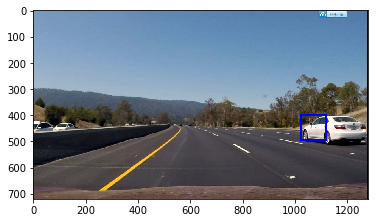

In [49]:
def find_cars(img, ystart, ystop, scale, svc, X_scaler, svc_1, X_scaler_1, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    box_list = []
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,640:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch,  cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features_0 = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_features_1 = X_scaler_1.transform(np.hstack((spatial_features, hog_features)).reshape(1, -1))    
            test_prediction_0 = svc.predict(test_features_0)
            test_prediction_1 = svc_1.predict(test_features_1)
            if test_prediction_0 == [0] and test_prediction_1 ==[1]:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left+640, ytop_draw+ystart),(xbox_left+win_draw+640,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box_list.append([(xbox_left+640, ytop_draw+ystart),(xbox_left+win_draw+640,ytop_draw+win_draw+ystart)])
    return draw_img, box_list
    
ystart = 400
ystop = 656
scale = 1.5
images= glob.glob('project_images/*.jpg')

img = mpimg.imread(images[8])
    
out_img, box_list = find_cars(img, ystart, ystop, scale, svr_0, X_scaler_0,svr_1, X_scaler_1, 9, 8, 2, (32,32), 32)

plt.imshow(out_img)

In [29]:
def find_more_cars(image):
    img = np.copy(image)
    _, box_list_0 = find_cars(img, 400, 656, 1.8, svr_0, X_scaler_0,svr_1, X_scaler_1, 9, 8, 2, (32,32), 32)
    _, box_list_1 = find_cars(img, 400, 656, 1.5, svr_0, X_scaler_0,svr_1, X_scaler_1, 9, 8, 2, (32,32), 32)    
    _, box_list_2 = find_cars(img, 400, 656, 1.1, svr_0, X_scaler_0,svr_1, X_scaler_1, 9, 8, 2, (32,32), 32)
    _, box_list_3 = find_cars(img, 400, 656, 0.8, svr_0, X_scaler_0,svr_1, X_scaler_1, 9, 8, 2, (32,32), 32)
    result = draw_boxes(img, box_list_0 + box_list_1+box_list_2+box_list_3, color=(0, 0, 255), thick=6)
    return result,  box_list_0 + box_list_1+box_list_2+box_list_3

C:\Program Files\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


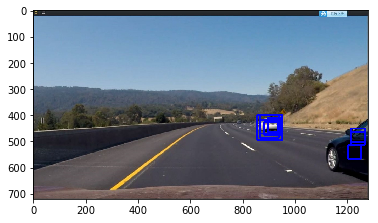

In [30]:
plt.imshow(find_more_cars(mpimg.imread(images[5]))[0])

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished
15 finished
16 finished
17 finished
18 finished
19 finished


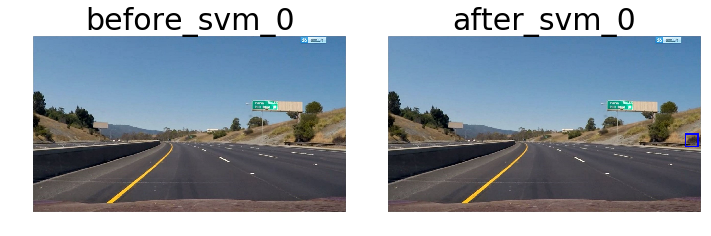

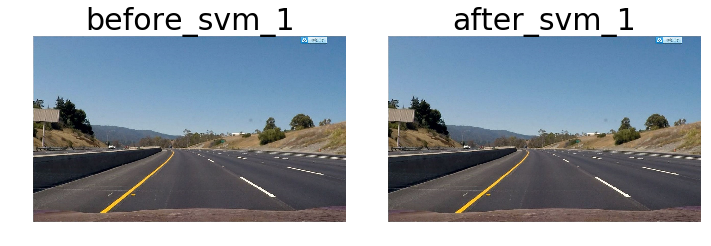

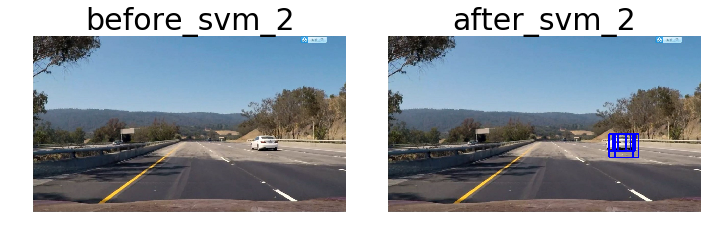

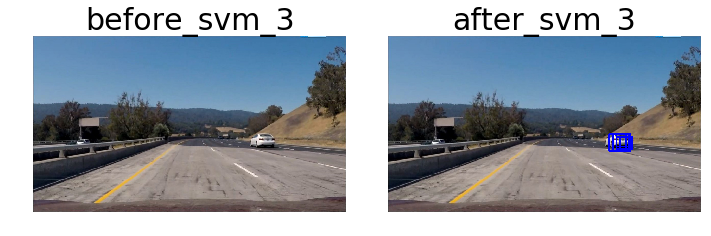

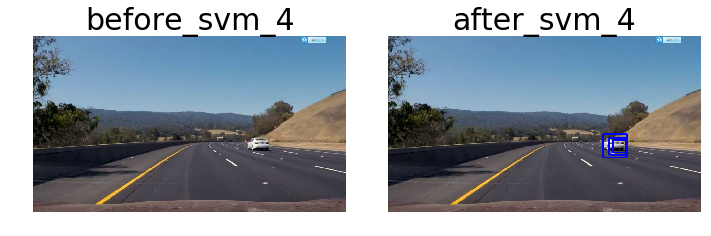

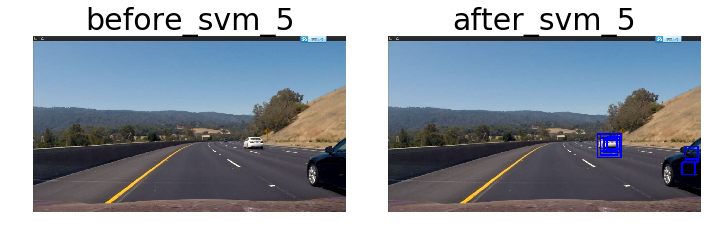

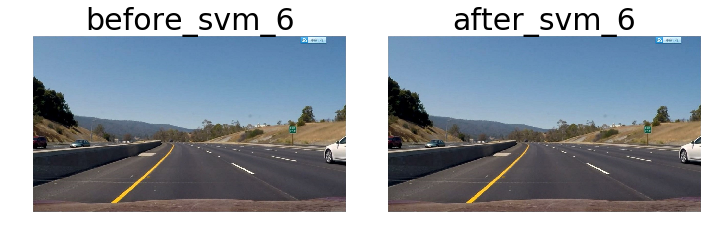

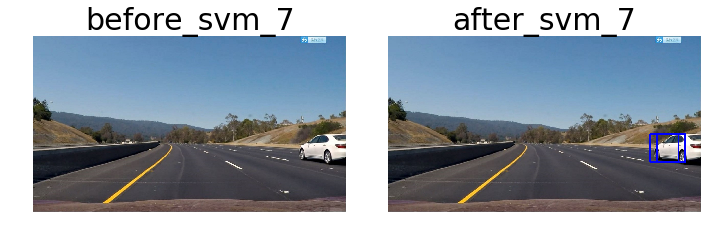

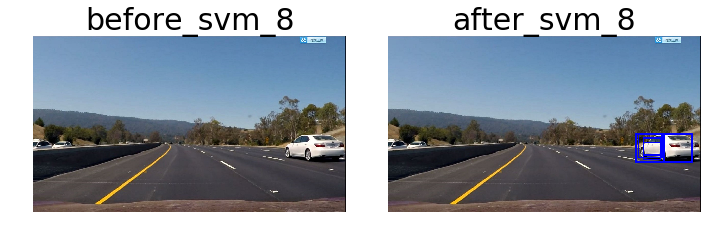

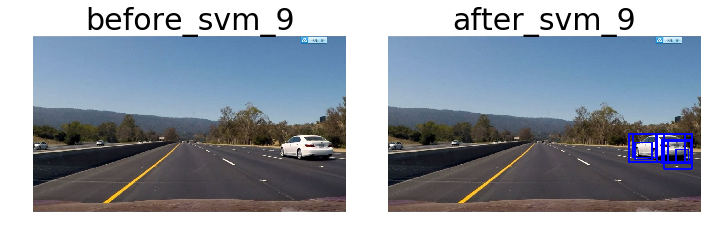

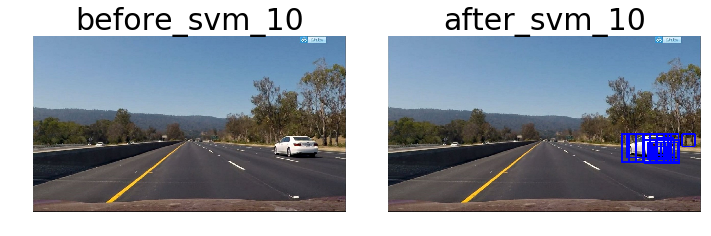

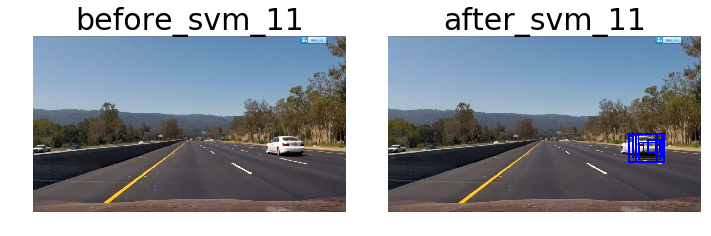

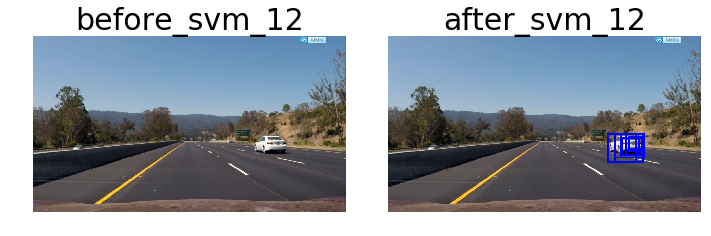

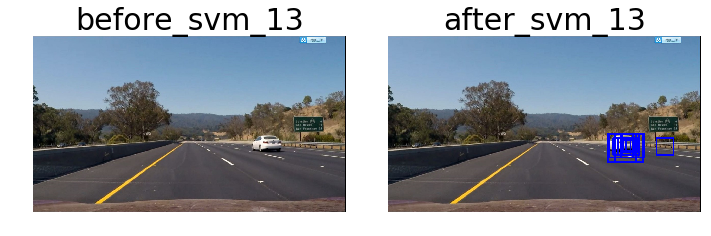

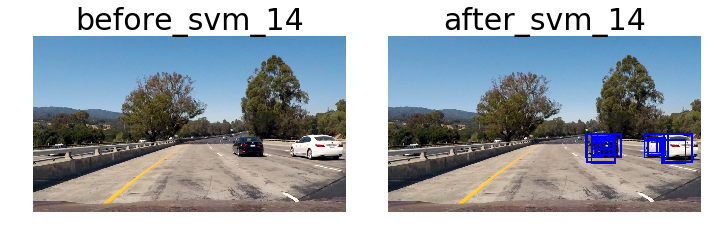

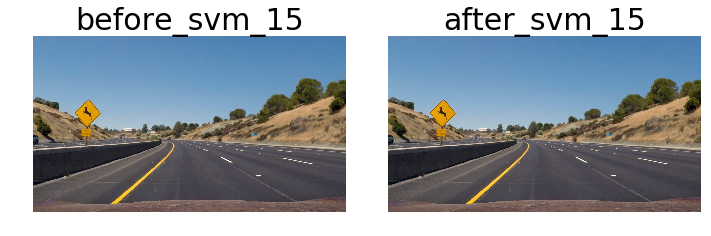

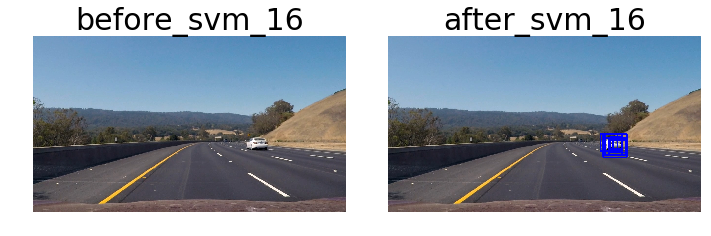

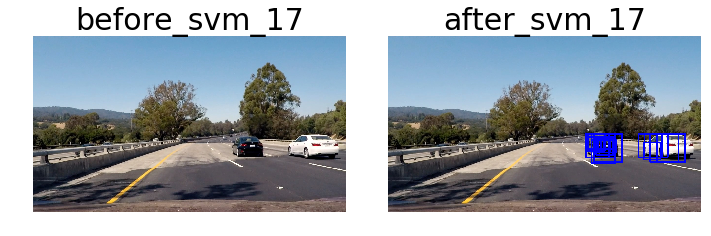

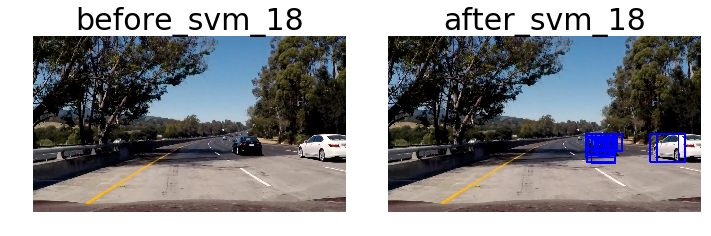

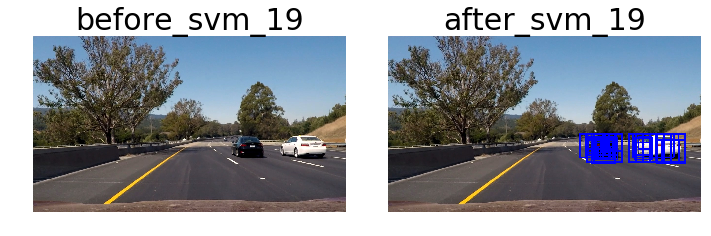

In [56]:
images = glob.glob('project_images/*.jpg')
for i in range(len(images)):
    img = mpimg.imread(images[i])
    out_img = find_more_cars(img)[0]
    plot_images(img, out_img ,   'before_svm_'+str(i),'after_svm_'+str(i), 'gray', 'gray')
    print(str(i) + ' finished')

## Heat Map

#### I use the heat map architecture on the slide. Except that when the shape of a box is unnormal,  not to draw it.

In [50]:
from scipy.ndimage.measurements import label

In [51]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    print(heatmap.shape)
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0

    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    labeled_bboxes = []
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        a = abs(np.min(nonzerox) - np.max(nonzerox))
        b = abs(np.min(nonzeroy) - np.max(nonzeroy))
        if 1/2.0 <= 1.0*a/b <= 5:
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
            labeled_bboxes.append(bbox)
    # Return the image
    return img, labeled_bboxes



In [52]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)

In [53]:
_ , box_list = find_more_cars(img)

(720, 1280)


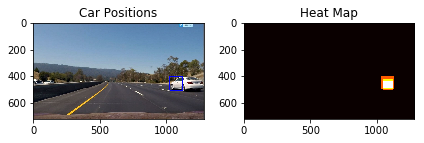

In [54]:
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 1)

# Visualize the heatmap when displaying   

heatmap = np.clip(heat, 0, 255)


# Find final boxes from heatmap using label function
labels = label(heatmap)

draw_img, labeled_bboxes = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


## Camera Calibration

In [55]:
def camera_calibration():

    nx = 9
    ny = 6
    cal_images = glob.glob('camera_cal/calibration*.jpg')

    obj_pts = np.zeros((nx*ny, 3), np.float32)
    obj_pts[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    
    cal_obj_pts = []
    cal_img_pts = []

    for fname in cal_images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret == True:
            cal_obj_pts.append(obj_pts)
            cal_img_pts.append(corners)
        
    ret, M, dist, rvecs, tvecs = cv2.calibrateCamera(cal_obj_pts, cal_img_pts, gray.shape[::-1], None, None)
    return M, dist

M_cal, dist_cal = camera_calibration()
    
def undistort(img):
    
    return cv2.undistort(img, M_cal, dist_cal, None, M_cal)
    

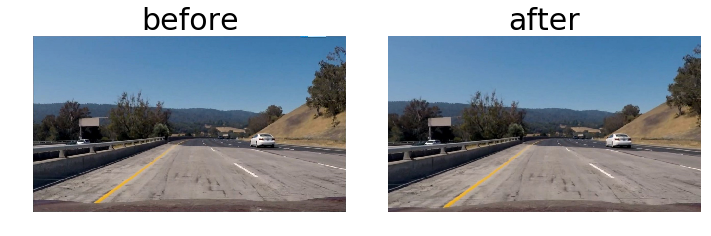

In [66]:

plot_images( mpimg.imread(images[3]),undistort(mpimg.imread(images[3])), "before", "after", "gray", "gray")

## Frame Pipelines

#### To make a demostration, I create a pipeline without history and a pipeline with history. The pipeline without history is to show the performance on each picture, the other one is to extract cars on the video.

#### The pipeline without history is nearly the same with the course contents. 

#### The pipeline with history is to take several svm images of the history, send it to the heat map. The heat map thresthold is higher than the previous method.   

In [56]:
def find_cars_pipeline(img):
    image = np.copy(img)
    undistorted = undistort(img)
    box_list = []
    _ , box_list = find_more_cars(img)
    
    heat = np.zeros_like(undistorted[:,:,0]).astype(np.float)
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 1)

    # Visualize the heatmap when displaying   

    heatmap = np.clip(heat, 0, 255)


    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    result, labeled_bboxes = draw_labeled_bboxes(np.copy(img), labels)
    
    return result
 

(720, 1280)


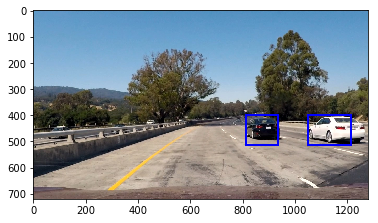

In [69]:
plt.imshow(find_cars_pipeline(mpimg.imread(images[14])))

In [42]:
history_box = [[], [], [], [], [] ,[],[], []]

def find_cars_pipeline_with_history(img):
    
    global history_box
    image = np.copy(img)
    undistorted = undistort(img)
    box_list = []
    _ , box_list = find_more_cars(img)
    history_box.append(box_list)
    
    heat = np.zeros_like(undistorted[:,:,0]).astype(np.float)
    
    for i in range(9) : 
        heat = add_heat(heat,history_box[-i])
    
    
    history_box = history_box[-9:]

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 4)

    # Visualize the heatmap when displaying   

    heatmap = np.clip(heat, 0, 255)


    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    result, labeled_bboxes = draw_labeled_bboxes(np.copy(img), labels)
    
    return result

(720, 1280)
(760, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)


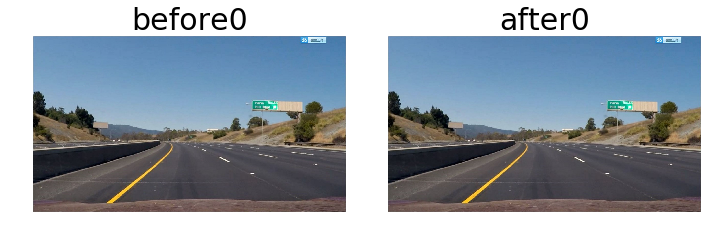

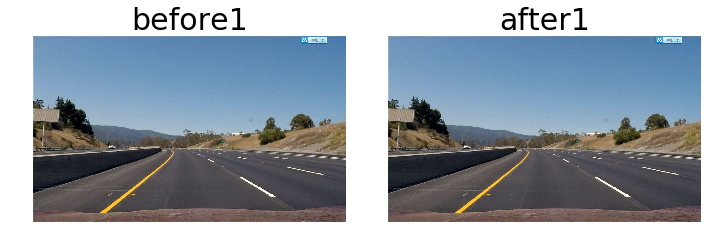

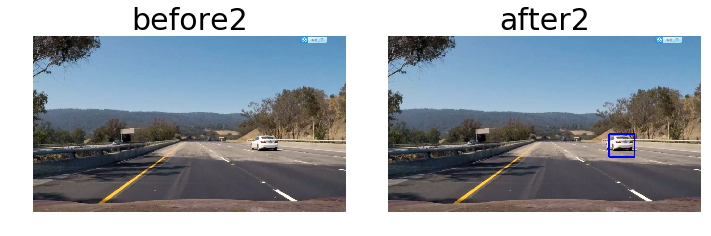

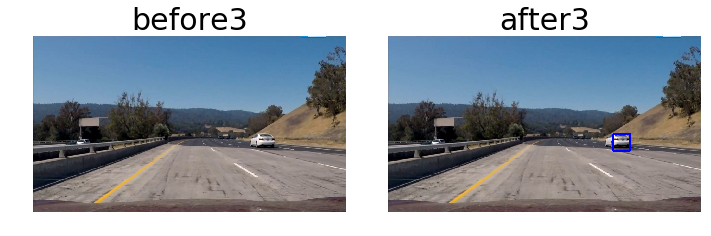

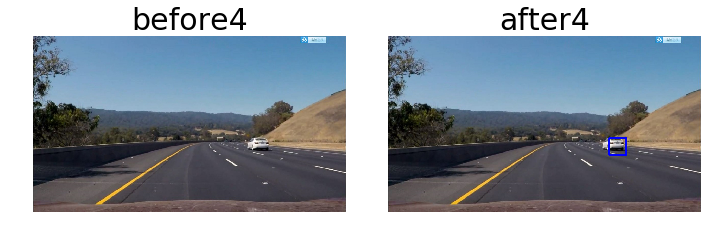

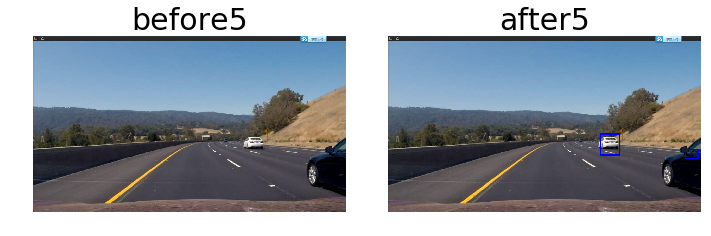

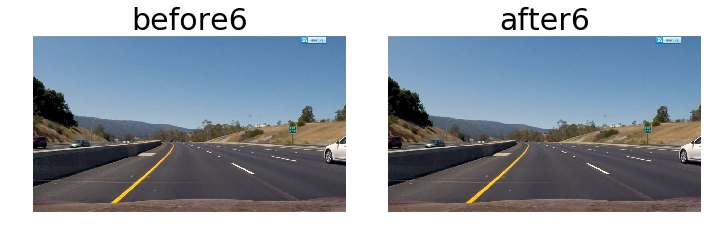

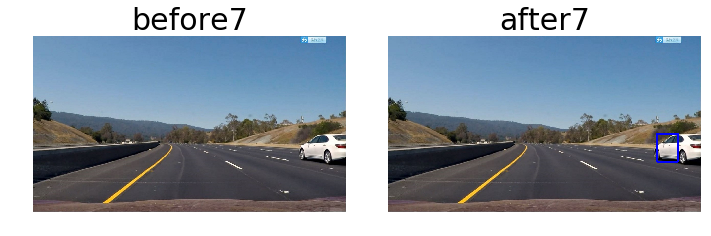

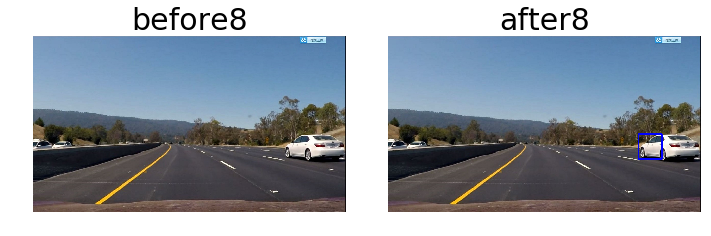

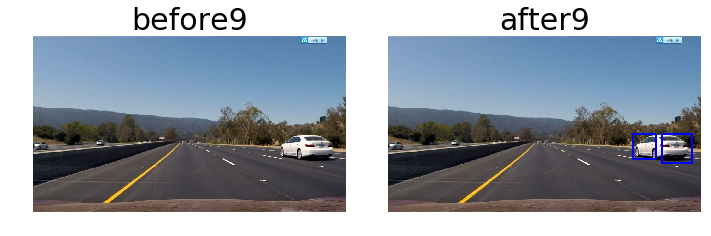

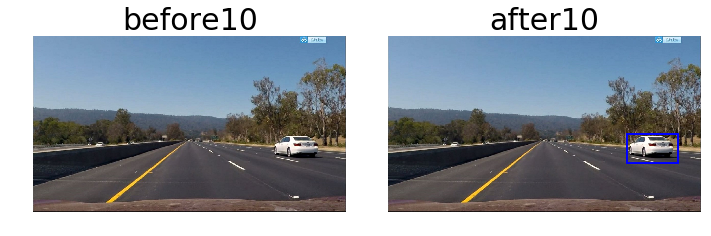

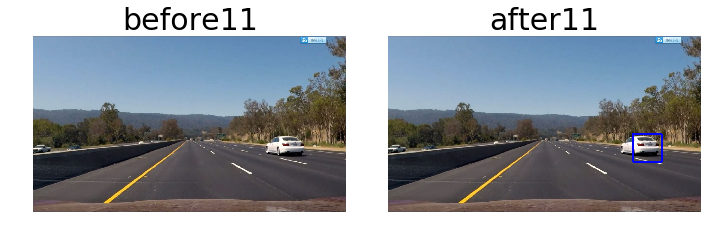

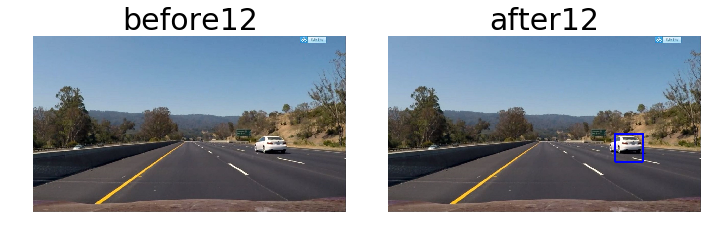

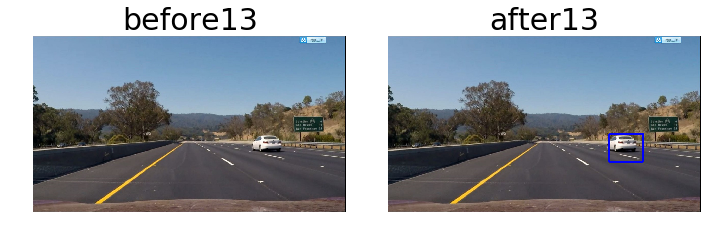

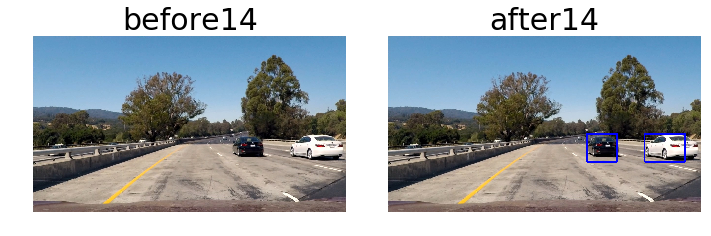

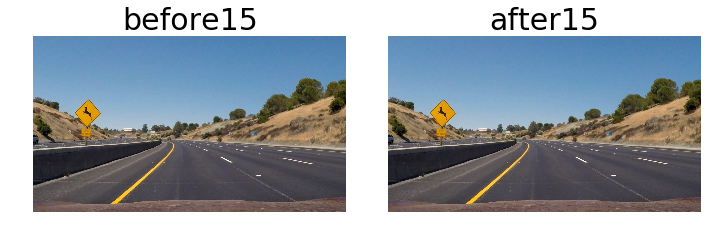

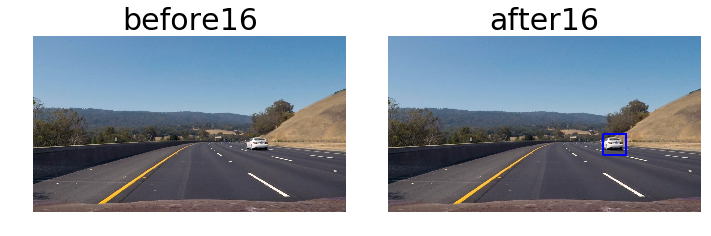

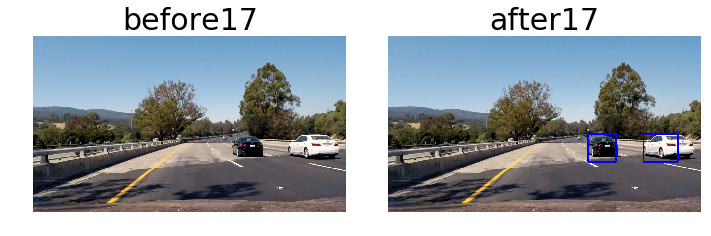

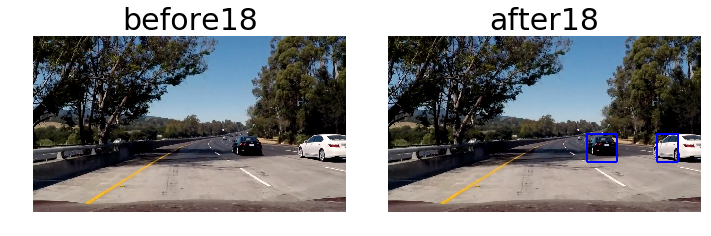

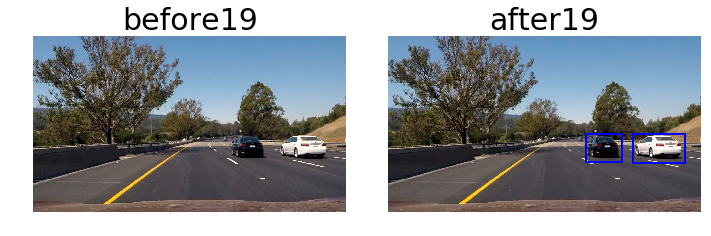

In [71]:
images = glob.glob('project_images/*.jpg')
for i in range(len(images)):
    img = mpimg.imread(images[i])
    plot_images(img, find_cars_pipeline(img),   'before'+str(i),'after'+str(i), 'gray', 'gray')

In [ ]:
img = mpimg.imread('project_images\\c0.JPG')


In [43]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


history_box = [[], [], [], [], [] ,[],[], []]
project_output = 'project_video_output_0.mp4'
clip = VideoFileClip("project_video.mp4")
output_clip = clip.fl_image(find_cars_pipeline_with_history)
%time output_clip.write_videofile(project_output, audio=False)



HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

(720, 1280)
[MoviePy] >>>> Building video project_video_output_0.mp4
[MoviePy] Writing video project_video_output_0.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]

(720, 1280)


  0%|                                       | 1/1261 [00:21<7:29:12, 21.39s/it]

(720, 1280)


  0%|                                       | 2/1261 [00:43<7:30:18, 21.46s/it]

(720, 1280)


  0%|                                       | 3/1261 [01:05<7:36:53, 21.79s/it]

(720, 1280)


  0%|                                       | 4/1261 [01:31<8:04:06, 23.11s/it]

(720, 1280)


  0%|▏                                      | 5/1261 [01:55<8:06:46, 23.25s/it]

(720, 1280)


  0%|▏                                      | 6/1261 [02:17<8:01:56, 23.04s/it]

(720, 1280)


  1%|▏                                      | 7/1261 [02:40<7:56:51, 22.82s/it]

(720, 1280)


  1%|▏                                      | 8/1261 [03:05<8:09:32, 23.44s/it]

(720, 1280)


  1%|▎                                      | 9/1261 [03:30<8:22:23, 24.08s/it]

(720, 1280)


  1%|▎                                     | 10/1261 [03:57<8:37:24, 24.82s/it]

(720, 1280)


  1%|▎                                     | 11/1261 [04:23<8:47:10, 25.30s/it]

(720, 1280)


  1%|▎                                     | 12/1261 [04:52<9:06:10, 26.24s/it]

(720, 1280)


  1%|▍                                     | 13/1261 [05:19<9:16:11, 26.74s/it]

(720, 1280)


  1%|▍                                     | 14/1261 [05:48<9:24:42, 27.17s/it]

(720, 1280)


  1%|▍                                     | 15/1261 [06:10<8:56:22, 25.83s/it]

(720, 1280)


  1%|▍                                     | 16/1261 [06:33<8:37:29, 24.94s/it]

(720, 1280)


  1%|▌                                     | 17/1261 [06:57<8:28:32, 24.53s/it]

(720, 1280)


  1%|▌                                     | 18/1261 [07:19<8:16:57, 23.99s/it]

(720, 1280)


  2%|▌                                     | 19/1261 [07:42<8:09:07, 23.63s/it]

(720, 1280)


  2%|▌                                     | 20/1261 [08:04<7:56:45, 23.05s/it]

(720, 1280)


  2%|▋                                     | 21/1261 [08:26<7:47:36, 22.63s/it]

(720, 1280)


  2%|▋                                     | 22/1261 [08:47<7:41:38, 22.36s/it]

(720, 1280)


  2%|▋                                     | 23/1261 [09:09<7:36:21, 22.12s/it]

(720, 1280)


  2%|▋                                     | 24/1261 [09:30<7:32:14, 21.94s/it]

(720, 1280)


  2%|▊                                     | 25/1261 [09:52<7:31:25, 21.91s/it]

(720, 1280)


  2%|▊                                     | 26/1261 [10:14<7:32:40, 21.99s/it]

(720, 1280)


  2%|▊                                     | 27/1261 [10:36<7:28:59, 21.83s/it]

(720, 1280)


  2%|▊                                     | 28/1261 [10:57<7:26:01, 21.70s/it]

(720, 1280)


  2%|▊                                     | 29/1261 [11:19<7:24:24, 21.64s/it]

(720, 1280)


  2%|▉                                     | 30/1261 [11:40<7:23:33, 21.62s/it]

(720, 1280)


  2%|▉                                     | 31/1261 [12:02<7:23:07, 21.62s/it]

(720, 1280)


  3%|▉                                     | 32/1261 [12:24<7:25:26, 21.75s/it]

(720, 1280)


  3%|▉                                     | 33/1261 [12:46<7:23:39, 21.68s/it]

(720, 1280)


  3%|█                                     | 34/1261 [13:07<7:23:12, 21.67s/it]

(720, 1280)


  3%|█                                     | 35/1261 [13:29<7:23:05, 21.68s/it]

(720, 1280)


  3%|█                                     | 36/1261 [13:52<7:30:09, 22.05s/it]

(720, 1280)


  3%|█                                     | 37/1261 [14:14<7:31:56, 22.15s/it]

(720, 1280)


  3%|█▏                                    | 38/1261 [14:36<7:30:43, 22.11s/it]

(720, 1280)


  3%|█▏                                    | 39/1261 [14:58<7:27:22, 21.97s/it]

(720, 1280)


  3%|█▏                                    | 40/1261 [15:20<7:26:26, 21.94s/it]

(720, 1280)


  3%|█▏                                    | 41/1261 [15:41<7:23:32, 21.81s/it]

(720, 1280)


  3%|█▎                                    | 42/1261 [16:03<7:20:52, 21.70s/it]

(720, 1280)


  3%|█▎                                    | 43/1261 [16:24<7:18:25, 21.60s/it]

(720, 1280)


  3%|█▎                                    | 44/1261 [16:46<7:20:18, 21.71s/it]

(720, 1280)


  4%|█▎                                    | 45/1261 [17:08<7:20:23, 21.73s/it]

(720, 1280)


  4%|█▍                                    | 46/1261 [17:30<7:20:39, 21.76s/it]

(720, 1280)


  4%|█▍                                    | 47/1261 [17:51<7:20:39, 21.78s/it]

(720, 1280)


  4%|█▍                                    | 48/1261 [18:13<7:20:06, 21.77s/it]

(720, 1280)


  4%|█▍                                    | 49/1261 [18:35<7:19:52, 21.78s/it]

(720, 1280)


  4%|█▌                                    | 50/1261 [18:57<7:18:47, 21.74s/it]

(720, 1280)


  4%|█▌                                    | 51/1261 [19:18<7:17:36, 21.70s/it]

(720, 1280)


  4%|█▌                                    | 52/1261 [19:41<7:22:12, 21.95s/it]

(720, 1280)


  4%|█▌                                    | 53/1261 [20:03<7:25:24, 22.12s/it]

(720, 1280)


  4%|█▋                                    | 54/1261 [20:26<7:26:20, 22.19s/it]

(720, 1280)


  4%|█▋                                    | 55/1261 [20:48<7:24:02, 22.09s/it]

(720, 1280)


  4%|█▋                                    | 56/1261 [21:10<7:28:01, 22.31s/it]

(720, 1280)


  5%|█▋                                    | 57/1261 [21:35<7:42:06, 23.03s/it]

(720, 1280)


  5%|█▋                                    | 58/1261 [21:57<7:38:03, 22.85s/it]

(720, 1280)


  5%|█▊                                    | 59/1261 [22:20<7:34:30, 22.69s/it]

(720, 1280)


  5%|█▊                                    | 60/1261 [22:43<7:40:02, 22.98s/it]

(720, 1280)


  5%|█▊                                    | 61/1261 [23:05<7:31:22, 22.57s/it]

(720, 1280)


  5%|█▊                                    | 62/1261 [23:26<7:23:51, 22.21s/it]

(720, 1280)


  5%|█▉                                    | 63/1261 [23:48<7:20:57, 22.08s/it]

(720, 1280)


  5%|█▉                                    | 64/1261 [24:10<7:16:59, 21.90s/it]

(720, 1280)


  5%|█▉                                    | 65/1261 [24:31<7:14:06, 21.78s/it]

(720, 1280)


  5%|█▉                                    | 66/1261 [24:53<7:11:06, 21.65s/it]

(720, 1280)


  5%|██                                    | 67/1261 [25:14<7:09:05, 21.56s/it]

(720, 1280)


  5%|██                                    | 68/1261 [25:35<7:08:04, 21.53s/it]

(720, 1280)


  5%|██                                    | 69/1261 [25:57<7:08:47, 21.58s/it]

(720, 1280)


  6%|██                                    | 70/1261 [26:18<7:07:04, 21.52s/it]

(720, 1280)


  6%|██▏                                   | 71/1261 [26:40<7:05:56, 21.48s/it]

(720, 1280)


  6%|██▏                                   | 72/1261 [27:01<7:04:59, 21.45s/it]

(720, 1280)


  6%|██▏                                   | 73/1261 [27:23<7:04:00, 21.41s/it]

(720, 1280)


  6%|██▏                                   | 74/1261 [27:44<7:05:12, 21.49s/it]

(720, 1280)


  6%|██▎                                   | 75/1261 [28:06<7:03:50, 21.44s/it]

(720, 1280)


  6%|██▎                                   | 76/1261 [28:27<7:03:10, 21.43s/it]

(720, 1280)


  6%|██▎                                   | 77/1261 [28:48<7:02:29, 21.41s/it]

(720, 1280)


  6%|██▎                                   | 78/1261 [29:10<7:04:02, 21.51s/it]

(720, 1280)


  6%|██▍                                   | 79/1261 [29:32<7:03:43, 21.51s/it]

(720, 1280)


  6%|██▍                                   | 80/1261 [29:53<7:04:34, 21.57s/it]

(720, 1280)


  6%|██▍                                   | 81/1261 [30:15<7:04:14, 21.57s/it]

(720, 1280)


  7%|██▍                                   | 82/1261 [30:36<7:03:14, 21.54s/it]

(720, 1280)


  7%|██▌                                   | 83/1261 [30:58<7:01:29, 21.47s/it]

(720, 1280)


  7%|██▌                                   | 84/1261 [31:19<7:00:35, 21.44s/it]

(720, 1280)


  7%|██▌                                   | 85/1261 [31:41<7:01:51, 21.52s/it]

(720, 1280)


  7%|██▌                                   | 86/1261 [32:02<7:00:46, 21.49s/it]

(720, 1280)


  7%|██▌                                   | 87/1261 [32:23<6:59:43, 21.45s/it]

(720, 1280)


  7%|██▋                                   | 88/1261 [32:45<6:59:16, 21.45s/it]

(720, 1280)


  7%|██▋                                   | 89/1261 [33:06<6:58:35, 21.43s/it]

(720, 1280)


  7%|██▋                                   | 90/1261 [33:28<6:57:45, 21.40s/it]

(720, 1280)


  7%|██▋                                   | 91/1261 [33:49<6:59:13, 21.50s/it]

(720, 1280)


  7%|██▊                                   | 92/1261 [34:11<6:58:05, 21.46s/it]

(720, 1280)


  7%|██▊                                   | 93/1261 [34:32<6:57:23, 21.44s/it]

(720, 1280)


  7%|██▊                                   | 94/1261 [34:53<6:56:24, 21.41s/it]

(720, 1280)


  8%|██▊                                   | 95/1261 [35:15<6:55:48, 21.40s/it]

(720, 1280)


  8%|██▉                                   | 96/1261 [35:36<6:55:44, 21.41s/it]

(720, 1280)


  8%|██▉                                   | 97/1261 [35:58<6:57:07, 21.50s/it]

(720, 1280)


  8%|██▉                                   | 98/1261 [36:19<6:56:15, 21.48s/it]

(720, 1280)


  8%|██▉                                   | 99/1261 [36:41<6:55:22, 21.45s/it]

(720, 1280)


  8%|██▉                                  | 100/1261 [37:02<6:54:39, 21.43s/it]

(720, 1280)


  8%|██▉                                  | 101/1261 [37:23<6:53:28, 21.39s/it]

(720, 1280)


  8%|██▉                                  | 102/1261 [37:45<6:55:30, 21.51s/it]

(720, 1280)


  8%|███                                  | 103/1261 [38:07<6:54:44, 21.49s/it]

(720, 1280)


  8%|███                                  | 104/1261 [38:28<6:53:32, 21.45s/it]

(720, 1280)


  8%|███                                  | 105/1261 [38:49<6:52:47, 21.42s/it]

(720, 1280)


  8%|███                                  | 106/1261 [39:11<6:52:15, 21.42s/it]

(720, 1280)


  8%|███▏                                 | 107/1261 [39:32<6:53:13, 21.49s/it]

(720, 1280)


  9%|███▏                                 | 108/1261 [39:54<6:54:29, 21.57s/it]

(720, 1280)


  9%|███▏                                 | 109/1261 [40:16<6:54:43, 21.60s/it]

(720, 1280)


  9%|███▏                                 | 110/1261 [40:37<6:53:24, 21.55s/it]

(720, 1280)


  9%|███▎                                 | 111/1261 [40:59<6:51:55, 21.49s/it]

(720, 1280)


  9%|███▎                                 | 112/1261 [41:20<6:50:50, 21.45s/it]

(720, 1280)


  9%|███▎                                 | 113/1261 [41:42<6:52:05, 21.54s/it]

(720, 1280)


  9%|███▎                                 | 114/1261 [42:03<6:50:30, 21.47s/it]

(720, 1280)


  9%|███▎                                 | 115/1261 [42:24<6:49:36, 21.45s/it]

(720, 1280)


  9%|███▍                                 | 116/1261 [42:46<6:48:31, 21.41s/it]

(720, 1280)


  9%|███▍                                 | 117/1261 [43:07<6:47:40, 21.38s/it]

(720, 1280)


  9%|███▍                                 | 118/1261 [43:28<6:46:57, 21.36s/it]

(720, 1280)


  9%|███▍                                 | 119/1261 [43:50<6:48:38, 21.47s/it]

(720, 1280)


 10%|███▌                                 | 120/1261 [44:12<6:48:29, 21.48s/it]

(720, 1280)


 10%|███▌                                 | 121/1261 [44:33<6:47:49, 21.46s/it]

(720, 1280)


 10%|███▌                                 | 122/1261 [44:54<6:46:53, 21.43s/it]

(720, 1280)


 10%|███▌                                 | 123/1261 [45:16<6:46:09, 21.41s/it]

(720, 1280)


 10%|███▋                                 | 124/1261 [45:37<6:46:22, 21.44s/it]

(720, 1280)


 10%|███▋                                 | 125/1261 [45:59<6:46:36, 21.48s/it]

(720, 1280)


 10%|███▋                                 | 126/1261 [46:20<6:46:18, 21.48s/it]

(720, 1280)


 10%|███▋                                 | 127/1261 [46:42<6:45:34, 21.46s/it]

(720, 1280)


 10%|███▊                                 | 128/1261 [47:03<6:44:59, 21.45s/it]

(720, 1280)


 10%|███▊                                 | 129/1261 [47:25<6:44:35, 21.44s/it]

(720, 1280)


 10%|███▊                                 | 130/1261 [47:46<6:45:35, 21.52s/it]

(720, 1280)


 10%|███▊                                 | 131/1261 [48:08<6:45:18, 21.52s/it]

(720, 1280)


 10%|███▊                                 | 132/1261 [48:29<6:44:25, 21.49s/it]

(720, 1280)


 11%|███▉                                 | 133/1261 [48:51<6:43:12, 21.45s/it]

(720, 1280)


 11%|███▉                                 | 134/1261 [49:12<6:42:15, 21.42s/it]

(720, 1280)


 11%|███▉                                 | 135/1261 [49:33<6:41:24, 21.39s/it]

(720, 1280)


 11%|███▉                                 | 136/1261 [49:55<6:42:59, 21.49s/it]

(720, 1280)


 11%|████                                 | 137/1261 [50:17<6:43:00, 21.51s/it]

(720, 1280)


 11%|████                                 | 138/1261 [50:38<6:41:44, 21.46s/it]

(720, 1280)


 11%|████                                 | 139/1261 [50:59<6:40:50, 21.44s/it]

(720, 1280)


 11%|████                                 | 140/1261 [51:21<6:40:14, 21.42s/it]

(720, 1280)


 11%|████▏                                | 141/1261 [51:42<6:41:03, 21.49s/it]

(720, 1280)


 11%|████▏                                | 142/1261 [52:04<6:40:40, 21.48s/it]

(720, 1280)


 11%|████▏                                | 143/1261 [52:25<6:39:58, 21.47s/it]

(720, 1280)


 11%|████▏                                | 144/1261 [52:47<6:39:16, 21.45s/it]

(720, 1280)


 11%|████▎                                | 145/1261 [53:08<6:38:14, 21.41s/it]

(720, 1280)


 12%|████▎                                | 146/1261 [53:29<6:37:03, 21.37s/it]

(720, 1280)


 12%|████▎                                | 147/1261 [53:51<6:38:51, 21.48s/it]

(720, 1280)


 12%|████▎                                | 148/1261 [54:13<6:44:00, 21.78s/it]

(720, 1280)


 12%|████▎                                | 149/1261 [54:35<6:41:56, 21.69s/it]

(720, 1280)


 12%|████▍                                | 150/1261 [54:56<6:39:31, 21.58s/it]

(720, 1280)


 12%|████▍                                | 151/1261 [55:18<6:38:06, 21.52s/it]

(720, 1280)


 12%|████▍                                | 152/1261 [55:39<6:39:30, 21.61s/it]

(720, 1280)


 12%|████▍                                | 153/1261 [56:01<6:37:34, 21.53s/it]

(720, 1280)


 12%|████▌                                | 154/1261 [56:22<6:36:44, 21.50s/it]

(720, 1280)


 12%|████▌                                | 155/1261 [56:44<6:35:32, 21.46s/it]

(720, 1280)


 12%|████▌                                | 156/1261 [57:05<6:34:30, 21.42s/it]

(720, 1280)


 12%|████▌                                | 157/1261 [57:26<6:33:17, 21.37s/it]

(720, 1280)


 13%|████▋                                | 158/1261 [57:49<6:40:37, 21.79s/it]

(720, 1280)


 13%|████▋                                | 159/1261 [58:10<6:37:58, 21.67s/it]

(720, 1280)


 13%|████▋                                | 160/1261 [58:32<6:36:04, 21.58s/it]

(720, 1280)


 13%|████▋                                | 161/1261 [58:53<6:34:27, 21.52s/it]

(720, 1280)


 13%|████▊                                | 162/1261 [59:14<6:33:19, 21.47s/it]

(720, 1280)


 13%|████▊                                | 163/1261 [59:36<6:33:08, 21.48s/it]

(720, 1280)


 13%|████▊                                | 164/1261 [59:58<6:33:22, 21.52s/it]

(720, 1280)


 13%|████▌                              | 165/1261 [1:00:19<6:34:24, 21.59s/it]

(720, 1280)


 13%|████▌                              | 166/1261 [1:00:41<6:33:10, 21.54s/it]

(720, 1280)


 13%|████▋                              | 167/1261 [1:01:02<6:31:56, 21.50s/it]

(720, 1280)


 13%|████▋                              | 168/1261 [1:01:23<6:30:49, 21.45s/it]

(720, 1280)


 13%|████▋                              | 169/1261 [1:01:45<6:31:56, 21.53s/it]

(720, 1280)


 13%|████▋                              | 170/1261 [1:02:07<6:30:20, 21.47s/it]

(720, 1280)


 14%|████▋                              | 171/1261 [1:02:28<6:29:35, 21.45s/it]

(720, 1280)


 14%|████▊                              | 172/1261 [1:02:49<6:28:57, 21.43s/it]

(720, 1280)


 14%|████▊                              | 173/1261 [1:03:11<6:29:39, 21.49s/it]

(720, 1280)


 14%|████▊                              | 174/1261 [1:03:32<6:28:49, 21.46s/it]

(720, 1280)


 14%|████▊                              | 175/1261 [1:03:54<6:31:02, 21.60s/it]

(720, 1280)


 14%|████▉                              | 176/1261 [1:04:16<6:30:31, 21.60s/it]

(720, 1280)


 14%|████▉                              | 177/1261 [1:04:37<6:28:54, 21.53s/it]

(720, 1280)


 14%|████▉                              | 178/1261 [1:04:59<6:28:12, 21.51s/it]

(720, 1280)


 14%|████▉                              | 179/1261 [1:05:20<6:27:20, 21.48s/it]

(720, 1280)


 14%|████▉                              | 180/1261 [1:05:42<6:28:09, 21.54s/it]

(720, 1280)


 14%|█████                              | 181/1261 [1:06:03<6:27:06, 21.51s/it]

(720, 1280)


 14%|█████                              | 182/1261 [1:06:25<6:26:05, 21.47s/it]

(720, 1280)


 15%|█████                              | 183/1261 [1:06:46<6:24:51, 21.42s/it]

(720, 1280)


 15%|█████                              | 184/1261 [1:07:07<6:24:21, 21.41s/it]

(720, 1280)


 15%|█████▏                             | 185/1261 [1:07:29<6:23:50, 21.40s/it]

(720, 1280)


 15%|█████▏                             | 186/1261 [1:07:50<6:25:38, 21.52s/it]

(720, 1280)


 15%|█████▏                             | 187/1261 [1:08:12<6:25:06, 21.51s/it]

(720, 1280)


 15%|█████▏                             | 188/1261 [1:08:33<6:23:31, 21.45s/it]

(720, 1280)


 15%|█████▏                             | 189/1261 [1:08:55<6:22:54, 21.43s/it]

(720, 1280)


 15%|█████▎                             | 190/1261 [1:09:16<6:22:38, 21.44s/it]

(720, 1280)


 15%|█████▎                             | 191/1261 [1:09:38<6:23:09, 21.49s/it]

(720, 1280)


 15%|█████▎                             | 192/1261 [1:09:59<6:23:26, 21.52s/it]

(720, 1280)


 15%|█████▎                             | 193/1261 [1:10:21<6:25:19, 21.65s/it]

(720, 1280)


 15%|█████▍                             | 194/1261 [1:10:43<6:24:00, 21.59s/it]

(720, 1280)


 15%|█████▍                             | 195/1261 [1:11:04<6:22:46, 21.54s/it]

(720, 1280)


 16%|█████▍                             | 196/1261 [1:11:26<6:21:39, 21.50s/it]

(720, 1280)


 16%|█████▍                             | 197/1261 [1:11:47<6:22:32, 21.57s/it]

(720, 1280)


 16%|█████▍                             | 198/1261 [1:12:09<6:21:10, 21.51s/it]

(720, 1280)


 16%|█████▌                             | 199/1261 [1:12:30<6:20:06, 21.47s/it]

(720, 1280)


 16%|█████▌                             | 200/1261 [1:12:51<6:19:22, 21.45s/it]

(720, 1280)


 16%|█████▌                             | 201/1261 [1:13:13<6:18:16, 21.41s/it]

(720, 1280)


 16%|█████▌                             | 202/1261 [1:13:34<6:17:56, 21.41s/it]

(720, 1280)


 16%|█████▋                             | 203/1261 [1:13:56<6:20:19, 21.57s/it]

(720, 1280)


 16%|█████▋                             | 204/1261 [1:14:18<6:19:27, 21.54s/it]

(720, 1280)


 16%|█████▋                             | 205/1261 [1:14:39<6:18:40, 21.52s/it]

(720, 1280)


 16%|█████▋                             | 206/1261 [1:15:00<6:17:48, 21.49s/it]

(720, 1280)


 16%|█████▋                             | 207/1261 [1:15:22<6:16:43, 21.45s/it]

(720, 1280)


 16%|█████▊                             | 208/1261 [1:15:44<6:17:46, 21.53s/it]

(720, 1280)


 17%|█████▊                             | 209/1261 [1:16:05<6:16:44, 21.49s/it]

(720, 1280)


 17%|█████▊                             | 210/1261 [1:16:26<6:16:20, 21.48s/it]

(720, 1280)


 17%|█████▊                             | 211/1261 [1:16:48<6:15:52, 21.48s/it]

(720, 1280)


 17%|█████▉                             | 212/1261 [1:17:09<6:14:57, 21.45s/it]

(720, 1280)


 17%|█████▉                             | 213/1261 [1:17:31<6:13:57, 21.41s/it]

(720, 1280)


 17%|█████▉                             | 214/1261 [1:17:52<6:15:45, 21.53s/it]

(720, 1280)


 17%|█████▉                             | 215/1261 [1:18:14<6:14:25, 21.48s/it]

(720, 1280)


 17%|█████▉                             | 216/1261 [1:18:35<6:13:30, 21.45s/it]

(720, 1280)


 17%|██████                             | 217/1261 [1:18:56<6:12:24, 21.40s/it]

(720, 1280)


 17%|██████                             | 218/1261 [1:19:18<6:11:58, 21.40s/it]

(720, 1280)


 17%|██████                             | 219/1261 [1:19:39<6:13:11, 21.49s/it]

(720, 1280)


 17%|██████                             | 220/1261 [1:20:01<6:12:32, 21.47s/it]

(720, 1280)


 18%|██████▏                            | 221/1261 [1:20:22<6:12:42, 21.50s/it]

(720, 1280)


 18%|██████▏                            | 222/1261 [1:20:44<6:11:43, 21.47s/it]

(720, 1280)


 18%|██████▏                            | 223/1261 [1:21:05<6:10:44, 21.43s/it]

(720, 1280)


 18%|██████▏                            | 224/1261 [1:21:27<6:10:20, 21.43s/it]

(720, 1280)


 18%|██████▏                            | 225/1261 [1:21:48<6:11:45, 21.53s/it]

(720, 1280)


 18%|██████▎                            | 226/1261 [1:22:10<6:10:37, 21.49s/it]

(720, 1280)


 18%|██████▎                            | 227/1261 [1:22:31<6:09:38, 21.45s/it]

(720, 1280)


 18%|██████▎                            | 228/1261 [1:22:52<6:08:46, 21.42s/it]

(720, 1280)


 18%|██████▎                            | 229/1261 [1:23:14<6:08:12, 21.41s/it]

(720, 1280)


 18%|██████▍                            | 230/1261 [1:23:35<6:07:51, 21.41s/it]

(720, 1280)


 18%|██████▍                            | 231/1261 [1:23:57<6:09:12, 21.51s/it]

(720, 1280)


 18%|██████▍                            | 232/1261 [1:24:18<6:08:12, 21.47s/it]

(720, 1280)


 18%|██████▍                            | 233/1261 [1:24:40<6:07:36, 21.46s/it]

(720, 1280)


 19%|██████▍                            | 234/1261 [1:25:01<6:06:46, 21.43s/it]

(720, 1280)


 19%|██████▌                            | 235/1261 [1:25:23<6:06:17, 21.42s/it]

(720, 1280)


 19%|██████▌                            | 236/1261 [1:25:44<6:08:06, 21.55s/it]

(720, 1280)


 19%|██████▌                            | 237/1261 [1:26:06<6:07:08, 21.51s/it]

(720, 1280)


 19%|██████▌                            | 238/1261 [1:26:27<6:05:51, 21.46s/it]

(720, 1280)


 19%|██████▋                            | 239/1261 [1:26:48<6:04:33, 21.40s/it]

(720, 1280)


 19%|██████▋                            | 240/1261 [1:27:10<6:04:09, 21.40s/it]

(720, 1280)


 19%|██████▋                            | 241/1261 [1:27:31<6:03:38, 21.39s/it]

(720, 1280)


 19%|██████▋                            | 242/1261 [1:27:53<6:04:39, 21.47s/it]

(720, 1280)


 19%|██████▋                            | 243/1261 [1:28:14<6:03:51, 21.45s/it]

(720, 1280)


 19%|██████▊                            | 244/1261 [1:28:36<6:03:11, 21.43s/it]

(720, 1280)


 19%|██████▊                            | 245/1261 [1:28:57<6:02:21, 21.40s/it]

(720, 1280)


 20%|██████▊                            | 246/1261 [1:29:18<6:01:55, 21.39s/it]

(720, 1280)


 20%|██████▊                            | 247/1261 [1:29:40<6:02:50, 21.47s/it]

(720, 1280)


 20%|██████▉                            | 248/1261 [1:30:02<6:02:32, 21.47s/it]

(720, 1280)


 20%|██████▉                            | 249/1261 [1:30:23<6:03:26, 21.55s/it]

(720, 1280)


 20%|██████▉                            | 250/1261 [1:30:45<6:02:13, 21.50s/it]

(720, 1280)


 20%|██████▉                            | 251/1261 [1:31:06<6:01:29, 21.47s/it]

(720, 1280)


 20%|██████▉                            | 252/1261 [1:31:27<6:00:16, 21.42s/it]

(720, 1280)


 20%|███████                            | 253/1261 [1:31:49<6:01:47, 21.54s/it]

(720, 1280)


 20%|███████                            | 254/1261 [1:32:11<6:00:53, 21.50s/it]

(720, 1280)


 20%|███████                            | 255/1261 [1:32:32<5:59:59, 21.47s/it]

(720, 1280)


 20%|███████                            | 256/1261 [1:32:53<5:59:13, 21.45s/it]

(720, 1280)


 20%|███████▏                           | 257/1261 [1:33:15<5:58:29, 21.42s/it]

(720, 1280)


 20%|███████▏                           | 258/1261 [1:33:36<5:57:54, 21.41s/it]

(720, 1280)


 21%|███████▏                           | 259/1261 [1:33:58<5:58:41, 21.48s/it]

(720, 1280)


 21%|███████▏                           | 260/1261 [1:34:19<5:57:50, 21.45s/it]

(720, 1280)


 21%|███████▏                           | 261/1261 [1:34:40<5:57:05, 21.43s/it]

(720, 1280)


 21%|███████▎                           | 262/1261 [1:35:02<5:56:27, 21.41s/it]

(720, 1280)


 21%|███████▎                           | 263/1261 [1:35:23<5:55:53, 21.40s/it]

(720, 1280)


 21%|███████▎                           | 264/1261 [1:35:45<5:57:41, 21.53s/it]

(720, 1280)


 21%|███████▎                           | 265/1261 [1:36:06<5:56:41, 21.49s/it]

(720, 1280)


 21%|███████▍                           | 266/1261 [1:36:28<5:56:08, 21.48s/it]

(720, 1280)


 21%|███████▍                           | 267/1261 [1:36:49<5:54:57, 21.43s/it]

(720, 1280)


 21%|███████▍                           | 268/1261 [1:37:11<5:54:27, 21.42s/it]

(720, 1280)


 21%|███████▍                           | 269/1261 [1:37:32<5:54:13, 21.43s/it]

(720, 1280)


 21%|███████▍                           | 270/1261 [1:37:54<5:55:21, 21.51s/it]

(720, 1280)


 21%|███████▌                           | 271/1261 [1:38:15<5:54:30, 21.49s/it]

(720, 1280)


 22%|███████▌                           | 272/1261 [1:38:37<5:53:21, 21.44s/it]

(720, 1280)


 22%|███████▌                           | 273/1261 [1:38:58<5:52:43, 21.42s/it]

(720, 1280)


 22%|███████▌                           | 274/1261 [1:39:19<5:52:10, 21.41s/it]

(720, 1280)


 22%|███████▋                           | 275/1261 [1:39:41<5:53:46, 21.53s/it]

(720, 1280)


 22%|███████▋                           | 276/1261 [1:40:03<5:53:04, 21.51s/it]

(720, 1280)


 22%|███████▋                           | 277/1261 [1:40:24<5:53:31, 21.56s/it]

(720, 1280)


 22%|███████▋                           | 278/1261 [1:40:46<5:52:12, 21.50s/it]

(720, 1280)


 22%|███████▋                           | 279/1261 [1:41:07<5:51:30, 21.48s/it]

(720, 1280)


 22%|███████▊                           | 280/1261 [1:41:28<5:50:38, 21.45s/it]

(720, 1280)


 22%|███████▊                           | 281/1261 [1:41:50<5:52:14, 21.57s/it]

(720, 1280)


 22%|███████▊                           | 282/1261 [1:42:12<5:51:06, 21.52s/it]

(720, 1280)


 22%|███████▊                           | 283/1261 [1:42:33<5:50:14, 21.49s/it]

(720, 1280)


 23%|███████▉                           | 284/1261 [1:42:54<5:49:12, 21.45s/it]

(720, 1280)


 23%|███████▉                           | 285/1261 [1:43:16<5:48:35, 21.43s/it]

(720, 1280)


 23%|███████▉                           | 286/1261 [1:43:37<5:48:37, 21.45s/it]

(720, 1280)


 23%|███████▉                           | 287/1261 [1:43:59<5:48:40, 21.48s/it]

(720, 1280)


 23%|███████▉                           | 288/1261 [1:44:20<5:47:37, 21.44s/it]

(720, 1280)


 23%|████████                           | 289/1261 [1:44:42<5:46:58, 21.42s/it]

(720, 1280)


 23%|████████                           | 290/1261 [1:45:03<5:46:32, 21.41s/it]

(720, 1280)


 23%|████████                           | 291/1261 [1:45:24<5:46:09, 21.41s/it]

(720, 1280)


 23%|████████                           | 292/1261 [1:45:46<5:47:28, 21.52s/it]

(720, 1280)


 23%|████████▏                          | 293/1261 [1:46:08<5:47:11, 21.52s/it]

(720, 1280)


 23%|████████▏                          | 294/1261 [1:46:29<5:46:12, 21.48s/it]

(720, 1280)


 23%|████████▏                          | 295/1261 [1:46:50<5:45:27, 21.46s/it]

(720, 1280)


 23%|████████▏                          | 296/1261 [1:47:12<5:44:16, 21.41s/it]

(720, 1280)


 24%|████████▏                          | 297/1261 [1:47:33<5:43:36, 21.39s/it]

(720, 1280)


 24%|████████▎                          | 298/1261 [1:47:55<5:45:22, 21.52s/it]

(720, 1280)


 24%|████████▎                          | 299/1261 [1:48:16<5:44:10, 21.47s/it]

(720, 1280)


 24%|████████▎                          | 300/1261 [1:48:38<5:43:27, 21.44s/it]

(720, 1280)


 24%|████████▎                          | 301/1261 [1:48:59<5:42:31, 21.41s/it]

(720, 1280)


 24%|████████▍                          | 302/1261 [1:49:20<5:42:02, 21.40s/it]

(720, 1280)


 24%|████████▍                          | 303/1261 [1:49:42<5:43:13, 21.50s/it]

(720, 1280)


 24%|████████▍                          | 304/1261 [1:50:03<5:42:05, 21.45s/it]

(720, 1280)


 24%|████████▍                          | 305/1261 [1:50:25<5:42:38, 21.51s/it]

(720, 1280)


 24%|████████▍                          | 306/1261 [1:50:47<5:42:17, 21.51s/it]

(720, 1280)


 24%|████████▌                          | 307/1261 [1:51:08<5:41:52, 21.50s/it]

(720, 1280)


 24%|████████▌                          | 308/1261 [1:51:29<5:40:58, 21.47s/it]

(720, 1280)


 25%|████████▌                          | 309/1261 [1:51:51<5:42:36, 21.59s/it]

(720, 1280)


 25%|████████▌                          | 310/1261 [1:52:13<5:41:25, 21.54s/it]

(720, 1280)


 25%|████████▋                          | 311/1261 [1:52:34<5:39:50, 21.46s/it]

(720, 1280)


 25%|████████▋                          | 312/1261 [1:52:55<5:39:08, 21.44s/it]

(720, 1280)


 25%|████████▋                          | 313/1261 [1:53:17<5:38:11, 21.40s/it]

(720, 1280)


 25%|████████▋                          | 314/1261 [1:53:38<5:38:39, 21.46s/it]

(720, 1280)


 25%|████████▋                          | 315/1261 [1:54:01<5:42:43, 21.74s/it]

(720, 1280)


 25%|████████▊                          | 316/1261 [1:54:22<5:42:20, 21.74s/it]

(720, 1280)


 25%|████████▊                          | 317/1261 [1:54:44<5:40:45, 21.66s/it]

(720, 1280)


 25%|████████▊                          | 318/1261 [1:55:05<5:39:15, 21.59s/it]

(720, 1280)


 25%|████████▊                          | 319/1261 [1:55:27<5:38:13, 21.54s/it]

(720, 1280)


 25%|████████▉                          | 320/1261 [1:55:48<5:38:37, 21.59s/it]

(720, 1280)


 25%|████████▉                          | 321/1261 [1:56:10<5:37:27, 21.54s/it]

(720, 1280)


 26%|████████▉                          | 322/1261 [1:56:31<5:36:18, 21.49s/it]

(720, 1280)


 26%|████████▉                          | 323/1261 [1:56:53<5:35:26, 21.46s/it]

(720, 1280)


 26%|████████▉                          | 324/1261 [1:57:14<5:34:40, 21.43s/it]

(720, 1280)


 26%|█████████                          | 325/1261 [1:57:35<5:34:14, 21.43s/it]

(720, 1280)


 26%|█████████                          | 326/1261 [1:57:58<5:40:24, 21.84s/it]

(720, 1280)


 26%|█████████                          | 327/1261 [1:58:20<5:37:41, 21.69s/it]

(720, 1280)


 26%|█████████                          | 328/1261 [1:58:41<5:35:43, 21.59s/it]

(720, 1280)


 26%|█████████▏                         | 329/1261 [1:59:02<5:34:26, 21.53s/it]

(720, 1280)


 26%|█████████▏                         | 330/1261 [1:59:24<5:33:00, 21.46s/it]

(720, 1280)


 26%|█████████▏                         | 331/1261 [1:59:45<5:34:05, 21.55s/it]

(720, 1280)


 26%|█████████▏                         | 332/1261 [2:00:07<5:32:42, 21.49s/it]

(720, 1280)


 26%|█████████▏                         | 333/1261 [2:00:28<5:33:09, 21.54s/it]

(720, 1280)


 26%|█████████▎                         | 334/1261 [2:00:50<5:31:58, 21.49s/it]

(720, 1280)


 27%|█████████▎                         | 335/1261 [2:01:11<5:31:21, 21.47s/it]

(720, 1280)


 27%|█████████▎                         | 336/1261 [2:01:33<5:30:43, 21.45s/it]

(720, 1280)


 27%|█████████▎                         | 337/1261 [2:01:54<5:32:05, 21.56s/it]

(720, 1280)


 27%|█████████▍                         | 338/1261 [2:02:16<5:30:33, 21.49s/it]

(720, 1280)


 27%|█████████▍                         | 339/1261 [2:02:37<5:29:47, 21.46s/it]

(720, 1280)


 27%|█████████▍                         | 340/1261 [2:02:58<5:28:52, 21.42s/it]

(720, 1280)


 27%|█████████▍                         | 341/1261 [2:03:20<5:29:31, 21.49s/it]

(720, 1280)


 27%|█████████▍                         | 342/1261 [2:03:42<5:30:03, 21.55s/it]

(720, 1280)


 27%|█████████▌                         | 343/1261 [2:04:03<5:29:24, 21.53s/it]

(720, 1280)


 27%|█████████▌                         | 344/1261 [2:04:25<5:28:33, 21.50s/it]

(720, 1280)


 27%|█████████▌                         | 345/1261 [2:04:46<5:27:41, 21.46s/it]

(720, 1280)


 27%|█████████▌                         | 346/1261 [2:05:07<5:26:27, 21.41s/it]

(720, 1280)


 28%|█████████▋                         | 347/1261 [2:05:29<5:25:58, 21.40s/it]

(720, 1280)


 28%|█████████▋                         | 348/1261 [2:05:50<5:27:06, 21.50s/it]

(720, 1280)


 28%|█████████▋                         | 349/1261 [2:06:12<5:26:01, 21.45s/it]

(720, 1280)


 28%|█████████▋                         | 350/1261 [2:06:33<5:25:19, 21.43s/it]

(720, 1280)


 28%|█████████▋                         | 351/1261 [2:06:55<5:25:08, 21.44s/it]

(720, 1280)


 28%|█████████▊                         | 352/1261 [2:07:16<5:24:22, 21.41s/it]

(720, 1280)


 28%|█████████▊                         | 353/1261 [2:07:38<5:24:41, 21.45s/it]

(720, 1280)


 28%|█████████▊                         | 354/1261 [2:07:59<5:25:07, 21.51s/it]

(720, 1280)


 28%|█████████▊                         | 355/1261 [2:08:21<5:24:07, 21.46s/it]

(720, 1280)


 28%|█████████▉                         | 356/1261 [2:08:42<5:23:30, 21.45s/it]

(720, 1280)


 28%|█████████▉                         | 357/1261 [2:09:03<5:23:13, 21.45s/it]

(720, 1280)


 28%|█████████▉                         | 358/1261 [2:09:25<5:22:16, 21.41s/it]

(720, 1280)


 28%|█████████▉                         | 359/1261 [2:09:46<5:23:24, 21.51s/it]

(720, 1280)


 29%|█████████▉                         | 360/1261 [2:10:08<5:22:47, 21.50s/it]

(720, 1280)


 29%|██████████                         | 361/1261 [2:10:30<5:23:57, 21.60s/it]

(720, 1280)


 29%|██████████                         | 362/1261 [2:10:51<5:22:29, 21.52s/it]

(720, 1280)


 29%|██████████                         | 363/1261 [2:11:13<5:21:46, 21.50s/it]

(720, 1280)


 29%|██████████                         | 364/1261 [2:11:34<5:21:01, 21.47s/it]

(720, 1280)


 29%|██████████▏                        | 365/1261 [2:11:56<5:22:14, 21.58s/it]

(720, 1280)


 29%|██████████▏                        | 366/1261 [2:12:17<5:20:57, 21.52s/it]

(720, 1280)


 29%|██████████▏                        | 367/1261 [2:12:39<5:20:00, 21.48s/it]

(720, 1280)


 29%|██████████▏                        | 368/1261 [2:13:00<5:19:25, 21.46s/it]

(720, 1280)


 29%|██████████▏                        | 369/1261 [2:13:21<5:18:37, 21.43s/it]

(720, 1280)


 29%|██████████▎                        | 370/1261 [2:13:43<5:20:06, 21.56s/it]

(720, 1280)


 29%|██████████▎                        | 371/1261 [2:14:05<5:19:15, 21.52s/it]

(720, 1280)


 30%|██████████▎                        | 372/1261 [2:14:26<5:18:09, 21.47s/it]

(720, 1280)


 30%|██████████▎                        | 373/1261 [2:14:47<5:17:47, 21.47s/it]

(720, 1280)


 30%|██████████▍                        | 374/1261 [2:15:09<5:16:58, 21.44s/it]

(720, 1280)


 30%|██████████▍                        | 375/1261 [2:15:30<5:16:30, 21.43s/it]

(720, 1280)


 30%|██████████▍                        | 376/1261 [2:15:52<5:17:40, 21.54s/it]

(720, 1280)


 30%|██████████▍                        | 377/1261 [2:16:13<5:16:48, 21.50s/it]

(720, 1280)


 30%|██████████▍                        | 378/1261 [2:16:35<5:15:41, 21.45s/it]

(720, 1280)


 30%|██████████▌                        | 379/1261 [2:16:56<5:15:00, 21.43s/it]

(720, 1280)


 30%|██████████▌                        | 380/1261 [2:17:18<5:14:22, 21.41s/it]

(720, 1280)


 30%|██████████▌                        | 381/1261 [2:17:39<5:15:04, 21.48s/it]

(720, 1280)


 30%|██████████▌                        | 382/1261 [2:18:01<5:14:34, 21.47s/it]

(720, 1280)


 30%|██████████▋                        | 383/1261 [2:18:22<5:13:39, 21.43s/it]

(720, 1280)


 30%|██████████▋                        | 384/1261 [2:18:43<5:12:43, 21.40s/it]

(720, 1280)


 31%|██████████▋                        | 385/1261 [2:19:05<5:12:31, 21.41s/it]

(720, 1280)


 31%|██████████▋                        | 386/1261 [2:19:26<5:11:34, 21.37s/it]

(720, 1280)


 31%|██████████▋                        | 387/1261 [2:19:48<5:12:46, 21.47s/it]

(720, 1280)


 31%|██████████▊                        | 388/1261 [2:20:09<5:11:39, 21.42s/it]

(720, 1280)


 31%|██████████▊                        | 389/1261 [2:20:31<5:12:00, 21.47s/it]

(720, 1280)


 31%|██████████▊                        | 390/1261 [2:20:52<5:11:25, 21.45s/it]

(720, 1280)


 31%|██████████▊                        | 391/1261 [2:21:13<5:10:47, 21.43s/it]

(720, 1280)


 31%|██████████▉                        | 392/1261 [2:21:35<5:10:30, 21.44s/it]

(720, 1280)


 31%|██████████▉                        | 393/1261 [2:21:57<5:12:07, 21.58s/it]

(720, 1280)


 31%|██████████▉                        | 394/1261 [2:22:18<5:10:54, 21.52s/it]

(720, 1280)


 31%|██████████▉                        | 395/1261 [2:22:39<5:09:44, 21.46s/it]

(720, 1280)


 31%|██████████▉                        | 396/1261 [2:23:01<5:08:43, 21.41s/it]

(720, 1280)


 31%|███████████                        | 397/1261 [2:23:22<5:07:57, 21.39s/it]

(720, 1280)


 32%|███████████                        | 398/1261 [2:23:44<5:08:52, 21.47s/it]

(720, 1280)


 32%|███████████                        | 399/1261 [2:24:05<5:08:16, 21.46s/it]

(720, 1280)


 32%|███████████                        | 400/1261 [2:24:27<5:07:45, 21.45s/it]

(720, 1280)


 32%|███████████▏                       | 401/1261 [2:24:48<5:06:49, 21.41s/it]

(720, 1280)


 32%|███████████▏                       | 402/1261 [2:25:09<5:06:23, 21.40s/it]

(720, 1280)


 32%|███████████▏                       | 403/1261 [2:25:31<5:05:53, 21.39s/it]

(720, 1280)


 32%|███████████▏                       | 404/1261 [2:25:52<5:07:07, 21.50s/it]

(720, 1280)


 32%|███████████▏                       | 405/1261 [2:26:14<5:05:55, 21.44s/it]

(720, 1280)


 32%|███████████▎                       | 406/1261 [2:26:35<5:05:28, 21.44s/it]

(720, 1280)


 32%|███████████▎                       | 407/1261 [2:26:56<5:04:45, 21.41s/it]

(720, 1280)


 32%|███████████▎                       | 408/1261 [2:27:18<5:03:58, 21.38s/it]

(720, 1280)


 32%|███████████▎                       | 409/1261 [2:27:39<5:04:45, 21.46s/it]

(720, 1280)


 33%|███████████▍                       | 410/1261 [2:28:01<5:04:13, 21.45s/it]

(720, 1280)


 33%|███████████▍                       | 411/1261 [2:28:22<5:03:41, 21.44s/it]

(720, 1280)


 33%|███████████▍                       | 412/1261 [2:28:44<5:02:49, 21.40s/it]

(720, 1280)


 33%|███████████▍                       | 413/1261 [2:29:05<5:02:09, 21.38s/it]

(720, 1280)


 33%|███████████▍                       | 414/1261 [2:29:26<5:02:09, 21.40s/it]

(720, 1280)


 33%|███████████▌                       | 415/1261 [2:29:48<5:03:21, 21.52s/it]

(720, 1280)


 33%|███████████▌                       | 416/1261 [2:30:09<5:02:12, 21.46s/it]

(720, 1280)


 33%|███████████▌                       | 417/1261 [2:30:31<5:02:20, 21.49s/it]

(720, 1280)


 33%|███████████▌                       | 418/1261 [2:30:52<5:01:16, 21.44s/it]

(720, 1280)


 33%|███████████▋                       | 419/1261 [2:31:14<5:00:10, 21.39s/it]

(720, 1280)


 33%|███████████▋                       | 420/1261 [2:31:35<4:59:49, 21.39s/it]

(720, 1280)


 33%|███████████▋                       | 421/1261 [2:31:57<5:01:37, 21.54s/it]

(720, 1280)


 33%|███████████▋                       | 422/1261 [2:32:18<5:00:19, 21.48s/it]

(720, 1280)


 34%|███████████▋                       | 423/1261 [2:32:40<4:59:02, 21.41s/it]

(720, 1280)


 34%|███████████▊                       | 424/1261 [2:33:01<4:58:45, 21.42s/it]

(720, 1280)


 34%|███████████▊                       | 425/1261 [2:33:23<4:59:01, 21.46s/it]

(720, 1280)


 34%|███████████▊                       | 426/1261 [2:33:44<4:59:37, 21.53s/it]

(720, 1280)


 34%|███████████▊                       | 427/1261 [2:34:06<4:58:40, 21.49s/it]

(720, 1280)


 34%|███████████▉                       | 428/1261 [2:34:27<4:57:55, 21.46s/it]

(720, 1280)


 34%|███████████▉                       | 429/1261 [2:34:48<4:57:39, 21.47s/it]

(720, 1280)


 34%|███████████▉                       | 430/1261 [2:35:10<4:56:51, 21.43s/it]

(720, 1280)


 34%|███████████▉                       | 431/1261 [2:35:31<4:55:57, 21.39s/it]

(720, 1280)


 34%|███████████▉                       | 432/1261 [2:35:53<4:57:38, 21.54s/it]

(720, 1280)


 34%|████████████                       | 433/1261 [2:36:14<4:56:31, 21.49s/it]

(720, 1280)


 34%|████████████                       | 434/1261 [2:36:36<4:55:34, 21.44s/it]

(720, 1280)


 34%|████████████                       | 435/1261 [2:36:57<4:54:51, 21.42s/it]

(720, 1280)


 35%|████████████                       | 436/1261 [2:37:18<4:54:18, 21.40s/it]

(720, 1280)


 35%|████████████▏                      | 437/1261 [2:37:40<4:55:31, 21.52s/it]

(720, 1280)


 35%|████████████▏                      | 438/1261 [2:38:02<4:54:34, 21.48s/it]

(720, 1280)


 35%|████████████▏                      | 439/1261 [2:38:23<4:53:57, 21.46s/it]

(720, 1280)


 35%|████████████▏                      | 440/1261 [2:38:44<4:53:15, 21.43s/it]

(720, 1280)


 35%|████████████▏                      | 441/1261 [2:39:06<4:52:43, 21.42s/it]

(720, 1280)


 35%|████████████▎                      | 442/1261 [2:39:27<4:51:53, 21.38s/it]

(720, 1280)


 35%|████████████▎                      | 443/1261 [2:39:49<4:53:01, 21.49s/it]

(720, 1280)


 35%|████████████▎                      | 444/1261 [2:40:10<4:52:17, 21.47s/it]

(720, 1280)


 35%|████████████▎                      | 445/1261 [2:40:32<4:52:00, 21.47s/it]

(720, 1280)


 35%|████████████▍                      | 446/1261 [2:40:53<4:52:35, 21.54s/it]

(720, 1280)


 35%|████████████▍                      | 447/1261 [2:41:15<4:51:27, 21.48s/it]

(720, 1280)


 36%|████████████▍                      | 448/1261 [2:41:36<4:51:17, 21.50s/it]

(720, 1280)


 36%|████████████▍                      | 449/1261 [2:41:58<4:51:09, 21.51s/it]

(720, 1280)


 36%|████████████▍                      | 450/1261 [2:42:19<4:50:02, 21.46s/it]

(720, 1280)


 36%|████████████▌                      | 451/1261 [2:42:41<4:49:10, 21.42s/it]

(720, 1280)


 36%|████████████▌                      | 452/1261 [2:43:02<4:48:52, 21.42s/it]

(720, 1280)


 36%|████████████▌                      | 453/1261 [2:43:23<4:48:14, 21.40s/it]

(720, 1280)


 36%|████████████▌                      | 454/1261 [2:43:45<4:49:11, 21.50s/it]

(720, 1280)


 36%|████████████▋                      | 455/1261 [2:44:06<4:48:20, 21.46s/it]

(720, 1280)


 36%|████████████▋                      | 456/1261 [2:44:28<4:47:43, 21.45s/it]

(720, 1280)


 36%|████████████▋                      | 457/1261 [2:44:49<4:47:11, 21.43s/it]

(720, 1280)


 36%|████████████▋                      | 458/1261 [2:45:11<4:46:28, 21.41s/it]

(720, 1280)


 36%|████████████▋                      | 459/1261 [2:45:32<4:45:48, 21.38s/it]

(720, 1280)


 36%|████████████▊                      | 460/1261 [2:45:54<4:47:14, 21.52s/it]

(720, 1280)


 37%|████████████▊                      | 461/1261 [2:46:15<4:46:23, 21.48s/it]

(720, 1280)


 37%|████████████▊                      | 462/1261 [2:46:36<4:45:28, 21.44s/it]

(720, 1280)


 37%|████████████▊                      | 463/1261 [2:46:58<4:44:45, 21.41s/it]

(720, 1280)


 37%|████████████▉                      | 464/1261 [2:47:19<4:44:28, 21.42s/it]

(720, 1280)


 37%|████████████▉                      | 465/1261 [2:47:41<4:45:20, 21.51s/it]

(720, 1280)


 37%|████████████▉                      | 466/1261 [2:48:02<4:44:31, 21.47s/it]

(720, 1280)


 37%|████████████▉                      | 467/1261 [2:48:24<4:43:47, 21.44s/it]

(720, 1280)


 37%|████████████▉                      | 468/1261 [2:48:45<4:43:08, 21.42s/it]

(720, 1280)


 37%|█████████████                      | 469/1261 [2:49:06<4:42:39, 21.41s/it]

(720, 1280)


 37%|█████████████                      | 470/1261 [2:49:28<4:42:11, 21.41s/it]

(720, 1280)


 37%|█████████████                      | 471/1261 [2:49:50<4:43:26, 21.53s/it]

(720, 1280)


 37%|█████████████                      | 472/1261 [2:50:11<4:42:31, 21.49s/it]

(720, 1280)


 38%|█████████████▏                     | 473/1261 [2:50:32<4:41:13, 21.41s/it]

(720, 1280)


 38%|█████████████▏                     | 474/1261 [2:50:54<4:42:26, 21.53s/it]

(720, 1280)


 38%|█████████████▏                     | 475/1261 [2:51:16<4:41:30, 21.49s/it]

(720, 1280)


 38%|█████████████▏                     | 476/1261 [2:51:37<4:41:14, 21.50s/it]

(720, 1280)


 38%|█████████████▏                     | 477/1261 [2:51:59<4:41:11, 21.52s/it]

(720, 1280)


 38%|█████████████▎                     | 478/1261 [2:52:20<4:40:34, 21.50s/it]

(720, 1280)


 38%|█████████████▎                     | 479/1261 [2:52:41<4:39:19, 21.43s/it]

(720, 1280)


 38%|█████████████▎                     | 480/1261 [2:53:03<4:38:34, 21.40s/it]

(720, 1280)


 38%|█████████████▎                     | 481/1261 [2:53:24<4:38:02, 21.39s/it]

(720, 1280)


 38%|█████████████▍                     | 482/1261 [2:53:46<4:39:26, 21.52s/it]

(720, 1280)


 38%|█████████████▍                     | 483/1261 [2:54:08<4:42:27, 21.78s/it]

(720, 1280)


 38%|█████████████▍                     | 484/1261 [2:54:30<4:40:41, 21.68s/it]

(720, 1280)


 38%|█████████████▍                     | 485/1261 [2:54:51<4:39:03, 21.58s/it]

(720, 1280)


 39%|█████████████▍                     | 486/1261 [2:55:12<4:38:10, 21.54s/it]

(720, 1280)


 39%|█████████████▌                     | 487/1261 [2:55:34<4:37:32, 21.51s/it]

(720, 1280)


 39%|█████████████▌                     | 488/1261 [2:55:56<4:37:58, 21.58s/it]

(720, 1280)


 39%|█████████████▌                     | 489/1261 [2:56:17<4:37:15, 21.55s/it]

(720, 1280)


 39%|█████████████▌                     | 490/1261 [2:56:39<4:36:47, 21.54s/it]

(720, 1280)


 39%|█████████████▋                     | 491/1261 [2:57:00<4:35:48, 21.49s/it]

(720, 1280)


 39%|█████████████▋                     | 492/1261 [2:57:21<4:34:53, 21.45s/it]

(720, 1280)


 39%|█████████████▋                     | 493/1261 [2:57:43<4:35:59, 21.56s/it]

(720, 1280)


 39%|█████████████▋                     | 494/1261 [2:58:05<4:35:15, 21.53s/it]

(720, 1280)


 39%|█████████████▋                     | 495/1261 [2:58:26<4:34:23, 21.49s/it]

(720, 1280)


 39%|█████████████▊                     | 496/1261 [2:58:47<4:33:36, 21.46s/it]

(720, 1280)


 39%|█████████████▊                     | 497/1261 [2:59:09<4:33:12, 21.46s/it]

(720, 1280)


 39%|█████████████▊                     | 498/1261 [2:59:30<4:32:49, 21.45s/it]

(720, 1280)


 40%|█████████████▊                     | 499/1261 [2:59:52<4:34:25, 21.61s/it]

(720, 1280)


 40%|█████████████▉                     | 500/1261 [3:00:14<4:32:55, 21.52s/it]

(720, 1280)


 40%|█████████████▉                     | 501/1261 [3:00:35<4:31:46, 21.46s/it]

(720, 1280)


 40%|█████████████▉                     | 502/1261 [3:00:57<4:32:10, 21.52s/it]

(720, 1280)


 40%|█████████████▉                     | 503/1261 [3:01:18<4:31:37, 21.50s/it]

(720, 1280)


 40%|█████████████▉                     | 504/1261 [3:01:40<4:32:14, 21.58s/it]

(720, 1280)


 40%|██████████████                     | 505/1261 [3:02:01<4:31:19, 21.53s/it]

(720, 1280)


 40%|██████████████                     | 506/1261 [3:02:23<4:30:21, 21.49s/it]

(720, 1280)


 40%|██████████████                     | 507/1261 [3:02:45<4:32:06, 21.65s/it]

(720, 1280)


 40%|██████████████                     | 508/1261 [3:03:06<4:30:29, 21.55s/it]

(720, 1280)


 40%|██████████████▏                    | 509/1261 [3:03:28<4:30:08, 21.55s/it]

(720, 1280)


 40%|██████████████▏                    | 510/1261 [3:03:49<4:30:51, 21.64s/it]

(720, 1280)


 41%|██████████████▏                    | 511/1261 [3:04:11<4:29:26, 21.56s/it]

(720, 1280)


 41%|██████████████▏                    | 512/1261 [3:04:32<4:28:55, 21.54s/it]

(720, 1280)


 41%|██████████████▏                    | 513/1261 [3:04:54<4:27:42, 21.47s/it]

(720, 1280)


 41%|██████████████▎                    | 514/1261 [3:05:15<4:27:02, 21.45s/it]

(720, 1280)


 41%|██████████████▎                    | 515/1261 [3:05:36<4:26:51, 21.46s/it]

(720, 1280)


 41%|██████████████▎                    | 516/1261 [3:05:58<4:26:48, 21.49s/it]

(720, 1280)


 41%|██████████████▎                    | 517/1261 [3:06:19<4:25:29, 21.41s/it]

(720, 1280)


 41%|██████████████▍                    | 518/1261 [3:06:41<4:25:05, 21.41s/it]

(720, 1280)


 41%|██████████████▍                    | 519/1261 [3:07:02<4:24:28, 21.39s/it]

(720, 1280)


 41%|██████████████▍                    | 520/1261 [3:07:23<4:24:02, 21.38s/it]

(720, 1280)


 41%|██████████████▍                    | 521/1261 [3:07:45<4:25:13, 21.51s/it]

(720, 1280)


 41%|██████████████▍                    | 522/1261 [3:08:07<4:24:31, 21.48s/it]

(720, 1280)


 41%|██████████████▌                    | 523/1261 [3:08:28<4:23:54, 21.46s/it]

(720, 1280)


 42%|██████████████▌                    | 524/1261 [3:08:49<4:23:18, 21.44s/it]

(720, 1280)


 42%|██████████████▌                    | 525/1261 [3:09:11<4:22:57, 21.44s/it]

(720, 1280)


 42%|██████████████▌                    | 526/1261 [3:09:32<4:22:32, 21.43s/it]

(720, 1280)


 42%|██████████████▋                    | 527/1261 [3:09:54<4:23:41, 21.56s/it]

(720, 1280)


 42%|██████████████▋                    | 528/1261 [3:10:15<4:22:33, 21.49s/it]

(720, 1280)


 42%|██████████████▋                    | 529/1261 [3:10:37<4:21:49, 21.46s/it]

(720, 1280)


 42%|██████████████▋                    | 530/1261 [3:10:59<4:22:28, 21.54s/it]

(720, 1280)


 42%|██████████████▋                    | 531/1261 [3:11:20<4:21:24, 21.49s/it]

(720, 1280)


 42%|██████████████▊                    | 532/1261 [3:11:42<4:21:48, 21.55s/it]

(720, 1280)


 42%|██████████████▊                    | 533/1261 [3:12:03<4:20:59, 21.51s/it]

(720, 1280)


 42%|██████████████▊                    | 534/1261 [3:12:24<4:19:47, 21.44s/it]

(720, 1280)


 42%|██████████████▊                    | 535/1261 [3:12:46<4:19:08, 21.42s/it]

(720, 1280)


 43%|██████████████▉                    | 536/1261 [3:13:07<4:18:51, 21.42s/it]

(720, 1280)


 43%|██████████████▉                    | 537/1261 [3:13:28<4:18:25, 21.42s/it]

(720, 1280)


 43%|██████████████▉                    | 538/1261 [3:13:50<4:19:10, 21.51s/it]

(720, 1280)


 43%|██████████████▉                    | 539/1261 [3:14:12<4:18:16, 21.46s/it]

(720, 1280)


 43%|██████████████▉                    | 540/1261 [3:14:33<4:17:57, 21.47s/it]

(720, 1280)


 43%|███████████████                    | 541/1261 [3:14:54<4:17:21, 21.45s/it]

(720, 1280)


 43%|███████████████                    | 542/1261 [3:15:16<4:16:44, 21.42s/it]

(720, 1280)


 43%|███████████████                    | 543/1261 [3:15:37<4:16:59, 21.48s/it]

(720, 1280)


 43%|███████████████                    | 544/1261 [3:15:59<4:17:13, 21.52s/it]

(720, 1280)


 43%|███████████████▏                   | 545/1261 [3:16:20<4:16:31, 21.50s/it]

(720, 1280)


 43%|███████████████▏                   | 546/1261 [3:16:42<4:15:50, 21.47s/it]

(720, 1280)


 43%|███████████████▏                   | 547/1261 [3:17:03<4:14:58, 21.43s/it]

(720, 1280)


 43%|███████████████▏                   | 548/1261 [3:17:25<4:14:46, 21.44s/it]

(720, 1280)


 44%|███████████████▏                   | 549/1261 [3:17:47<4:16:45, 21.64s/it]

(720, 1280)


 44%|███████████████▎                   | 550/1261 [3:18:08<4:15:22, 21.55s/it]

(720, 1280)


 44%|███████████████▎                   | 551/1261 [3:18:29<4:14:13, 21.48s/it]

(720, 1280)


 44%|███████████████▎                   | 552/1261 [3:18:51<4:13:37, 21.46s/it]

(720, 1280)


 44%|███████████████▎                   | 553/1261 [3:19:12<4:13:04, 21.45s/it]

(720, 1280)


 44%|███████████████▍                   | 554/1261 [3:19:34<4:12:09, 21.40s/it]

(720, 1280)


 44%|███████████████▍                   | 555/1261 [3:19:56<4:13:50, 21.57s/it]

(720, 1280)


 44%|███████████████▍                   | 556/1261 [3:20:17<4:13:10, 21.55s/it]

(720, 1280)


 44%|███████████████▍                   | 557/1261 [3:20:38<4:12:21, 21.51s/it]

(720, 1280)


 44%|███████████████▍                   | 558/1261 [3:21:00<4:12:20, 21.54s/it]

(720, 1280)


 44%|███████████████▌                   | 559/1261 [3:21:21<4:11:31, 21.50s/it]

(720, 1280)


 44%|███████████████▌                   | 560/1261 [3:21:43<4:12:22, 21.60s/it]

(720, 1280)


 44%|███████████████▌                   | 561/1261 [3:22:05<4:11:41, 21.57s/it]

(720, 1280)


 45%|███████████████▌                   | 562/1261 [3:22:26<4:10:53, 21.54s/it]

(720, 1280)


 45%|███████████████▋                   | 563/1261 [3:22:48<4:09:57, 21.49s/it]

(720, 1280)


 45%|███████████████▋                   | 564/1261 [3:23:09<4:09:31, 21.48s/it]

(720, 1280)


 45%|███████████████▋                   | 565/1261 [3:23:30<4:08:50, 21.45s/it]

(720, 1280)


 45%|███████████████▋                   | 566/1261 [3:23:52<4:09:51, 21.57s/it]

(720, 1280)


 45%|███████████████▋                   | 567/1261 [3:24:14<4:09:21, 21.56s/it]

(720, 1280)


 45%|███████████████▊                   | 568/1261 [3:24:35<4:08:44, 21.54s/it]

(720, 1280)


 45%|███████████████▊                   | 569/1261 [3:24:57<4:07:53, 21.49s/it]

(720, 1280)


 45%|███████████████▊                   | 570/1261 [3:25:18<4:06:56, 21.44s/it]

(720, 1280)


 45%|███████████████▊                   | 571/1261 [3:25:40<4:07:47, 21.55s/it]

(720, 1280)


 45%|███████████████▉                   | 572/1261 [3:26:01<4:06:53, 21.50s/it]

(720, 1280)


 45%|███████████████▉                   | 573/1261 [3:26:23<4:06:11, 21.47s/it]

(720, 1280)


 46%|███████████████▉                   | 574/1261 [3:26:44<4:05:26, 21.44s/it]

(720, 1280)


 46%|███████████████▉                   | 575/1261 [3:27:05<4:05:01, 21.43s/it]

(720, 1280)


 46%|███████████████▉                   | 576/1261 [3:27:27<4:04:31, 21.42s/it]

(720, 1280)


 46%|████████████████                   | 577/1261 [3:27:49<4:05:43, 21.56s/it]

(720, 1280)


 46%|████████████████                   | 578/1261 [3:28:10<4:04:52, 21.51s/it]

(720, 1280)


 46%|████████████████                   | 579/1261 [3:28:32<4:04:43, 21.53s/it]

(720, 1280)


 46%|████████████████                   | 580/1261 [3:28:53<4:03:48, 21.48s/it]

(720, 1280)


 46%|████████████████▏                  | 581/1261 [3:29:14<4:02:56, 21.44s/it]

(720, 1280)


 46%|████████████████▏                  | 582/1261 [3:29:36<4:02:42, 21.45s/it]

(720, 1280)


 46%|████████████████▏                  | 583/1261 [3:29:58<4:03:39, 21.56s/it]

(720, 1280)


 46%|████████████████▏                  | 584/1261 [3:30:19<4:02:54, 21.53s/it]

(720, 1280)


 46%|████████████████▏                  | 585/1261 [3:30:40<4:01:43, 21.46s/it]

(720, 1280)


 46%|████████████████▎                  | 586/1261 [3:31:02<4:02:46, 21.58s/it]

(720, 1280)


 47%|████████████████▎                  | 587/1261 [3:31:24<4:02:07, 21.55s/it]

(720, 1280)


 47%|████████████████▎                  | 588/1261 [3:31:46<4:02:55, 21.66s/it]

(720, 1280)


 47%|████████████████▎                  | 589/1261 [3:32:07<4:01:38, 21.58s/it]

(720, 1280)


 47%|████████████████▍                  | 590/1261 [3:32:28<4:00:29, 21.50s/it]

(720, 1280)


 47%|████████████████▍                  | 591/1261 [3:32:50<3:59:53, 21.48s/it]

(720, 1280)


 47%|████████████████▍                  | 592/1261 [3:33:11<3:59:14, 21.46s/it]

(720, 1280)


 47%|████████████████▍                  | 593/1261 [3:33:33<3:58:43, 21.44s/it]

(720, 1280)


 47%|████████████████▍                  | 594/1261 [3:33:55<4:00:37, 21.65s/it]

(720, 1280)


 47%|████████████████▌                  | 595/1261 [3:34:16<3:59:27, 21.57s/it]

(720, 1280)


 47%|████████████████▌                  | 596/1261 [3:34:38<3:58:56, 21.56s/it]

(720, 1280)


 47%|████████████████▌                  | 597/1261 [3:34:59<3:58:02, 21.51s/it]

(720, 1280)


 47%|████████████████▌                  | 598/1261 [3:35:20<3:57:11, 21.46s/it]

(720, 1280)


 48%|████████████████▋                  | 599/1261 [3:35:42<3:58:10, 21.59s/it]

(720, 1280)


 48%|████████████████▋                  | 600/1261 [3:36:04<3:57:08, 21.52s/it]

(720, 1280)


 48%|████████████████▋                  | 601/1261 [3:36:25<3:55:56, 21.45s/it]

(720, 1280)


 48%|████████████████▋                  | 602/1261 [3:36:46<3:55:16, 21.42s/it]

(720, 1280)


 48%|████████████████▋                  | 603/1261 [3:37:08<3:54:47, 21.41s/it]

(720, 1280)


 48%|████████████████▊                  | 604/1261 [3:37:29<3:54:19, 21.40s/it]

(720, 1280)


 48%|████████████████▊                  | 605/1261 [3:37:51<3:55:27, 21.54s/it]

(720, 1280)


 48%|████████████████▊                  | 606/1261 [3:38:12<3:55:03, 21.53s/it]

(720, 1280)


 48%|████████████████▊                  | 607/1261 [3:38:34<3:54:24, 21.51s/it]

(720, 1280)


 48%|████████████████▉                  | 608/1261 [3:38:55<3:53:33, 21.46s/it]

(720, 1280)


 48%|████████████████▉                  | 609/1261 [3:39:17<3:53:05, 21.45s/it]

(720, 1280)


 48%|████████████████▉                  | 610/1261 [3:39:38<3:52:58, 21.47s/it]

(720, 1280)


 48%|████████████████▉                  | 611/1261 [3:40:00<3:53:12, 21.53s/it]

(720, 1280)


 49%|████████████████▉                  | 612/1261 [3:40:21<3:52:35, 21.50s/it]

(720, 1280)


 49%|█████████████████                  | 613/1261 [3:40:43<3:51:35, 21.44s/it]

(720, 1280)


 49%|█████████████████                  | 614/1261 [3:41:04<3:52:01, 21.52s/it]

(720, 1280)


 49%|█████████████████                  | 615/1261 [3:41:26<3:50:58, 21.45s/it]

(720, 1280)


 49%|█████████████████                  | 616/1261 [3:41:47<3:51:55, 21.57s/it]

(720, 1280)


 49%|█████████████████▏                 | 617/1261 [3:42:09<3:50:53, 21.51s/it]

(720, 1280)


 49%|█████████████████▏                 | 618/1261 [3:42:30<3:50:03, 21.47s/it]

(720, 1280)


 49%|█████████████████▏                 | 619/1261 [3:42:51<3:49:13, 21.42s/it]

(720, 1280)


 49%|█████████████████▏                 | 620/1261 [3:43:13<3:48:24, 21.38s/it]

(720, 1280)


 49%|█████████████████▏                 | 621/1261 [3:43:34<3:48:02, 21.38s/it]

(720, 1280)


 49%|█████████████████▎                 | 622/1261 [3:43:56<3:49:16, 21.53s/it]

(720, 1280)


 49%|█████████████████▎                 | 623/1261 [3:44:17<3:48:12, 21.46s/it]

(720, 1280)


 49%|█████████████████▎                 | 624/1261 [3:44:39<3:47:54, 21.47s/it]

(720, 1280)


 50%|█████████████████▎                 | 625/1261 [3:45:00<3:47:22, 21.45s/it]

(720, 1280)


 50%|█████████████████▍                 | 626/1261 [3:45:22<3:46:43, 21.42s/it]

(720, 1280)


 50%|█████████████████▍                 | 627/1261 [3:45:44<3:48:04, 21.58s/it]

(720, 1280)


 50%|█████████████████▍                 | 628/1261 [3:46:05<3:47:03, 21.52s/it]

(720, 1280)


 50%|█████████████████▍                 | 629/1261 [3:46:26<3:46:22, 21.49s/it]

(720, 1280)


 50%|█████████████████▍                 | 630/1261 [3:46:48<3:45:53, 21.48s/it]

(720, 1280)


 50%|█████████████████▌                 | 631/1261 [3:47:09<3:45:18, 21.46s/it]

(720, 1280)


 50%|█████████████████▌                 | 632/1261 [3:47:31<3:44:34, 21.42s/it]

(720, 1280)


 50%|█████████████████▌                 | 633/1261 [3:47:52<3:45:50, 21.58s/it]

(720, 1280)


 50%|█████████████████▌                 | 634/1261 [3:48:14<3:44:44, 21.51s/it]

(720, 1280)


 50%|█████████████████▌                 | 635/1261 [3:48:35<3:44:13, 21.49s/it]

(720, 1280)


 50%|█████████████████▋                 | 636/1261 [3:48:57<3:43:31, 21.46s/it]

(720, 1280)


 51%|█████████████████▋                 | 637/1261 [3:49:18<3:42:59, 21.44s/it]

(720, 1280)


 51%|█████████████████▋                 | 638/1261 [3:49:40<3:43:19, 21.51s/it]

(720, 1280)


 51%|█████████████████▋                 | 639/1261 [3:50:01<3:42:44, 21.49s/it]

(720, 1280)


 51%|█████████████████▊                 | 640/1261 [3:50:22<3:42:02, 21.45s/it]

(720, 1280)


 51%|█████████████████▊                 | 641/1261 [3:50:44<3:41:16, 21.41s/it]

(720, 1280)


 51%|█████████████████▊                 | 642/1261 [3:51:06<3:42:28, 21.56s/it]

(720, 1280)


 51%|█████████████████▊                 | 643/1261 [3:51:27<3:41:29, 21.50s/it]

(720, 1280)


 51%|█████████████████▊                 | 644/1261 [3:51:49<3:42:09, 21.60s/it]

(720, 1280)


 51%|█████████████████▉                 | 645/1261 [3:52:10<3:41:12, 21.55s/it]

(720, 1280)


 51%|█████████████████▉                 | 646/1261 [3:52:32<3:40:22, 21.50s/it]

(720, 1280)


 51%|█████████████████▉                 | 647/1261 [3:52:53<3:39:52, 21.49s/it]

(720, 1280)


 51%|█████████████████▉                 | 648/1261 [3:53:15<3:39:13, 21.46s/it]

(720, 1280)


 51%|██████████████████                 | 649/1261 [3:53:36<3:38:58, 21.47s/it]

(720, 1280)


 52%|██████████████████                 | 650/1261 [3:53:59<3:42:37, 21.86s/it]

(720, 1280)


 52%|██████████████████                 | 651/1261 [3:54:21<3:41:43, 21.81s/it]

(720, 1280)


 52%|██████████████████                 | 652/1261 [3:54:43<3:43:25, 22.01s/it]

(720, 1280)


 52%|██████████████████                 | 653/1261 [3:55:06<3:46:51, 22.39s/it]

(720, 1280)


 52%|██████████████████▏                | 654/1261 [3:55:28<3:43:57, 22.14s/it]

(720, 1280)


 52%|██████████████████▏                | 655/1261 [3:55:50<3:45:01, 22.28s/it]

(720, 1280)


 52%|██████████████████▏                | 656/1261 [3:56:13<3:46:16, 22.44s/it]

(720, 1280)


 52%|██████████████████▏                | 657/1261 [3:56:37<3:50:22, 22.88s/it]

(720, 1280)


 52%|██████████████████▎                | 658/1261 [3:57:00<3:49:56, 22.88s/it]

(720, 1280)


 52%|██████████████████▎                | 659/1261 [3:57:22<3:46:31, 22.58s/it]

(720, 1280)


 52%|██████████████████▎                | 660/1261 [3:57:44<3:46:03, 22.57s/it]

(720, 1280)


 52%|██████████████████▎                | 661/1261 [3:58:06<3:43:31, 22.35s/it]

(720, 1280)


 52%|██████████████████▎                | 662/1261 [3:58:29<3:43:14, 22.36s/it]

(720, 1280)


 53%|██████████████████▍                | 663/1261 [3:58:50<3:40:59, 22.17s/it]

(720, 1280)


 53%|██████████████████▍                | 664/1261 [3:59:12<3:38:19, 21.94s/it]

(720, 1280)


 53%|██████████████████▍                | 665/1261 [3:59:33<3:36:23, 21.78s/it]

(720, 1280)


 53%|██████████████████▍                | 666/1261 [3:59:55<3:36:29, 21.83s/it]

(720, 1280)


 53%|██████████████████▌                | 667/1261 [4:00:17<3:34:51, 21.70s/it]

(720, 1280)


 53%|██████████████████▌                | 668/1261 [4:00:38<3:33:38, 21.62s/it]

(720, 1280)


 53%|██████████████████▌                | 669/1261 [4:01:00<3:33:09, 21.60s/it]

(720, 1280)


 53%|██████████████████▌                | 670/1261 [4:01:21<3:32:03, 21.53s/it]

(720, 1280)


 53%|██████████████████▌                | 671/1261 [4:01:43<3:33:01, 21.66s/it]

(720, 1280)


 53%|██████████████████▋                | 672/1261 [4:02:04<3:32:08, 21.61s/it]

(720, 1280)


 53%|██████████████████▋                | 673/1261 [4:02:26<3:31:00, 21.53s/it]

(720, 1280)


 53%|██████████████████▋                | 674/1261 [4:02:48<3:31:22, 21.61s/it]

(720, 1280)


 54%|██████████████████▋                | 675/1261 [4:03:09<3:30:42, 21.57s/it]

(720, 1280)


 54%|██████████████████▊                | 676/1261 [4:03:31<3:30:26, 21.58s/it]

(720, 1280)


 54%|██████████████████▊                | 677/1261 [4:03:53<3:30:57, 21.67s/it]

(720, 1280)


 54%|██████████████████▊                | 678/1261 [4:04:14<3:30:13, 21.64s/it]

(720, 1280)


 54%|██████████████████▊                | 679/1261 [4:04:35<3:29:10, 21.56s/it]

(720, 1280)


 54%|██████████████████▊                | 680/1261 [4:04:57<3:28:19, 21.51s/it]

(720, 1280)


 54%|██████████████████▉                | 681/1261 [4:05:18<3:27:32, 21.47s/it]

(720, 1280)


 54%|██████████████████▉                | 682/1261 [4:05:40<3:27:58, 21.55s/it]

(720, 1280)


 54%|██████████████████▉                | 683/1261 [4:06:01<3:27:07, 21.50s/it]

(720, 1280)


 54%|██████████████████▉                | 684/1261 [4:06:23<3:26:20, 21.46s/it]

(720, 1280)


 54%|███████████████████                | 685/1261 [4:06:44<3:25:42, 21.43s/it]

(720, 1280)


 54%|███████████████████                | 686/1261 [4:07:06<3:25:20, 21.43s/it]

(720, 1280)


 54%|███████████████████                | 687/1261 [4:07:27<3:24:45, 21.40s/it]

(720, 1280)


 55%|███████████████████                | 688/1261 [4:07:49<3:25:48, 21.55s/it]

(720, 1280)


 55%|███████████████████                | 689/1261 [4:08:10<3:25:44, 21.58s/it]

(720, 1280)


 55%|███████████████████▏               | 690/1261 [4:08:32<3:24:48, 21.52s/it]

(720, 1280)


 55%|███████████████████▏               | 691/1261 [4:08:53<3:24:10, 21.49s/it]

(720, 1280)


 55%|███████████████████▏               | 692/1261 [4:09:15<3:23:34, 21.47s/it]

(720, 1280)


 55%|███████████████████▏               | 693/1261 [4:09:36<3:23:12, 21.47s/it]

(720, 1280)


 55%|███████████████████▎               | 694/1261 [4:09:58<3:24:18, 21.62s/it]

(720, 1280)


 55%|███████████████████▎               | 695/1261 [4:10:19<3:23:18, 21.55s/it]

(720, 1280)


 55%|███████████████████▎               | 696/1261 [4:10:41<3:22:16, 21.48s/it]

(720, 1280)


 55%|███████████████████▎               | 697/1261 [4:11:03<3:22:39, 21.56s/it]

(720, 1280)


 55%|███████████████████▎               | 698/1261 [4:11:24<3:21:50, 21.51s/it]

(720, 1280)


 55%|███████████████████▍               | 699/1261 [4:11:46<3:22:24, 21.61s/it]

(720, 1280)


 56%|███████████████████▍               | 700/1261 [4:12:07<3:21:24, 21.54s/it]

(720, 1280)


 56%|███████████████████▍               | 701/1261 [4:12:29<3:20:37, 21.49s/it]

(720, 1280)


 56%|███████████████████▍               | 702/1261 [4:12:50<3:20:00, 21.47s/it]

(720, 1280)


 56%|███████████████████▌               | 703/1261 [4:13:11<3:19:21, 21.44s/it]

(720, 1280)


 56%|███████████████████▌               | 704/1261 [4:13:33<3:18:50, 21.42s/it]

(720, 1280)


 56%|███████████████████▌               | 705/1261 [4:13:55<3:19:51, 21.57s/it]

(720, 1280)


 56%|███████████████████▌               | 706/1261 [4:14:16<3:19:02, 21.52s/it]

(720, 1280)


 56%|███████████████████▌               | 707/1261 [4:14:37<3:18:14, 21.47s/it]

(720, 1280)


 56%|███████████████████▋               | 708/1261 [4:14:59<3:17:41, 21.45s/it]

(720, 1280)


 56%|███████████████████▋               | 709/1261 [4:15:20<3:17:13, 21.44s/it]

(720, 1280)


 56%|███████████████████▋               | 710/1261 [4:15:42<3:18:05, 21.57s/it]

(720, 1280)


 56%|███████████████████▋               | 711/1261 [4:16:03<3:17:13, 21.52s/it]

(720, 1280)


 56%|███████████████████▊               | 712/1261 [4:16:25<3:16:37, 21.49s/it]

(720, 1280)


 57%|███████████████████▊               | 713/1261 [4:16:46<3:16:18, 21.49s/it]

(720, 1280)


 57%|███████████████████▊               | 714/1261 [4:17:08<3:15:54, 21.49s/it]

(720, 1280)


 57%|███████████████████▊               | 715/1261 [4:17:29<3:14:58, 21.43s/it]

(720, 1280)


 57%|███████████████████▊               | 716/1261 [4:17:51<3:15:52, 21.56s/it]

(720, 1280)


 57%|███████████████████▉               | 717/1261 [4:18:12<3:15:00, 21.51s/it]

(720, 1280)


 57%|███████████████████▉               | 718/1261 [4:18:34<3:14:19, 21.47s/it]

(720, 1280)


 57%|███████████████████▉               | 719/1261 [4:18:55<3:13:50, 21.46s/it]

(720, 1280)


 57%|███████████████████▉               | 720/1261 [4:19:17<3:13:23, 21.45s/it]

(720, 1280)


 57%|████████████████████               | 721/1261 [4:19:38<3:13:51, 21.54s/it]

(720, 1280)


 57%|████████████████████               | 722/1261 [4:20:00<3:13:41, 21.56s/it]

(720, 1280)


 57%|████████████████████               | 723/1261 [4:20:21<3:12:50, 21.51s/it]

(720, 1280)


 57%|████████████████████               | 724/1261 [4:20:43<3:12:12, 21.48s/it]

(720, 1280)


 57%|████████████████████               | 725/1261 [4:21:05<3:12:45, 21.58s/it]

(720, 1280)


 58%|████████████████████▏              | 726/1261 [4:21:26<3:11:46, 21.51s/it]

(720, 1280)


 58%|████████████████████▏              | 727/1261 [4:21:48<3:12:08, 21.59s/it]

(720, 1280)


 58%|████████████████████▏              | 728/1261 [4:22:09<3:11:32, 21.56s/it]

(720, 1280)


 58%|████████████████████▏              | 729/1261 [4:22:31<3:10:40, 21.51s/it]

(720, 1280)


 58%|████████████████████▎              | 730/1261 [4:22:52<3:09:59, 21.47s/it]

(720, 1280)


 58%|████████████████████▎              | 731/1261 [4:23:13<3:09:17, 21.43s/it]

(720, 1280)


 58%|████████████████████▎              | 732/1261 [4:23:35<3:08:50, 21.42s/it]

(720, 1280)


 58%|████████████████████▎              | 733/1261 [4:23:57<3:09:56, 21.59s/it]

(720, 1280)


 58%|████████████████████▎              | 734/1261 [4:24:18<3:09:22, 21.56s/it]

(720, 1280)


 58%|████████████████████▍              | 735/1261 [4:24:40<3:08:31, 21.50s/it]

(720, 1280)


 58%|████████████████████▍              | 736/1261 [4:25:01<3:07:54, 21.47s/it]

(720, 1280)


 58%|████████████████████▍              | 737/1261 [4:25:22<3:07:17, 21.45s/it]

(720, 1280)


 59%|████████████████████▍              | 738/1261 [4:25:44<3:08:11, 21.59s/it]

(720, 1280)


 59%|████████████████████▌              | 739/1261 [4:26:06<3:07:16, 21.53s/it]

(720, 1280)


 59%|████████████████████▌              | 740/1261 [4:26:27<3:06:31, 21.48s/it]

(720, 1280)


 59%|████████████████████▌              | 741/1261 [4:26:48<3:05:57, 21.46s/it]

(720, 1280)


 59%|████████████████████▌              | 742/1261 [4:27:10<3:05:24, 21.43s/it]

(720, 1280)


 59%|████████████████████▌              | 743/1261 [4:27:31<3:04:40, 21.39s/it]

(720, 1280)


 59%|████████████████████▋              | 744/1261 [4:27:53<3:05:48, 21.56s/it]

(720, 1280)


 59%|████████████████████▋              | 745/1261 [4:28:14<3:05:07, 21.53s/it]

(720, 1280)


 59%|████████████████████▋              | 746/1261 [4:28:36<3:04:19, 21.48s/it]

(720, 1280)


 59%|████████████████████▋              | 747/1261 [4:28:57<3:03:37, 21.43s/it]

(720, 1280)


 59%|████████████████████▊              | 748/1261 [4:29:19<3:03:13, 21.43s/it]

(720, 1280)


 59%|████████████████████▊              | 749/1261 [4:29:40<3:03:36, 21.52s/it]

(720, 1280)


 59%|████████████████████▊              | 750/1261 [4:30:02<3:03:03, 21.50s/it]

(720, 1280)


 60%|████████████████████▊              | 751/1261 [4:30:23<3:02:39, 21.49s/it]

(720, 1280)


 60%|████████████████████▊              | 752/1261 [4:30:45<3:02:16, 21.49s/it]

(720, 1280)


 60%|████████████████████▉              | 753/1261 [4:31:06<3:02:15, 21.53s/it]

(720, 1280)


 60%|████████████████████▉              | 754/1261 [4:31:28<3:01:40, 21.50s/it]

(720, 1280)


 60%|████████████████████▉              | 755/1261 [4:31:50<3:02:07, 21.60s/it]

(720, 1280)


 60%|████████████████████▉              | 756/1261 [4:32:11<3:01:35, 21.58s/it]

(720, 1280)


 60%|█████████████████████              | 757/1261 [4:32:33<3:00:49, 21.53s/it]

(720, 1280)


 60%|█████████████████████              | 758/1261 [4:32:54<3:00:16, 21.50s/it]

(720, 1280)


 60%|█████████████████████              | 759/1261 [4:33:15<2:59:33, 21.46s/it]

(720, 1280)


 60%|█████████████████████              | 760/1261 [4:33:37<2:59:38, 21.51s/it]

(720, 1280)


 60%|█████████████████████              | 761/1261 [4:33:59<3:00:06, 21.61s/it]

(720, 1280)


 60%|█████████████████████▏             | 762/1261 [4:34:20<2:59:03, 21.53s/it]

(720, 1280)


 61%|█████████████████████▏             | 763/1261 [4:34:42<2:58:38, 21.52s/it]

(720, 1280)


 61%|█████████████████████▏             | 764/1261 [4:35:03<2:58:06, 21.50s/it]

(720, 1280)


 61%|█████████████████████▏             | 765/1261 [4:35:25<2:57:29, 21.47s/it]

(720, 1280)


 61%|█████████████████████▎             | 766/1261 [4:35:46<2:58:17, 21.61s/it]

(720, 1280)


 61%|█████████████████████▎             | 767/1261 [4:36:08<2:57:32, 21.56s/it]

(720, 1280)


 61%|█████████████████████▎             | 768/1261 [4:36:29<2:56:37, 21.50s/it]

(720, 1280)


 61%|█████████████████████▎             | 769/1261 [4:36:51<2:55:59, 21.46s/it]

(720, 1280)


 61%|█████████████████████▎             | 770/1261 [4:37:12<2:55:14, 21.41s/it]

(720, 1280)


 61%|█████████████████████▍             | 771/1261 [4:37:33<2:55:00, 21.43s/it]

(720, 1280)


 61%|█████████████████████▍             | 772/1261 [4:37:55<2:55:48, 21.57s/it]

(720, 1280)


 61%|█████████████████████▍             | 773/1261 [4:38:17<2:55:02, 21.52s/it]

(720, 1280)


 61%|█████████████████████▍             | 774/1261 [4:38:38<2:54:27, 21.49s/it]

(720, 1280)


 61%|█████████████████████▌             | 775/1261 [4:39:00<2:53:58, 21.48s/it]

(720, 1280)


 62%|█████████████████████▌             | 776/1261 [4:39:21<2:53:23, 21.45s/it]

(720, 1280)


 62%|█████████████████████▌             | 777/1261 [4:39:43<2:54:03, 21.58s/it]

(720, 1280)


 62%|█████████████████████▌             | 778/1261 [4:40:04<2:53:26, 21.55s/it]

(720, 1280)


 62%|█████████████████████▌             | 779/1261 [4:40:26<2:52:48, 21.51s/it]

(720, 1280)


 62%|█████████████████████▋             | 780/1261 [4:40:47<2:52:05, 21.47s/it]

(720, 1280)


 62%|█████████████████████▋             | 781/1261 [4:41:09<2:52:02, 21.50s/it]

(720, 1280)


 62%|█████████████████████▋             | 782/1261 [4:41:30<2:51:13, 21.45s/it]

(720, 1280)


 62%|█████████████████████▋             | 783/1261 [4:41:52<2:51:55, 21.58s/it]

(720, 1280)


 62%|█████████████████████▊             | 784/1261 [4:42:13<2:51:12, 21.54s/it]

(720, 1280)


 62%|█████████████████████▊             | 785/1261 [4:42:35<2:50:24, 21.48s/it]

(720, 1280)


 62%|█████████████████████▊             | 786/1261 [4:42:56<2:49:39, 21.43s/it]

(720, 1280)


 62%|█████████████████████▊             | 787/1261 [4:43:17<2:49:19, 21.43s/it]

(720, 1280)


 62%|█████████████████████▊             | 788/1261 [4:43:39<2:49:22, 21.48s/it]

(720, 1280)


 63%|█████████████████████▉             | 789/1261 [4:44:01<2:49:07, 21.50s/it]

(720, 1280)


 63%|█████████████████████▉             | 790/1261 [4:44:22<2:48:28, 21.46s/it]

(720, 1280)


 63%|█████████████████████▉             | 791/1261 [4:44:43<2:47:59, 21.45s/it]

(720, 1280)


 63%|█████████████████████▉             | 792/1261 [4:45:05<2:47:26, 21.42s/it]

(720, 1280)


 63%|██████████████████████             | 793/1261 [4:45:26<2:47:12, 21.44s/it]

(720, 1280)


 63%|██████████████████████             | 794/1261 [4:45:48<2:47:58, 21.58s/it]

(720, 1280)


 63%|██████████████████████             | 795/1261 [4:46:10<2:47:11, 21.53s/it]

(720, 1280)


 63%|██████████████████████             | 796/1261 [4:46:31<2:46:32, 21.49s/it]

(720, 1280)


 63%|██████████████████████             | 797/1261 [4:46:52<2:45:58, 21.46s/it]

(720, 1280)


 63%|██████████████████████▏            | 798/1261 [4:47:14<2:45:42, 21.47s/it]

(720, 1280)


 63%|██████████████████████▏            | 799/1261 [4:47:35<2:44:58, 21.43s/it]

(720, 1280)


 63%|██████████████████████▏            | 800/1261 [4:47:57<2:45:59, 21.60s/it]

(720, 1280)


 64%|██████████████████████▏            | 801/1261 [4:48:19<2:45:06, 21.54s/it]

(720, 1280)


 64%|██████████████████████▎            | 802/1261 [4:48:40<2:44:27, 21.50s/it]

(720, 1280)


 64%|██████████████████████▎            | 803/1261 [4:49:01<2:44:03, 21.49s/it]

(720, 1280)


 64%|██████████████████████▎            | 804/1261 [4:49:23<2:43:27, 21.46s/it]

(720, 1280)


 64%|██████████████████████▎            | 805/1261 [4:49:45<2:44:02, 21.58s/it]

(720, 1280)


 64%|██████████████████████▎            | 806/1261 [4:50:06<2:43:15, 21.53s/it]

(720, 1280)


 64%|██████████████████████▍            | 807/1261 [4:50:27<2:42:18, 21.45s/it]

(720, 1280)


 64%|██████████████████████▍            | 808/1261 [4:50:49<2:41:49, 21.43s/it]

(720, 1280)


 64%|██████████████████████▍            | 809/1261 [4:51:10<2:41:54, 21.49s/it]

(720, 1280)


 64%|██████████████████████▍            | 810/1261 [4:51:32<2:41:19, 21.46s/it]

(720, 1280)


 64%|██████████████████████▌            | 811/1261 [4:51:54<2:42:00, 21.60s/it]

(720, 1280)


 64%|██████████████████████▌            | 812/1261 [4:52:15<2:41:05, 21.53s/it]

(720, 1280)


 64%|██████████████████████▌            | 813/1261 [4:52:37<2:40:35, 21.51s/it]

(720, 1280)


 65%|██████████████████████▌            | 814/1261 [4:52:58<2:39:57, 21.47s/it]

(720, 1280)


 65%|██████████████████████▌            | 815/1261 [4:53:19<2:39:21, 21.44s/it]

(720, 1280)


 65%|██████████████████████▋            | 816/1261 [4:53:41<2:39:49, 21.55s/it]

(720, 1280)


 65%|██████████████████████▋            | 817/1261 [4:54:03<2:41:07, 21.77s/it]

(720, 1280)


 65%|██████████████████████▋            | 818/1261 [4:54:25<2:40:23, 21.72s/it]

(720, 1280)


 65%|██████████████████████▋            | 819/1261 [4:54:46<2:39:09, 21.61s/it]

(720, 1280)


 65%|██████████████████████▊            | 820/1261 [4:55:08<2:38:12, 21.52s/it]

(720, 1280)


 65%|██████████████████████▊            | 821/1261 [4:55:29<2:37:44, 21.51s/it]

(720, 1280)


 65%|██████████████████████▊            | 822/1261 [4:55:51<2:38:12, 21.62s/it]

(720, 1280)


 65%|██████████████████████▊            | 823/1261 [4:56:12<2:37:19, 21.55s/it]

(720, 1280)


 65%|██████████████████████▊            | 824/1261 [4:56:34<2:36:35, 21.50s/it]

(720, 1280)


 65%|██████████████████████▉            | 825/1261 [4:56:55<2:36:09, 21.49s/it]

(720, 1280)


 66%|██████████████████████▉            | 826/1261 [4:57:17<2:35:37, 21.46s/it]

(720, 1280)


 66%|██████████████████████▉            | 827/1261 [4:57:38<2:35:50, 21.55s/it]

(720, 1280)


 66%|██████████████████████▉            | 828/1261 [4:58:00<2:35:43, 21.58s/it]

(720, 1280)


 66%|███████████████████████            | 829/1261 [4:58:21<2:34:59, 21.53s/it]

(720, 1280)


 66%|███████████████████████            | 830/1261 [4:58:43<2:34:39, 21.53s/it]

(720, 1280)


 66%|███████████████████████            | 831/1261 [4:59:04<2:34:19, 21.53s/it]

(720, 1280)


 66%|███████████████████████            | 832/1261 [4:59:26<2:33:41, 21.49s/it]

(720, 1280)


 66%|███████████████████████            | 833/1261 [4:59:48<2:34:18, 21.63s/it]

(720, 1280)


 66%|███████████████████████▏           | 834/1261 [5:00:09<2:33:42, 21.60s/it]

(720, 1280)


 66%|███████████████████████▏           | 835/1261 [5:00:31<2:32:47, 21.52s/it]

(720, 1280)


 66%|███████████████████████▏           | 836/1261 [5:00:52<2:32:17, 21.50s/it]

(720, 1280)


 66%|███████████████████████▏           | 837/1261 [5:01:14<2:32:10, 21.54s/it]

(720, 1280)


 66%|███████████████████████▎           | 838/1261 [5:01:35<2:31:41, 21.52s/it]

(720, 1280)


 67%|███████████████████████▎           | 839/1261 [5:01:57<2:32:09, 21.63s/it]

(720, 1280)


 67%|███████████████████████▎           | 840/1261 [5:02:19<2:31:28, 21.59s/it]

(720, 1280)


 67%|███████████████████████▎           | 841/1261 [5:02:40<2:30:56, 21.56s/it]

(720, 1280)


 67%|███████████████████████▎           | 842/1261 [5:03:02<2:30:49, 21.60s/it]

(720, 1280)


 67%|███████████████████████▍           | 843/1261 [5:03:23<2:30:02, 21.54s/it]

(720, 1280)


 67%|███████████████████████▍           | 844/1261 [5:03:45<2:30:26, 21.65s/it]

(720, 1280)


 67%|███████████████████████▍           | 845/1261 [5:04:07<2:29:43, 21.59s/it]

(720, 1280)


 67%|███████████████████████▍           | 846/1261 [5:04:28<2:29:03, 21.55s/it]

(720, 1280)


 67%|███████████████████████▌           | 847/1261 [5:04:49<2:28:13, 21.48s/it]

(720, 1280)


 67%|███████████████████████▌           | 848/1261 [5:05:11<2:27:37, 21.45s/it]

(720, 1280)


 67%|███████████████████████▌           | 849/1261 [5:05:32<2:27:12, 21.44s/it]

(720, 1280)


 67%|███████████████████████▌           | 850/1261 [5:05:54<2:27:53, 21.59s/it]

(720, 1280)


 67%|███████████████████████▌           | 851/1261 [5:06:15<2:27:00, 21.51s/it]

(720, 1280)


 68%|███████████████████████▋           | 852/1261 [5:06:37<2:26:34, 21.50s/it]

(720, 1280)


 68%|███████████████████████▋           | 853/1261 [5:06:58<2:25:53, 21.45s/it]

(720, 1280)


 68%|███████████████████████▋           | 854/1261 [5:07:20<2:25:24, 21.44s/it]

(720, 1280)


 68%|███████████████████████▋           | 855/1261 [5:07:42<2:26:00, 21.58s/it]

(720, 1280)


 68%|███████████████████████▊           | 856/1261 [5:08:03<2:25:29, 21.55s/it]

(720, 1280)


 68%|███████████████████████▊           | 857/1261 [5:08:24<2:24:32, 21.47s/it]

(720, 1280)


 68%|███████████████████████▊           | 858/1261 [5:08:46<2:23:59, 21.44s/it]

(720, 1280)


 68%|███████████████████████▊           | 859/1261 [5:09:07<2:23:30, 21.42s/it]

(720, 1280)


 68%|███████████████████████▊           | 860/1261 [5:09:28<2:22:55, 21.39s/it]

(720, 1280)


 68%|███████████████████████▉           | 861/1261 [5:09:50<2:23:34, 21.54s/it]

(720, 1280)


 68%|███████████████████████▉           | 862/1261 [5:10:12<2:23:00, 21.50s/it]

(720, 1280)


 68%|███████████████████████▉           | 863/1261 [5:10:33<2:22:31, 21.49s/it]

(720, 1280)


 69%|███████████████████████▉           | 864/1261 [5:10:55<2:21:59, 21.46s/it]

(720, 1280)


 69%|████████████████████████           | 865/1261 [5:11:16<2:21:45, 21.48s/it]

(720, 1280)


 69%|████████████████████████           | 866/1261 [5:11:38<2:21:31, 21.50s/it]

(720, 1280)


 69%|████████████████████████           | 867/1261 [5:11:59<2:21:49, 21.60s/it]

(720, 1280)


 69%|████████████████████████           | 868/1261 [5:12:21<2:21:03, 21.54s/it]

(720, 1280)


 69%|████████████████████████           | 869/1261 [5:12:42<2:20:21, 21.48s/it]

(720, 1280)


 69%|████████████████████████▏          | 870/1261 [5:13:03<2:19:39, 21.43s/it]

(720, 1280)


 69%|████████████████████████▏          | 871/1261 [5:13:25<2:19:17, 21.43s/it]

(720, 1280)


 69%|████████████████████████▏          | 872/1261 [5:13:47<2:19:56, 21.59s/it]

(720, 1280)


 69%|████████████████████████▏          | 873/1261 [5:14:08<2:19:05, 21.51s/it]

(720, 1280)


 69%|████████████████████████▎          | 874/1261 [5:14:29<2:18:19, 21.45s/it]

(720, 1280)


 69%|████████████████████████▎          | 875/1261 [5:14:51<2:17:52, 21.43s/it]

(720, 1280)


 69%|████████████████████████▎          | 876/1261 [5:15:12<2:17:21, 21.41s/it]

(720, 1280)


 70%|████████████████████████▎          | 877/1261 [5:15:34<2:16:50, 21.38s/it]

(720, 1280)


 70%|████████████████████████▎          | 878/1261 [5:15:55<2:17:31, 21.54s/it]

(720, 1280)


 70%|████████████████████████▍          | 879/1261 [5:16:17<2:16:44, 21.48s/it]

(720, 1280)


 70%|████████████████████████▍          | 880/1261 [5:16:38<2:16:15, 21.46s/it]

(720, 1280)


 70%|████████████████████████▍          | 881/1261 [5:16:59<2:15:34, 21.41s/it]

(720, 1280)


 70%|████████████████████████▍          | 882/1261 [5:17:21<2:15:09, 21.40s/it]

(720, 1280)


 70%|████████████████████████▌          | 883/1261 [5:17:43<2:16:12, 21.62s/it]

(720, 1280)


 70%|████████████████████████▌          | 884/1261 [5:18:04<2:15:21, 21.54s/it]

(720, 1280)


 70%|████████████████████████▌          | 885/1261 [5:18:26<2:14:31, 21.47s/it]

(720, 1280)


 70%|████████████████████████▌          | 886/1261 [5:18:47<2:14:15, 21.48s/it]

(720, 1280)


 70%|████████████████████████▌          | 887/1261 [5:19:09<2:14:00, 21.50s/it]

(720, 1280)


 70%|████████████████████████▋          | 888/1261 [5:19:30<2:13:36, 21.49s/it]

(720, 1280)


 70%|████████████████████████▋          | 889/1261 [5:19:52<2:14:04, 21.63s/it]

(720, 1280)


 71%|████████████████████████▋          | 890/1261 [5:20:14<2:13:26, 21.58s/it]

(720, 1280)


 71%|████████████████████████▋          | 891/1261 [5:20:35<2:12:48, 21.54s/it]

(720, 1280)


 71%|████████████████████████▊          | 892/1261 [5:20:56<2:12:15, 21.51s/it]

(720, 1280)


 71%|████████████████████████▊          | 893/1261 [5:21:18<2:11:58, 21.52s/it]

(720, 1280)


 71%|████████████████████████▊          | 894/1261 [5:21:40<2:12:08, 21.60s/it]

(720, 1280)


 71%|████████████████████████▊          | 895/1261 [5:22:01<2:11:48, 21.61s/it]

(720, 1280)


 71%|████████████████████████▊          | 896/1261 [5:22:23<2:11:26, 21.61s/it]

(720, 1280)


 71%|████████████████████████▉          | 897/1261 [5:22:44<2:10:34, 21.52s/it]

(720, 1280)


 71%|████████████████████████▉          | 898/1261 [5:23:06<2:10:07, 21.51s/it]

(720, 1280)


 71%|████████████████████████▉          | 899/1261 [5:23:27<2:09:34, 21.48s/it]

(720, 1280)


 71%|████████████████████████▉          | 900/1261 [5:23:49<2:09:52, 21.59s/it]

(720, 1280)


 71%|█████████████████████████          | 901/1261 [5:24:11<2:09:19, 21.55s/it]

(720, 1280)


 72%|█████████████████████████          | 902/1261 [5:24:32<2:08:45, 21.52s/it]

(720, 1280)


 72%|█████████████████████████          | 903/1261 [5:24:53<2:08:07, 21.47s/it]

(720, 1280)


 72%|█████████████████████████          | 904/1261 [5:25:15<2:07:57, 21.51s/it]

(720, 1280)


 72%|█████████████████████████          | 905/1261 [5:25:37<2:07:40, 21.52s/it]

(720, 1280)


 72%|█████████████████████████▏         | 906/1261 [5:25:58<2:07:49, 21.61s/it]

(720, 1280)


 72%|█████████████████████████▏         | 907/1261 [5:26:20<2:07:08, 21.55s/it]

(720, 1280)


 72%|█████████████████████████▏         | 908/1261 [5:26:41<2:06:24, 21.49s/it]

(720, 1280)


 72%|█████████████████████████▏         | 909/1261 [5:27:02<2:05:53, 21.46s/it]

(720, 1280)


 72%|█████████████████████████▎         | 910/1261 [5:27:24<2:05:21, 21.43s/it]

(720, 1280)


 72%|█████████████████████████▎         | 911/1261 [5:27:46<2:05:39, 21.54s/it]

(720, 1280)


 72%|█████████████████████████▎         | 912/1261 [5:28:07<2:05:00, 21.49s/it]

(720, 1280)


 72%|█████████████████████████▎         | 913/1261 [5:28:28<2:04:22, 21.44s/it]

(720, 1280)


 72%|█████████████████████████▎         | 914/1261 [5:28:50<2:04:14, 21.48s/it]

(720, 1280)


 73%|█████████████████████████▍         | 915/1261 [5:29:11<2:03:50, 21.47s/it]

(720, 1280)


 73%|█████████████████████████▍         | 916/1261 [5:29:33<2:03:22, 21.46s/it]

(720, 1280)


 73%|█████████████████████████▍         | 917/1261 [5:29:55<2:04:05, 21.64s/it]

(720, 1280)


 73%|█████████████████████████▍         | 918/1261 [5:30:16<2:03:11, 21.55s/it]

(720, 1280)


 73%|█████████████████████████▌         | 919/1261 [5:30:38<2:02:34, 21.50s/it]

(720, 1280)


 73%|█████████████████████████▌         | 920/1261 [5:30:59<2:01:58, 21.46s/it]

(720, 1280)


 73%|█████████████████████████▌         | 921/1261 [5:31:21<2:01:59, 21.53s/it]

(720, 1280)


 73%|█████████████████████████▌         | 922/1261 [5:31:43<2:02:13, 21.63s/it]

(720, 1280)


 73%|█████████████████████████▌         | 923/1261 [5:32:04<2:01:29, 21.57s/it]

(720, 1280)


 73%|█████████████████████████▋         | 924/1261 [5:32:25<2:00:39, 21.48s/it]

(720, 1280)


 73%|█████████████████████████▋         | 925/1261 [5:32:47<2:00:07, 21.45s/it]

(720, 1280)


 73%|█████████████████████████▋         | 926/1261 [5:33:08<1:59:43, 21.44s/it]

(720, 1280)


 74%|█████████████████████████▋         | 927/1261 [5:33:29<1:59:09, 21.41s/it]

(720, 1280)


 74%|█████████████████████████▊         | 928/1261 [5:33:51<1:59:40, 21.56s/it]

(720, 1280)


 74%|█████████████████████████▊         | 929/1261 [5:34:13<1:59:17, 21.56s/it]

(720, 1280)


 74%|█████████████████████████▊         | 930/1261 [5:34:34<1:58:55, 21.56s/it]

(720, 1280)


 74%|█████████████████████████▊         | 931/1261 [5:34:56<1:58:14, 21.50s/it]

(720, 1280)


 74%|█████████████████████████▊         | 932/1261 [5:35:17<1:57:45, 21.48s/it]

(720, 1280)


 74%|█████████████████████████▉         | 933/1261 [5:35:39<1:57:42, 21.53s/it]

(720, 1280)


 74%|█████████████████████████▉         | 934/1261 [5:36:01<1:57:47, 21.61s/it]

(720, 1280)


 74%|█████████████████████████▉         | 935/1261 [5:36:22<1:57:22, 21.60s/it]

(720, 1280)


 74%|█████████████████████████▉         | 936/1261 [5:36:44<1:56:44, 21.55s/it]

(720, 1280)


 74%|██████████████████████████         | 937/1261 [5:37:05<1:56:06, 21.50s/it]

(720, 1280)


 74%|██████████████████████████         | 938/1261 [5:37:27<1:55:44, 21.50s/it]

(720, 1280)


 74%|██████████████████████████         | 939/1261 [5:37:48<1:55:51, 21.59s/it]

(720, 1280)


 75%|██████████████████████████         | 940/1261 [5:38:10<1:55:11, 21.53s/it]

(720, 1280)


 75%|██████████████████████████         | 941/1261 [5:38:31<1:54:35, 21.49s/it]

(720, 1280)


 75%|██████████████████████████▏        | 942/1261 [5:38:53<1:54:30, 21.54s/it]

(720, 1280)


 75%|██████████████████████████▏        | 943/1261 [5:39:14<1:53:52, 21.49s/it]

(720, 1280)


 75%|██████████████████████████▏        | 944/1261 [5:39:35<1:53:21, 21.46s/it]

(720, 1280)


 75%|██████████████████████████▏        | 945/1261 [5:39:57<1:53:47, 21.61s/it]

(720, 1280)


 75%|██████████████████████████▎        | 946/1261 [5:40:19<1:53:12, 21.56s/it]

(720, 1280)


 75%|██████████████████████████▎        | 947/1261 [5:40:40<1:52:28, 21.49s/it]

(720, 1280)


 75%|██████████████████████████▎        | 948/1261 [5:41:02<1:51:55, 21.45s/it]

(720, 1280)


 75%|██████████████████████████▎        | 949/1261 [5:41:23<1:51:49, 21.51s/it]

(720, 1280)


 75%|██████████████████████████▎        | 950/1261 [5:41:45<1:52:25, 21.69s/it]

(720, 1280)


 75%|██████████████████████████▍        | 951/1261 [5:42:07<1:51:33, 21.59s/it]

(720, 1280)


 75%|██████████████████████████▍        | 952/1261 [5:42:28<1:50:48, 21.51s/it]

(720, 1280)


 76%|██████████████████████████▍        | 953/1261 [5:42:49<1:50:15, 21.48s/it]

(720, 1280)


 76%|██████████████████████████▍        | 954/1261 [5:43:11<1:49:36, 21.42s/it]

(720, 1280)


 76%|██████████████████████████▌        | 955/1261 [5:43:32<1:49:13, 21.42s/it]

(720, 1280)


 76%|██████████████████████████▌        | 956/1261 [5:43:54<1:50:01, 21.64s/it]

(720, 1280)


 76%|██████████████████████████▌        | 957/1261 [5:44:16<1:49:23, 21.59s/it]

(720, 1280)


 76%|██████████████████████████▌        | 958/1261 [5:44:37<1:48:46, 21.54s/it]

(720, 1280)


 76%|██████████████████████████▌        | 959/1261 [5:44:59<1:48:08, 21.49s/it]

(720, 1280)


 76%|██████████████████████████▋        | 960/1261 [5:45:20<1:47:35, 21.45s/it]

(720, 1280)


 76%|██████████████████████████▋        | 961/1261 [5:45:42<1:47:49, 21.56s/it]

(720, 1280)


 76%|██████████████████████████▋        | 962/1261 [5:46:03<1:47:20, 21.54s/it]

(720, 1280)


 76%|██████████████████████████▋        | 963/1261 [5:46:25<1:46:44, 21.49s/it]

(720, 1280)


 76%|██████████████████████████▊        | 964/1261 [5:46:46<1:46:15, 21.47s/it]

(720, 1280)


 77%|██████████████████████████▊        | 965/1261 [5:47:07<1:45:46, 21.44s/it]

(720, 1280)


 77%|██████████████████████████▊        | 966/1261 [5:47:29<1:45:17, 21.42s/it]

(720, 1280)


 77%|██████████████████████████▊        | 967/1261 [5:47:51<1:45:47, 21.59s/it]

(720, 1280)


 77%|██████████████████████████▊        | 968/1261 [5:48:12<1:45:02, 21.51s/it]

(720, 1280)


 77%|██████████████████████████▉        | 969/1261 [5:48:33<1:44:23, 21.45s/it]

(720, 1280)


 77%|██████████████████████████▉        | 970/1261 [5:48:55<1:43:58, 21.44s/it]

(720, 1280)


 77%|██████████████████████████▉        | 971/1261 [5:49:16<1:43:38, 21.44s/it]

(720, 1280)


 77%|██████████████████████████▉        | 972/1261 [5:49:38<1:43:23, 21.47s/it]

(720, 1280)


 77%|███████████████████████████        | 973/1261 [5:49:59<1:43:18, 21.52s/it]

(720, 1280)


 77%|███████████████████████████        | 974/1261 [5:50:21<1:42:41, 21.47s/it]

(720, 1280)


 77%|███████████████████████████        | 975/1261 [5:50:42<1:42:16, 21.46s/it]

(720, 1280)


 77%|███████████████████████████        | 976/1261 [5:51:04<1:41:50, 21.44s/it]

(720, 1280)


 77%|███████████████████████████        | 977/1261 [5:51:25<1:41:35, 21.46s/it]

(720, 1280)


 78%|███████████████████████████▏       | 978/1261 [5:51:47<1:42:07, 21.65s/it]

(720, 1280)


 78%|███████████████████████████▏       | 979/1261 [5:52:09<1:41:29, 21.59s/it]

(720, 1280)


 78%|███████████████████████████▏       | 980/1261 [5:52:30<1:40:51, 21.53s/it]

(720, 1280)


 78%|███████████████████████████▏       | 981/1261 [5:52:51<1:40:13, 21.48s/it]

(720, 1280)


 78%|███████████████████████████▎       | 982/1261 [5:53:13<1:39:57, 21.50s/it]

(720, 1280)


 78%|███████████████████████████▎       | 983/1261 [5:53:34<1:39:31, 21.48s/it]

(720, 1280)


 78%|███████████████████████████▎       | 984/1261 [5:53:57<1:40:54, 21.86s/it]

(720, 1280)


 78%|███████████████████████████▎       | 985/1261 [5:54:19<1:40:11, 21.78s/it]

(720, 1280)


 78%|███████████████████████████▎       | 986/1261 [5:54:40<1:39:17, 21.66s/it]

(720, 1280)


 78%|███████████████████████████▍       | 987/1261 [5:55:01<1:38:31, 21.57s/it]

(720, 1280)


 78%|███████████████████████████▍       | 988/1261 [5:55:23<1:38:03, 21.55s/it]

(720, 1280)


 78%|███████████████████████████▍       | 989/1261 [5:55:45<1:38:21, 21.70s/it]

(720, 1280)


 79%|███████████████████████████▍       | 990/1261 [5:56:06<1:37:40, 21.63s/it]

(720, 1280)


 79%|███████████████████████████▌       | 991/1261 [5:56:28<1:37:01, 21.56s/it]

(720, 1280)


 79%|███████████████████████████▌       | 992/1261 [5:56:49<1:36:27, 21.51s/it]

(720, 1280)


 79%|███████████████████████████▌       | 993/1261 [5:57:11<1:35:48, 21.45s/it]

(720, 1280)


 79%|███████████████████████████▌       | 994/1261 [5:57:32<1:35:24, 21.44s/it]

(720, 1280)


 79%|███████████████████████████▌       | 995/1261 [5:57:54<1:35:54, 21.63s/it]

(720, 1280)


 79%|███████████████████████████▋       | 996/1261 [5:58:15<1:35:10, 21.55s/it]

(720, 1280)


 79%|███████████████████████████▋       | 997/1261 [5:58:37<1:34:32, 21.49s/it]

(720, 1280)


 79%|███████████████████████████▋       | 998/1261 [5:58:58<1:34:15, 21.50s/it]

(720, 1280)


 79%|███████████████████████████▋       | 999/1261 [5:59:20<1:33:40, 21.45s/it]

(720, 1280)


 79%|██████████████████████████▉       | 1000/1261 [5:59:42<1:33:54, 21.59s/it]

(720, 1280)


 79%|██████████████████████████▉       | 1001/1261 [6:00:03<1:33:22, 21.55s/it]

(720, 1280)


 79%|███████████████████████████       | 1002/1261 [6:00:24<1:32:52, 21.51s/it]

(720, 1280)


 80%|███████████████████████████       | 1003/1261 [6:00:46<1:32:15, 21.46s/it]

(720, 1280)


 80%|███████████████████████████       | 1004/1261 [6:01:07<1:31:47, 21.43s/it]

(720, 1280)


 80%|███████████████████████████       | 1005/1261 [6:01:29<1:31:31, 21.45s/it]

(720, 1280)


 80%|███████████████████████████       | 1006/1261 [6:01:51<1:31:56, 21.63s/it]

(720, 1280)


 80%|███████████████████████████▏      | 1007/1261 [6:02:12<1:31:22, 21.58s/it]

(720, 1280)


 80%|███████████████████████████▏      | 1008/1261 [6:02:34<1:30:48, 21.54s/it]

(720, 1280)


 80%|███████████████████████████▏      | 1009/1261 [6:02:55<1:30:47, 21.62s/it]

(720, 1280)


 80%|███████████████████████████▏      | 1010/1261 [6:03:17<1:30:13, 21.57s/it]

(720, 1280)


 80%|███████████████████████████▎      | 1011/1261 [6:03:39<1:30:14, 21.66s/it]

(720, 1280)


 80%|███████████████████████████▎      | 1012/1261 [6:04:00<1:29:49, 21.64s/it]

(720, 1280)


 80%|███████████████████████████▎      | 1013/1261 [6:04:22<1:29:12, 21.58s/it]

(720, 1280)


 80%|███████████████████████████▎      | 1014/1261 [6:04:43<1:28:43, 21.55s/it]

(720, 1280)


 80%|███████████████████████████▎      | 1015/1261 [6:05:05<1:28:14, 21.52s/it]

(720, 1280)


 81%|███████████████████████████▍      | 1016/1261 [6:05:26<1:27:43, 21.48s/it]

(720, 1280)


 81%|███████████████████████████▍      | 1017/1261 [6:05:48<1:27:58, 21.63s/it]

(720, 1280)


 81%|███████████████████████████▍      | 1018/1261 [6:06:09<1:27:16, 21.55s/it]

(720, 1280)


 81%|███████████████████████████▍      | 1019/1261 [6:06:31<1:26:54, 21.55s/it]

(720, 1280)


 81%|███████████████████████████▌      | 1020/1261 [6:06:53<1:26:30, 21.54s/it]

(720, 1280)


 81%|███████████████████████████▌      | 1021/1261 [6:07:14<1:25:55, 21.48s/it]

(720, 1280)


 81%|███████████████████████████▌      | 1022/1261 [6:07:35<1:25:32, 21.48s/it]

(720, 1280)


 81%|███████████████████████████▌      | 1023/1261 [6:07:57<1:25:49, 21.64s/it]

(720, 1280)


 81%|███████████████████████████▌      | 1024/1261 [6:08:19<1:25:15, 21.58s/it]

(720, 1280)


 81%|███████████████████████████▋      | 1025/1261 [6:08:40<1:24:40, 21.53s/it]

(720, 1280)


 81%|███████████████████████████▋      | 1026/1261 [6:09:02<1:24:12, 21.50s/it]

(720, 1280)


 81%|███████████████████████████▋      | 1027/1261 [6:09:23<1:23:42, 21.46s/it]

(720, 1280)


 82%|███████████████████████████▋      | 1028/1261 [6:09:45<1:23:49, 21.59s/it]

(720, 1280)


 82%|███████████████████████████▋      | 1029/1261 [6:10:06<1:23:20, 21.55s/it]

(720, 1280)


 82%|███████████████████████████▊      | 1030/1261 [6:10:28<1:22:46, 21.50s/it]

(720, 1280)


 82%|███████████████████████████▊      | 1031/1261 [6:10:49<1:22:17, 21.47s/it]

(720, 1280)


 82%|███████████████████████████▊      | 1032/1261 [6:11:10<1:21:45, 21.42s/it]

(720, 1280)


 82%|███████████████████████████▊      | 1033/1261 [6:11:32<1:21:36, 21.47s/it]

(720, 1280)


 82%|███████████████████████████▉      | 1034/1261 [6:11:54<1:21:53, 21.64s/it]

(720, 1280)


 82%|███████████████████████████▉      | 1035/1261 [6:12:15<1:21:11, 21.56s/it]

(720, 1280)


 82%|███████████████████████████▉      | 1036/1261 [6:12:37<1:20:43, 21.53s/it]

(720, 1280)


 82%|███████████████████████████▉      | 1037/1261 [6:12:58<1:20:09, 21.47s/it]

(720, 1280)


 82%|███████████████████████████▉      | 1038/1261 [6:13:20<1:19:41, 21.44s/it]

(720, 1280)


 82%|████████████████████████████      | 1039/1261 [6:13:41<1:19:50, 21.58s/it]

(720, 1280)


 82%|████████████████████████████      | 1040/1261 [6:14:03<1:19:26, 21.57s/it]

(720, 1280)


 83%|████████████████████████████      | 1041/1261 [6:14:25<1:19:05, 21.57s/it]

(720, 1280)


 83%|████████████████████████████      | 1042/1261 [6:14:46<1:18:28, 21.50s/it]

(720, 1280)


 83%|████████████████████████████      | 1043/1261 [6:15:07<1:18:00, 21.47s/it]

(720, 1280)


 83%|████████████████████████████▏     | 1044/1261 [6:15:29<1:17:33, 21.45s/it]

(720, 1280)


 83%|████████████████████████████▏     | 1045/1261 [6:15:51<1:17:47, 21.61s/it]

(720, 1280)


 83%|████████████████████████████▏     | 1046/1261 [6:16:12<1:17:13, 21.55s/it]

(720, 1280)


 83%|████████████████████████████▏     | 1047/1261 [6:16:34<1:16:39, 21.49s/it]

(720, 1280)


 83%|████████████████████████████▎     | 1048/1261 [6:16:55<1:16:11, 21.46s/it]

(720, 1280)


 83%|████████████████████████████▎     | 1049/1261 [6:17:16<1:15:48, 21.45s/it]

(720, 1280)


 83%|████████████████████████████▎     | 1050/1261 [6:17:38<1:15:33, 21.49s/it]

(720, 1280)


 83%|████████████████████████████▎     | 1051/1261 [6:18:00<1:15:31, 21.58s/it]

(720, 1280)


 83%|████████████████████████████▎     | 1052/1261 [6:18:21<1:15:05, 21.56s/it]

(720, 1280)


 84%|████████████████████████████▍     | 1053/1261 [6:18:43<1:14:35, 21.52s/it]

(720, 1280)


 84%|████████████████████████████▍     | 1054/1261 [6:19:04<1:14:04, 21.47s/it]

(720, 1280)


 84%|████████████████████████████▍     | 1055/1261 [6:19:25<1:13:34, 21.43s/it]

(720, 1280)


 84%|████████████████████████████▍     | 1056/1261 [6:19:48<1:14:09, 21.71s/it]

(720, 1280)


 84%|████████████████████████████▍     | 1057/1261 [6:20:09<1:13:28, 21.61s/it]

(720, 1280)


 84%|████████████████████████████▌     | 1058/1261 [6:20:31<1:13:06, 21.61s/it]

(720, 1280)


 84%|████████████████████████████▌     | 1059/1261 [6:20:53<1:13:55, 21.96s/it]

(720, 1280)


 84%|████████████████████████████▌     | 1060/1261 [6:21:15<1:13:16, 21.87s/it]

(720, 1280)


 84%|████████████████████████████▌     | 1061/1261 [6:21:37<1:12:38, 21.79s/it]

(720, 1280)


 84%|████████████████████████████▋     | 1062/1261 [6:21:58<1:12:09, 21.76s/it]

(720, 1280)


 84%|████████████████████████████▋     | 1063/1261 [6:22:20<1:11:28, 21.66s/it]

(720, 1280)


 84%|████████████████████████████▋     | 1064/1261 [6:22:41<1:10:51, 21.58s/it]

(720, 1280)


 84%|████████████████████████████▋     | 1065/1261 [6:23:03<1:10:16, 21.51s/it]

(720, 1280)


 85%|████████████████████████████▋     | 1066/1261 [6:23:24<1:09:50, 21.49s/it]

(720, 1280)


 85%|████████████████████████████▊     | 1067/1261 [6:23:47<1:10:48, 21.90s/it]

(720, 1280)


 85%|████████████████████████████▊     | 1068/1261 [6:24:09<1:10:31, 21.92s/it]

(720, 1280)


 85%|████████████████████████████▊     | 1069/1261 [6:24:31<1:10:19, 21.97s/it]

(720, 1280)


 85%|████████████████████████████▊     | 1070/1261 [6:24:53<1:10:08, 22.04s/it]

(720, 1280)


 85%|████████████████████████████▉     | 1071/1261 [6:25:17<1:11:15, 22.50s/it]

(720, 1280)


 85%|████████████████████████████▉     | 1072/1261 [6:25:42<1:13:23, 23.30s/it]

(720, 1280)


 85%|████████████████████████████▉     | 1073/1261 [6:26:09<1:16:10, 24.31s/it]

(720, 1280)


 85%|████████████████████████████▉     | 1074/1261 [6:26:31<1:14:19, 23.85s/it]

(720, 1280)


 85%|████████████████████████████▉     | 1075/1261 [6:26:53<1:12:12, 23.29s/it]

(720, 1280)


 85%|█████████████████████████████     | 1076/1261 [6:27:16<1:11:04, 23.05s/it]

(720, 1280)


 85%|█████████████████████████████     | 1077/1261 [6:27:40<1:11:59, 23.47s/it]

(720, 1280)


 85%|█████████████████████████████     | 1078/1261 [6:28:05<1:13:01, 23.94s/it]

(720, 1280)


 86%|█████████████████████████████     | 1079/1261 [6:28:29<1:12:48, 24.00s/it]

(720, 1280)


 86%|█████████████████████████████     | 1080/1261 [6:28:55<1:13:44, 24.44s/it]

(720, 1280)


 86%|█████████████████████████████▏    | 1081/1261 [6:29:22<1:15:17, 25.10s/it]

(720, 1280)


 86%|█████████████████████████████▏    | 1082/1261 [6:29:46<1:14:44, 25.05s/it]

(720, 1280)


 86%|█████████████████████████████▏    | 1083/1261 [6:30:11<1:13:42, 24.84s/it]

(720, 1280)


 86%|█████████████████████████████▏    | 1084/1261 [6:30:36<1:13:39, 24.97s/it]

(720, 1280)


 86%|█████████████████████████████▎    | 1085/1261 [6:31:01<1:13:35, 25.09s/it]

(720, 1280)


 86%|█████████████████████████████▎    | 1086/1261 [6:31:28<1:14:15, 25.46s/it]

(720, 1280)


 86%|█████████████████████████████▎    | 1087/1261 [6:31:54<1:14:47, 25.79s/it]

(720, 1280)


 86%|█████████████████████████████▎    | 1088/1261 [6:32:20<1:14:21, 25.79s/it]

(720, 1280)


 86%|█████████████████████████████▎    | 1089/1261 [6:32:45<1:13:31, 25.65s/it]

(720, 1280)


 86%|█████████████████████████████▍    | 1090/1261 [6:33:11<1:12:41, 25.51s/it]

(720, 1280)


 87%|█████████████████████████████▍    | 1091/1261 [6:33:34<1:10:09, 24.76s/it]

(720, 1280)


 87%|█████████████████████████████▍    | 1092/1261 [6:33:57<1:08:31, 24.33s/it]

(720, 1280)


 87%|█████████████████████████████▍    | 1093/1261 [6:34:19<1:06:36, 23.79s/it]

(720, 1280)


 87%|█████████████████████████████▍    | 1094/1261 [6:34:42<1:05:12, 23.43s/it]

(720, 1280)


 87%|█████████████████████████████▌    | 1095/1261 [6:35:05<1:04:46, 23.42s/it]

(720, 1280)


 87%|█████████████████████████████▌    | 1096/1261 [6:35:33<1:07:28, 24.53s/it]

(720, 1280)


 87%|█████████████████████████████▌    | 1097/1261 [6:35:58<1:07:22, 24.65s/it]

(720, 1280)


 87%|█████████████████████████████▌    | 1098/1261 [6:36:22<1:06:50, 24.61s/it]

(720, 1280)


 87%|█████████████████████████████▋    | 1099/1261 [6:36:48<1:07:14, 24.91s/it]

(720, 1280)


 87%|█████████████████████████████▋    | 1100/1261 [6:37:13<1:07:15, 25.07s/it]

(720, 1280)


 87%|█████████████████████████████▋    | 1101/1261 [6:37:39<1:07:12, 25.20s/it]

(720, 1280)


 87%|█████████████████████████████▋    | 1102/1261 [6:38:04<1:06:57, 25.27s/it]

(720, 1280)


 87%|█████████████████████████████▋    | 1103/1261 [6:38:28<1:05:46, 24.97s/it]

(720, 1280)


 88%|█████████████████████████████▊    | 1104/1261 [6:38:52<1:03:58, 24.45s/it]

(720, 1280)


 88%|█████████████████████████████▊    | 1105/1261 [6:39:15<1:02:51, 24.17s/it]

(720, 1280)


 88%|█████████████████████████████▊    | 1106/1261 [6:39:38<1:01:09, 23.68s/it]

(720, 1280)


 88%|█████████████████████████████▊    | 1107/1261 [6:40:01<1:00:20, 23.51s/it]

(720, 1280)


 88%|█████████████████████████████▊    | 1108/1261 [6:40:25<1:00:21, 23.67s/it]

(720, 1280)


 88%|███████████████████████████████▋    | 1109/1261 [6:40:47<59:04, 23.32s/it]

(720, 1280)


 88%|███████████████████████████████▋    | 1110/1261 [6:41:09<57:24, 22.81s/it]

(720, 1280)


 88%|███████████████████████████████▋    | 1111/1261 [6:41:31<56:17, 22.51s/it]

(720, 1280)


 88%|███████████████████████████████▋    | 1112/1261 [6:41:53<55:52, 22.50s/it]

(720, 1280)


 88%|███████████████████████████████▊    | 1113/1261 [6:42:15<55:14, 22.39s/it]

(720, 1280)


 88%|███████████████████████████████▊    | 1114/1261 [6:42:38<54:52, 22.40s/it]

(720, 1280)


 88%|███████████████████████████████▊    | 1115/1261 [6:43:00<54:35, 22.44s/it]

(720, 1280)


 89%|███████████████████████████████▊    | 1116/1261 [6:43:24<54:58, 22.75s/it]

(720, 1280)


 89%|███████████████████████████████▉    | 1117/1261 [6:43:49<56:08, 23.39s/it]

(720, 1280)


 89%|███████████████████████████████▉    | 1118/1261 [6:44:14<57:26, 24.10s/it]

(720, 1280)


 89%|███████████████████████████████▉    | 1119/1261 [6:44:38<56:26, 23.85s/it]

(720, 1280)


 89%|███████████████████████████████▉    | 1120/1261 [6:45:01<55:58, 23.82s/it]

(720, 1280)


 89%|████████████████████████████████    | 1121/1261 [6:45:26<56:03, 24.03s/it]

(720, 1280)


 89%|████████████████████████████████    | 1122/1261 [6:45:51<56:41, 24.47s/it]

(720, 1280)


 89%|████████████████████████████████    | 1123/1261 [6:46:16<56:39, 24.64s/it]

(720, 1280)


 89%|████████████████████████████████    | 1124/1261 [6:46:40<55:49, 24.45s/it]

(720, 1280)


 89%|████████████████████████████████    | 1125/1261 [6:47:05<55:20, 24.42s/it]

(720, 1280)


 89%|████████████████████████████████▏   | 1126/1261 [6:47:30<55:34, 24.70s/it]

(720, 1280)


 89%|████████████████████████████████▏   | 1127/1261 [6:47:54<54:41, 24.49s/it]

(720, 1280)


 89%|████████████████████████████████▏   | 1128/1261 [6:48:17<53:29, 24.13s/it]

(720, 1280)


 90%|████████████████████████████████▏   | 1129/1261 [6:48:42<53:42, 24.41s/it]

(720, 1280)


 90%|████████████████████████████████▎   | 1130/1261 [6:49:08<53:59, 24.73s/it]

(720, 1280)


 90%|████████████████████████████████▎   | 1131/1261 [6:49:32<52:51, 24.40s/it]

(720, 1280)


 90%|████████████████████████████████▎   | 1132/1261 [6:49:55<51:57, 24.16s/it]

(720, 1280)


 90%|████████████████████████████████▎   | 1133/1261 [6:50:24<54:17, 25.45s/it]

(720, 1280)


 90%|████████████████████████████████▎   | 1134/1261 [6:50:49<53:50, 25.44s/it]

(720, 1280)


 90%|████████████████████████████████▍   | 1135/1261 [6:51:13<52:15, 24.88s/it]

(720, 1280)


 90%|████████████████████████████████▍   | 1136/1261 [6:51:37<51:21, 24.65s/it]

(720, 1280)


 90%|████████████████████████████████▍   | 1137/1261 [6:52:04<52:31, 25.41s/it]

(720, 1280)


 90%|████████████████████████████████▍   | 1138/1261 [6:52:29<51:48, 25.27s/it]

(720, 1280)


 90%|████████████████████████████████▌   | 1139/1261 [6:52:54<51:14, 25.20s/it]

(720, 1280)


 90%|████████████████████████████████▌   | 1140/1261 [6:53:19<50:44, 25.16s/it]

(720, 1280)


 90%|████████████████████████████████▌   | 1141/1261 [6:53:43<49:54, 24.96s/it]

(720, 1280)


 91%|████████████████████████████████▌   | 1142/1261 [6:54:07<48:39, 24.53s/it]

(720, 1280)


 91%|████████████████████████████████▋   | 1143/1261 [6:54:30<47:06, 23.95s/it]

(720, 1280)


 91%|████████████████████████████████▋   | 1144/1261 [6:54:52<45:44, 23.46s/it]

(720, 1280)


 91%|████████████████████████████████▋   | 1145/1261 [6:55:14<44:26, 22.99s/it]

(720, 1280)


 91%|████████████████████████████████▋   | 1146/1261 [6:55:36<43:45, 22.83s/it]

(720, 1280)


 91%|████████████████████████████████▋   | 1147/1261 [6:55:59<43:13, 22.75s/it]

(720, 1280)


 91%|████████████████████████████████▊   | 1148/1261 [6:56:21<42:25, 22.52s/it]

(720, 1280)


 91%|████████████████████████████████▊   | 1149/1261 [6:56:43<41:43, 22.35s/it]

(720, 1280)


 91%|████████████████████████████████▊   | 1150/1261 [6:57:05<41:08, 22.24s/it]

(720, 1280)


 91%|████████████████████████████████▊   | 1151/1261 [6:57:27<40:35, 22.14s/it]

(720, 1280)


 91%|████████████████████████████████▉   | 1152/1261 [6:57:50<40:53, 22.51s/it]

(720, 1280)


 91%|████████████████████████████████▉   | 1153/1261 [6:58:12<40:07, 22.29s/it]

(720, 1280)


 92%|████████████████████████████████▉   | 1154/1261 [6:58:33<39:25, 22.10s/it]

(720, 1280)


 92%|████████████████████████████████▉   | 1155/1261 [6:58:55<38:49, 21.98s/it]

(720, 1280)


 92%|█████████████████████████████████   | 1156/1261 [6:59:17<38:27, 21.98s/it]

(720, 1280)


 92%|█████████████████████████████████   | 1157/1261 [6:59:39<37:59, 21.91s/it]

(720, 1280)


 92%|█████████████████████████████████   | 1158/1261 [7:00:01<37:43, 21.98s/it]

(720, 1280)


 92%|█████████████████████████████████   | 1159/1261 [7:00:23<37:13, 21.90s/it]

(720, 1280)


 92%|█████████████████████████████████   | 1160/1261 [7:00:44<36:45, 21.84s/it]

(720, 1280)


 92%|█████████████████████████████████▏  | 1161/1261 [7:01:06<36:23, 21.84s/it]

(720, 1280)


 92%|█████████████████████████████████▏  | 1162/1261 [7:01:28<35:59, 21.81s/it]

(720, 1280)


 92%|█████████████████████████████████▏  | 1163/1261 [7:01:50<35:52, 21.96s/it]

(720, 1280)


 92%|█████████████████████████████████▏  | 1164/1261 [7:02:12<35:22, 21.88s/it]

(720, 1280)


 92%|█████████████████████████████████▎  | 1165/1261 [7:02:34<34:54, 21.82s/it]

(720, 1280)


 92%|█████████████████████████████████▎  | 1166/1261 [7:02:56<34:32, 21.81s/it]

(720, 1280)


 93%|█████████████████████████████████▎  | 1167/1261 [7:03:17<34:08, 21.79s/it]

(720, 1280)


 93%|█████████████████████████████████▎  | 1168/1261 [7:03:39<33:48, 21.82s/it]

(720, 1280)


 93%|█████████████████████████████████▎  | 1169/1261 [7:04:01<33:36, 21.92s/it]

(720, 1280)


 93%|█████████████████████████████████▍  | 1170/1261 [7:04:23<33:08, 21.85s/it]

(720, 1280)


 93%|█████████████████████████████████▍  | 1171/1261 [7:04:45<32:41, 21.79s/it]

(720, 1280)


 93%|█████████████████████████████████▍  | 1172/1261 [7:05:06<32:16, 21.76s/it]

(720, 1280)


 93%|█████████████████████████████████▍  | 1173/1261 [7:05:28<31:49, 21.70s/it]

(720, 1280)


 93%|█████████████████████████████████▌  | 1174/1261 [7:05:50<31:41, 21.86s/it]

(720, 1280)


 93%|█████████████████████████████████▌  | 1175/1261 [7:06:12<31:14, 21.79s/it]

(720, 1280)


 93%|█████████████████████████████████▌  | 1176/1261 [7:06:33<30:46, 21.73s/it]

(720, 1280)


 93%|█████████████████████████████████▌  | 1177/1261 [7:06:55<30:22, 21.70s/it]

(720, 1280)


 93%|█████████████████████████████████▋  | 1178/1261 [7:07:17<30:00, 21.69s/it]

(720, 1280)


 93%|█████████████████████████████████▋  | 1179/1261 [7:07:39<29:45, 21.78s/it]

(720, 1280)


 94%|█████████████████████████████████▋  | 1180/1261 [7:08:01<29:33, 21.89s/it]

(720, 1280)


 94%|█████████████████████████████████▋  | 1181/1261 [7:08:23<29:08, 21.86s/it]

(720, 1280)


 94%|█████████████████████████████████▋  | 1182/1261 [7:08:44<28:42, 21.81s/it]

(720, 1280)


 94%|█████████████████████████████████▊  | 1183/1261 [7:09:06<28:20, 21.80s/it]

(720, 1280)


 94%|█████████████████████████████████▊  | 1184/1261 [7:09:28<27:57, 21.78s/it]

(720, 1280)


 94%|█████████████████████████████████▊  | 1185/1261 [7:09:50<27:44, 21.90s/it]

(720, 1280)


 94%|█████████████████████████████████▊  | 1186/1261 [7:10:12<27:18, 21.84s/it]

(720, 1280)


 94%|█████████████████████████████████▉  | 1187/1261 [7:10:34<26:57, 21.86s/it]

(720, 1280)


 94%|█████████████████████████████████▉  | 1188/1261 [7:10:55<26:31, 21.80s/it]

(720, 1280)


 94%|█████████████████████████████████▉  | 1189/1261 [7:11:17<26:11, 21.83s/it]

(720, 1280)


 94%|█████████████████████████████████▉  | 1190/1261 [7:11:39<25:50, 21.84s/it]

(720, 1280)


 94%|██████████████████████████████████  | 1191/1261 [7:12:01<25:38, 21.97s/it]

(720, 1280)


 95%|██████████████████████████████████  | 1192/1261 [7:12:23<25:11, 21.90s/it]

(720, 1280)


 95%|██████████████████████████████████  | 1193/1261 [7:12:45<24:43, 21.82s/it]

(720, 1280)


 95%|██████████████████████████████████  | 1194/1261 [7:13:06<24:19, 21.78s/it]

(720, 1280)


 95%|██████████████████████████████████  | 1195/1261 [7:13:28<23:56, 21.77s/it]

(720, 1280)


 95%|██████████████████████████████████▏ | 1196/1261 [7:13:50<23:48, 21.97s/it]

(720, 1280)


 95%|██████████████████████████████████▏ | 1197/1261 [7:14:12<23:21, 21.89s/it]

(720, 1280)


 95%|██████████████████████████████████▏ | 1198/1261 [7:14:34<22:58, 21.89s/it]

(720, 1280)


 95%|██████████████████████████████████▏ | 1199/1261 [7:14:56<22:33, 21.83s/it]

(720, 1280)


 95%|██████████████████████████████████▎ | 1200/1261 [7:15:17<22:07, 21.77s/it]

(720, 1280)


 95%|██████████████████████████████████▎ | 1201/1261 [7:15:39<21:49, 21.82s/it]

(720, 1280)


 95%|██████████████████████████████████▎ | 1202/1261 [7:16:01<21:31, 21.89s/it]

(720, 1280)


 95%|██████████████████████████████████▎ | 1203/1261 [7:16:23<21:08, 21.88s/it]

(720, 1280)


 95%|██████████████████████████████████▎ | 1204/1261 [7:16:45<20:43, 21.82s/it]

(720, 1280)


 96%|██████████████████████████████████▍ | 1205/1261 [7:17:07<20:20, 21.79s/it]

(720, 1280)


 96%|██████████████████████████████████▍ | 1206/1261 [7:17:28<19:56, 21.76s/it]

(720, 1280)


 96%|██████████████████████████████████▍ | 1207/1261 [7:17:51<19:43, 21.91s/it]

(720, 1280)


 96%|██████████████████████████████████▍ | 1208/1261 [7:18:12<19:16, 21.82s/it]

(720, 1280)


 96%|██████████████████████████████████▌ | 1209/1261 [7:18:34<18:50, 21.74s/it]

(720, 1280)


 96%|██████████████████████████████████▌ | 1210/1261 [7:18:55<18:28, 21.73s/it]

(720, 1280)


 96%|██████████████████████████████████▌ | 1211/1261 [7:19:17<18:05, 21.71s/it]

(720, 1280)


 96%|██████████████████████████████████▌ | 1212/1261 [7:19:39<17:45, 21.75s/it]

(720, 1280)


 96%|██████████████████████████████████▋ | 1213/1261 [7:20:01<17:25, 21.78s/it]

(720, 1280)


 96%|██████████████████████████████████▋ | 1214/1261 [7:20:22<17:01, 21.73s/it]

(720, 1280)


 96%|██████████████████████████████████▋ | 1215/1261 [7:20:44<16:36, 21.67s/it]

(720, 1280)


 96%|██████████████████████████████████▋ | 1216/1261 [7:21:06<16:25, 21.91s/it]

(720, 1280)


 97%|██████████████████████████████████▋ | 1217/1261 [7:21:29<16:12, 22.11s/it]

(720, 1280)


 97%|██████████████████████████████████▊ | 1218/1261 [7:21:52<15:58, 22.30s/it]

(720, 1280)


 97%|██████████████████████████████████▊ | 1219/1261 [7:22:15<15:49, 22.60s/it]

(720, 1280)


 97%|██████████████████████████████████▊ | 1220/1261 [7:22:38<15:26, 22.59s/it]

(720, 1280)


 97%|██████████████████████████████████▊ | 1221/1261 [7:23:00<15:00, 22.51s/it]

(720, 1280)


 97%|██████████████████████████████████▉ | 1222/1261 [7:23:22<14:28, 22.27s/it]

(720, 1280)


 97%|██████████████████████████████████▉ | 1223/1261 [7:23:45<14:18, 22.60s/it]

(720, 1280)


 97%|██████████████████████████████████▉ | 1224/1261 [7:24:07<13:48, 22.40s/it]

(720, 1280)


 97%|██████████████████████████████████▉ | 1225/1261 [7:24:29<13:26, 22.41s/it]

(720, 1280)


 97%|███████████████████████████████████ | 1226/1261 [7:24:53<13:11, 22.61s/it]

(720, 1280)


 97%|███████████████████████████████████ | 1227/1261 [7:25:16<12:53, 22.74s/it]

(720, 1280)


 97%|███████████████████████████████████ | 1228/1261 [7:25:39<12:40, 23.06s/it]

(720, 1280)


 97%|███████████████████████████████████ | 1229/1261 [7:26:03<12:22, 23.21s/it]

(720, 1280)


 98%|███████████████████████████████████ | 1230/1261 [7:26:26<11:55, 23.08s/it]

(720, 1280)


 98%|███████████████████████████████████▏| 1231/1261 [7:26:50<11:42, 23.42s/it]

(720, 1280)


 98%|███████████████████████████████████▏| 1232/1261 [7:27:13<11:17, 23.36s/it]

(720, 1280)


 98%|███████████████████████████████████▏| 1233/1261 [7:27:36<10:52, 23.29s/it]

(720, 1280)


 98%|███████████████████████████████████▏| 1234/1261 [7:28:01<10:41, 23.76s/it]

(720, 1280)


 98%|███████████████████████████████████▎| 1235/1261 [7:28:25<10:16, 23.72s/it]

(720, 1280)


 98%|███████████████████████████████████▎| 1236/1261 [7:28:50<10:01, 24.05s/it]

(720, 1280)


 98%|███████████████████████████████████▎| 1237/1261 [7:29:13<09:32, 23.84s/it]

(720, 1280)


 98%|███████████████████████████████████▎| 1238/1261 [7:29:34<08:52, 23.15s/it]

(720, 1280)


 98%|███████████████████████████████████▎| 1239/1261 [7:29:57<08:24, 22.94s/it]

(720, 1280)


 98%|███████████████████████████████████▍| 1240/1261 [7:30:18<07:51, 22.45s/it]

(720, 1280)


 98%|███████████████████████████████████▍| 1241/1261 [7:30:40<07:27, 22.39s/it]

(720, 1280)


 98%|███████████████████████████████████▍| 1242/1261 [7:31:02<07:03, 22.27s/it]

(720, 1280)


 99%|███████████████████████████████████▍| 1243/1261 [7:31:25<06:45, 22.51s/it]

(720, 1280)


 99%|███████████████████████████████████▌| 1244/1261 [7:31:51<06:37, 23.40s/it]

(720, 1280)


 99%|███████████████████████████████████▌| 1245/1261 [7:32:16<06:22, 23.92s/it]

(720, 1280)


 99%|███████████████████████████████████▌| 1246/1261 [7:32:41<06:04, 24.30s/it]

(720, 1280)


 99%|███████████████████████████████████▌| 1247/1261 [7:33:07<05:46, 24.75s/it]

(720, 1280)


 99%|███████████████████████████████████▋| 1248/1261 [7:33:32<05:21, 24.77s/it]

(720, 1280)


 99%|███████████████████████████████████▋| 1249/1261 [7:33:59<05:04, 25.39s/it]

(720, 1280)


 99%|███████████████████████████████████▋| 1250/1261 [7:34:23<04:37, 25.19s/it]

(720, 1280)


 99%|███████████████████████████████████▋| 1251/1261 [7:34:48<04:11, 25.11s/it]

(720, 1280)


 99%|███████████████████████████████████▋| 1252/1261 [7:35:15<03:51, 25.68s/it]

(720, 1280)


 99%|███████████████████████████████████▊| 1253/1261 [7:35:41<03:25, 25.66s/it]

(720, 1280)


 99%|███████████████████████████████████▊| 1254/1261 [7:36:10<03:06, 26.62s/it]

(720, 1280)


100%|███████████████████████████████████▊| 1255/1261 [7:36:34<02:34, 25.81s/it]

(720, 1280)


100%|███████████████████████████████████▊| 1256/1261 [7:36:58<02:06, 25.36s/it]

(720, 1280)


100%|███████████████████████████████████▉| 1257/1261 [7:37:23<01:41, 25.31s/it]

(720, 1280)


100%|███████████████████████████████████▉| 1258/1261 [7:37:47<01:14, 24.95s/it]

(720, 1280)


100%|███████████████████████████████████▉| 1259/1261 [7:38:12<00:49, 24.87s/it]

(720, 1280)


100%|███████████████████████████████████▉| 1260/1261 [7:38:37<00:24, 24.98s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_0.mp4 

Wall time: 7h 38min 40s


In [48]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML



project_output = 'test_video_output_3.mp4'
clip = VideoFileClip("test_video.mp4")
output_clip = clip.fl_image(find_cars_pipeline_with_history)
%time output_clip.write_videofile(project_output, audio=False)



HTML("""
<video  width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

(720, 1280)
[MoviePy] >>>> Building video test_video_output_3.mp4
[MoviePy] Writing video test_video_output_3.mp4


  0%|                                                   | 0/39 [00:00<?, ?it/s]

(720, 1280)


  3%|█                                          | 1/39 [00:21<13:36, 21.49s/it]

(720, 1280)


  5%|██▏                                        | 2/39 [00:42<13:15, 21.49s/it]

(720, 1280)


  8%|███▎                                       | 3/39 [01:04<12:56, 21.56s/it]

(720, 1280)


 10%|████▍                                      | 4/39 [01:26<12:32, 21.51s/it]

(720, 1280)


 13%|█████▌                                     | 5/39 [01:47<12:08, 21.42s/it]

(720, 1280)


 15%|██████▌                                    | 6/39 [02:08<11:46, 21.40s/it]

(720, 1280)


 18%|███████▋                                   | 7/39 [02:30<11:32, 21.65s/it]

(720, 1280)


 21%|████████▊                                  | 8/39 [02:52<11:09, 21.61s/it]

(720, 1280)


 23%|█████████▉                                 | 9/39 [03:14<10:52, 21.76s/it]

(720, 1280)


 26%|██████████▊                               | 10/39 [03:37<10:42, 22.15s/it]

(720, 1280)


 28%|███████████▊                              | 11/39 [04:01<10:34, 22.65s/it]

(720, 1280)


 31%|████████████▉                             | 12/39 [04:24<10:15, 22.81s/it]

(720, 1280)


 33%|██████████████                            | 13/39 [04:49<10:11, 23.50s/it]

(720, 1280)


 36%|███████████████                           | 14/39 [05:14<09:58, 23.92s/it]

(720, 1280)


 38%|████████████████▏                         | 15/39 [05:37<09:29, 23.72s/it]

(720, 1280)


 41%|█████████████████▏                        | 16/39 [06:00<08:56, 23.34s/it]

(720, 1280)


 44%|██████████████████▎                       | 17/39 [06:24<08:39, 23.61s/it]

(720, 1280)


 46%|███████████████████▍                      | 18/39 [06:48<08:20, 23.85s/it]

(720, 1280)


 49%|████████████████████▍                     | 19/39 [07:12<07:55, 23.78s/it]

(720, 1280)


 51%|█████████████████████▌                    | 20/39 [07:34<07:20, 23.17s/it]

(720, 1280)


 54%|██████████████████████▌                   | 21/39 [07:56<06:51, 22.84s/it]

(720, 1280)


 56%|███████████████████████▋                  | 22/39 [08:18<06:25, 22.68s/it]

(720, 1280)


 59%|████████████████████████▊                 | 23/39 [08:40<05:58, 22.41s/it]

(720, 1280)


 62%|█████████████████████████▊                | 24/39 [09:05<05:48, 23.22s/it]

(720, 1280)


 64%|██████████████████████████▉               | 25/39 [09:28<05:23, 23.10s/it]

(720, 1280)


 67%|████████████████████████████              | 26/39 [09:52<05:03, 23.35s/it]

(720, 1280)


 69%|█████████████████████████████             | 27/39 [10:15<04:38, 23.24s/it]

(720, 1280)


 72%|██████████████████████████████▏           | 28/39 [10:37<04:12, 22.92s/it]

(720, 1280)


 74%|███████████████████████████████▏          | 29/39 [10:59<03:47, 22.79s/it]

(720, 1280)


 77%|████████████████████████████████▎         | 30/39 [11:23<03:27, 23.10s/it]

(720, 1280)


 79%|█████████████████████████████████▍        | 31/39 [11:49<03:10, 23.82s/it]

(720, 1280)


 82%|██████████████████████████████████▍       | 32/39 [12:12<02:44, 23.50s/it]

(720, 1280)


 85%|███████████████████████████████████▌      | 33/39 [12:35<02:20, 23.44s/it]

(720, 1280)


 87%|████████████████████████████████████▌     | 34/39 [12:58<01:56, 23.30s/it]

(720, 1280)


 90%|█████████████████████████████████████▋    | 35/39 [13:22<01:33, 23.45s/it]

(720, 1280)


 92%|██████████████████████████████████████▊   | 36/39 [13:46<01:11, 23.71s/it]

(720, 1280)


 95%|███████████████████████████████████████▊  | 37/39 [14:10<00:47, 23.71s/it]

(720, 1280)


 97%|████████████████████████████████████████▉ | 38/39 [14:32<00:23, 23.16s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output_3.mp4 

Wall time: 14min 34s
